<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Using Generative AI for Data Science

You have been employed as a Data Scientist by a consultancy firm. The firm has a client who is a used car dealer. They have a special feature on Ford cars and they want your firm to design a model that can predict the optimum quotation price for the cars in their lot. They provide you with sales data for the past few years. The dataset contains different features of the cars and the price they were sold at.

### The tasks assigned to you are as follows:
1. There might be a few duplicate entries and a few missing values in the dataset. Data cleaning will be a part of the assignment.
2. You have to perform exploratory data analysis to draw keen insights on the data and determine the effect of different features on the price.
3. Some specific requests by the client include:
   * Identify number of sales for each fuel type
   * Identify which transmission type has more price outliers
4. Compare the models with linear, polynomial and ridge regressions on single and multiple variables to find the best performing model.
5. Perform a Grid Search on the Ridge regression model to identify the optimum hyperparameter for the model for best performance.

You decide to use Generative AI to create python codes that can help you analyse the data, determine the best features and create the prediction model as per requirement.

## About the Dataset

This dataset contains used car sale prices for Ford cars. This is a public dataset available on the Kaggle website as Ford Car Pricing Dataset under the CC0: Public Domain license. The dataset has been slightly modified for the purpose of this project.

### Attributes of this dataset have been explained below:

| Variable          | Description                                                                      |
|-------------------|----------------------------------------------------------------------------------|
| model             | Car model name                                                                   |
| year 	            | Year of car make                                                                 |
| transmission 	    | Type of transmission (Automatic, Manual or Semi-Auto)                            |
| mileage 	        | Number of miles traveled                                                         |
| fuelType 	        | The type of fuel the car uses (Petrol, Diesel, Hybrid, Electric, Other)          |
| tax 	            | Annual Tax payable in USD                                                        |
| mpg 	            | Miles per Gallon that the car runs at                                            |
| engineSize 	    | Engine Size of the car                                                           |
| price 	        | Price of car in USD                                                              |

# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
# %pip install seaborn
# import piplite

# await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
# from pyodide.http import pyfetch

# async def download(url, filename):
    # response = await pyfetch(url)
    # if response.status == 200:
        # with open(filename, "wb") as f:
            f.write(await response.bytes())

# path = URL

# await download(path, "dataset.csv")

---


# Record of Issues with AI Responses
1. __Data Cleaning__
   * Observations:
     - Duplicates should be dropped before attempting to replace missing values.
     - Mean vlues should be calculated for numerical columns only
    
    * Response:
      - Order of Operations: Ideally, you should drop duplicates first, then calculate and fill in missing values. This ensures that the duplicates do not influence the mean calculations, especially if the duplicates have missing values.
      - Calculating Mean for Numerical Columns Only: Issue with df.mean() on a Mixed DataFrame: When you call df.mean() on a DataFrame that contains both numerical and categorical columns, it will attempt to calculate the mean for the numerical columns only. However, it might still trigger errors or warnings due to the presence of non-numerical data.
     
2. __Data Insights and Visualization__
   * Observations:
     - I get a value error when running the code
     - A correlation matrix can only be done for numerical attributes
     - Y-axis for the Regression plot includes a negative range
     - Naming convention for plot title
    
    * Response:
      - The error occurs because the .corr() method in pandas only works with numerical data, but your DataFrame contains categorical columns (like model, transmission, and fuelType). The error indicates that pandas is trying to convert a string (e.g., 'Fiesta') into a float, which is not possible. You need to exclude non-numerical columns before calculating the correlation matrix.
      - Y-Axis Going Below Zero: The y-axis in a regression plot going below zero can happen due to the range set by the plot, especially when fitting a regression line. However, since price cannot be negative, you can manually adjust the y-axis to start at 0.
      - Plot Title: The title should reflect the relationship you're exploring. The typical convention is to use "Dependent Variable vs Independent Variable." Since Price is dependent on MPG, the title should be Price vs MPG.
     
3. __Model Development and Evaluation__
   * Observations:
     - Dind't properly separate objectives 4 and 5
     - Didn't perform a second order polynomial transform on train and test data for the ridge regression in objective 5
     - Didn't apply polynomial features for X_train data in objective 6
    
    * Response:
      - Split data, create and fit a Ridge regression model, calculate R² and MSE
      - Apply a second-order polynomial transform, create and fit a Ridge regression model, calculate R² and MSE
      - Splitting the data into training and testing sets.
      - Applying a second-degree polynomial transformation to both the training and testing data.
      - Performing a grid search with cross-validation on the Ridge regression model to find the optimal alpha value.
      - Calculating the MSE and R² values for the model using the test data.
     
4. __Model Validation: I__
   * Observations:
     - There is an extreme drop in performane between the Ridge Regression model without polynomial features and the model with polynomial features
    
    * Response:
      - Given that the R² value dropped significantly and the MSE increased when applying polynomial features, it suggests that the model may have become too complex, leading to overfitting or poor generalization on the test data. Here are some potential next steps to consider:
        1. Review Feature Scaling: Ensure that the features are properly scaled before applying polynomial transformations and Ridge regression. This is critical when using regularization techniques like Ridge regression.
        2. Re-evaluate Feature Selection: Check if all features used in the polynomial transformation are indeed relevant. Sometimes, reducing the number of features can improve model performance, especially in polynomial regression.
        3. Explore Higher-Degree Polynomials with Caution: You could test different degrees of polynomial features to see if a lower or higher degree might yield better results. However, be cautious of overfitting.
        4. Consider Regularization Strength: The fact that the best alpha increased suggests the model needed stronger regularization to counteract the complexity introduced by polynomial features. You might want to explore even higher alpha values.
       
5. __Model Validation: II__
   * Observations
     - Consistent Results: The best alpha value of 10 continues to yield an R² of approximately 0.1257, which suggests the model might not be fitting well to the data with the current feature set and polynomial transformation.
     - Residual Plot: The residual plot shows one very extreme outlier, with most residuals clustered around zero but a few large negative values. This outlier is likely driving the MSE up and impacting model performance.
     - Polynomial Degree Results: For degrees 1 and 2, the R² values are relatively higher, with degree 2 providing the best performance. However, degree 3 seems to introduce instability, as indicated by the warning messages about an ill-conditioned matrix.
    
    * Response:
      - Investigate the Outlier:
        1. Identify and inspect the outlier that is influencing the residuals. You might want to filter this data point out and see how the model performs without it.
        2. You can do this by looking at the index of the prediction that resulted in this large residual and reviewing the corresponding input data.
      - Regularization Strength:
        1. The consistent selection of alpha = 10 suggests that while the regularization is somewhat effective, it’s not sufficient to handle the extreme variance introduced by the outliers.
        2. Consider running the model without the identified outliers and redoing the grid search.
      - Use Robust Scaler:
        1. Since you have extreme outliers, try using a RobustScaler instead of StandardScaler. The RobustScaler is less sensitive to outliers and might help mitigate their effect.
        2. Replace the scaling step in your pipeline with: ('scaler', RobustScaler())
      - Alternative Model or Feature Engineering:
        1. Given the challenges with the current setup, consider whether additional feature engineering or even a different model might be necessary.
        2. If polynomial features continue to produce an ill-conditioned matrix, you might explore models that handle non-linearity differently, such as Support Vector Regression (SVR) or Random Forest Regression.
      - Refit and Evaluate:
        1. After handling the outliers and potentially adjusting the preprocessing steps, refit the model and evaluate the performance. Look for improvements in both R² and MSE.

## 1. Data Importing

Objective: Load the dataset and display the first 5 rows.

In [23]:
# Load the dataset from the provided URL
import pandas as pd

# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


## 2. Data Cleaning

Objective: Identify missing values, fill them with the column average, and remove duplicates.

### Original Response

In [35]:
# Identify columns with missing values and fill them with the average value of the column
df.fillna(df.mean(), inplace=True)

# Identify and drop duplicate entries
df.drop_duplicates(inplace=True)

# Verify the cleaning process
df.info()

TypeError: Could not convert [' Fiesta Focus Focus Fiesta Fiesta Fiesta Puma Fiesta Kuga Focus Fiesta EcoSport Fiesta Kuga Kuga Kuga Kuga Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Focus C-MAX Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Kuga Mondeo EcoSport Kuga Fiesta Ka+ Fiesta Fiesta Kuga Fiesta Fiesta Kuga Focus Fiesta Focus C-MAX Fiesta Ka+ Ka+ Fiesta Focus Tourneo Custom S-MAX Focus Fiesta Kuga Kuga Kuga B-MAX Focus S-MAX Fiesta Kuga Kuga EcoSport Kuga Fiesta Focus Kuga Fiesta Fiesta Kuga Fiesta Focus Fiesta Edge Fiesta Fiesta Focus Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta Tourneo Connect Fiesta Fiesta Focus Focus Fiesta Fiesta Kuga Kuga Kuga Kuga EcoSport Tourneo Connect Focus Focus Focus C-MAX Kuga Fiesta Focus Kuga Fiesta Tourneo Connect Kuga EcoSport Fiesta Fiesta Ka+ Puma Kuga Fiesta Kuga Fiesta Ka+ EcoSport Fiesta Focus Focus Focus C-MAX Tourneo Custom C-MAX Focus Kuga Mondeo Grand C-MAX C-MAX Focus EcoSport Tourneo Connect Fiesta Focus Kuga Focus B-MAX Fiesta Fiesta Fiesta Focus Kuga Fiesta Focus Kuga Focus Kuga Focus EcoSport Focus Kuga Fiesta Fiesta Fiesta Focus Mondeo Focus EcoSport Focus EcoSport Focus Kuga Focus Fiesta B-MAX Focus Fiesta Fiesta Focus Fiesta Focus Focus Fiesta Kuga Kuga Focus Fiesta Fiesta Focus Focus Fiesta Fiesta Ka+ EcoSport Fiesta Kuga Fiesta Ka+ Kuga Focus EcoSport C-MAX Fiesta Focus Fiesta Focus Fiesta Fiesta Fiesta Focus Kuga Kuga EcoSport B-MAX C-MAX EcoSport Fiesta Kuga Focus Fiesta KA Focus Fiesta Kuga Fiesta Grand C-MAX Focus Fiesta S-MAX EcoSport Focus EcoSport Fiesta Focus Focus Kuga C-MAX Focus Focus Focus Fiesta EcoSport Fiesta Focus EcoSport B-MAX Focus Fiesta Fiesta Kuga Fiesta Grand C-MAX Fiesta C-MAX Focus EcoSport EcoSport Fiesta Galaxy C-MAX Fiesta Focus Focus Focus Fiesta Kuga Focus EcoSport EcoSport EcoSport Fiesta Fiesta Kuga Focus Kuga Kuga Fiesta Fiesta Focus EcoSport EcoSport EcoSport EcoSport Kuga Galaxy Kuga Fiesta EcoSport C-MAX C-MAX C-MAX C-MAX C-MAX Focus Fiesta Fiesta Fiesta Kuga Focus Focus Mustang Kuga Focus Focus Fiesta Focus Focus Grand Tourneo Connect Kuga Focus Focus EcoSport Kuga Fiesta Focus Focus Mondeo Kuga Focus Fiesta Mondeo Fiesta Focus Fiesta Fiesta Fiesta C-MAX EcoSport Kuga Fiesta Focus Fiesta Fiesta Kuga Fiesta C-MAX Edge Mustang Fiesta Fiesta Fiesta Kuga Focus Fiesta Kuga Focus Focus Focus EcoSport C-MAX EcoSport Mustang Mustang Focus Grand Tourneo Connect Focus EcoSport S-MAX S-MAX Fiesta Focus Kuga Mustang Kuga Edge Focus Grand Tourneo Connect B-MAX Focus Focus Kuga Focus EcoSport Fiesta Edge Fiesta EcoSport Fiesta Kuga Fiesta Kuga Fiesta Ka+ Kuga Focus Mustang Fiesta Fiesta Focus Fiesta Fiesta Fiesta Kuga Fiesta Kuga Kuga Kuga Focus EcoSport Fiesta B-MAX Mondeo Ka+ Focus Focus Kuga Kuga C-MAX Kuga Focus Fiesta EcoSport Focus EcoSport Ka+ Focus EcoSport Focus Kuga Fiesta Fiesta Fiesta Fiesta Focus Fiesta Focus Fiesta Focus Focus Kuga Fiesta Fiesta EcoSport Kuga Kuga Kuga Kuga Focus Fiesta EcoSport Fiesta Fiesta Kuga Focus C-MAX Grand C-MAX Kuga Fiesta Focus Ka+ Focus Focus B-MAX Kuga Kuga C-MAX Fiesta Kuga Kuga Fiesta C-MAX Focus EcoSport Fiesta Kuga Grand C-MAX Galaxy B-MAX Kuga Fiesta C-MAX C-MAX Kuga Kuga Focus B-MAX Focus Kuga S-MAX EcoSport Edge C-MAX Fiesta Fiesta Focus Focus Focus Fiesta C-MAX Focus Fiesta S-MAX Fiesta C-MAX Focus Focus Focus Fiesta Kuga Fiesta Focus Fiesta Focus Kuga Fiesta Mondeo Tourneo Custom Tourneo Custom EcoSport Focus Grand Tourneo Connect Focus Fiesta Focus Ka+ Focus Focus Focus Focus Focus Fiesta Grand C-MAX Focus Focus Focus Ka+ Ka+ Ka+ Fiesta B-MAX EcoSport Focus Focus Focus Kuga Focus Fiesta Fiesta Focus B-MAX Kuga EcoSport Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Focus S-MAX Fiesta Fiesta Grand Tourneo Connect Fiesta Kuga EcoSport Fiesta Kuga Kuga Focus Fiesta Fiesta Fiesta Focus Fiesta Fiesta Focus Fiesta Focus C-MAX Kuga Focus Fiesta Focus Fiesta Focus Fiesta Kuga C-MAX C-MAX Kuga Grand C-MAX Kuga Focus KA Fiesta Fiesta Focus Kuga B-MAX Fiesta Tourneo Connect Focus Grand C-MAX EcoSport Focus Kuga Kuga Fiesta Fiesta Focus EcoSport Kuga Focus Kuga Grand C-MAX Kuga Kuga Fiesta Fiesta Fiesta Fiesta Focus Focus Focus Fiesta EcoSport Mondeo Fiesta Fiesta EcoSport Fiesta Kuga Fiesta Focus Focus Fiesta Fiesta Kuga Fiesta Focus Focus Focus Focus Focus Focus Ka+ Focus EcoSport Fiesta Kuga B-MAX Focus KA Focus Fiesta Focus Kuga Kuga Kuga Edge Kuga Focus Focus Fiesta Fiesta Fiesta Focus Grand C-MAX Fiesta Focus Focus Focus C-MAX Fiesta Fiesta Kuga Focus EcoSport Fiesta Fiesta Kuga Focus Fiesta C-MAX Fiesta Focus Fiesta Fiesta B-MAX EcoSport Focus C-MAX Fiesta Fiesta C-MAX Focus Focus C-MAX Fiesta Focus Focus Kuga Focus Kuga Focus Fiesta Grand C-MAX Focus Fiesta Focus Fiesta Fiesta Focus Kuga Mondeo Focus Focus Fiesta Focus Fiesta Focus Fiesta KA Focus Focus Focus Fiesta Focus Fiesta Fiesta Focus Kuga Kuga Fiesta Focus Focus Focus Fiesta EcoSport Kuga Focus C-MAX Fiesta Fiesta Focus Fiesta Mustang Focus Focus Fiesta Focus Grand Tourneo Connect Kuga Grand C-MAX Fiesta Fiesta Focus Ka+ Fiesta Grand C-MAX Fiesta Fiesta Focus Fiesta Fiesta Focus Fiesta Mondeo Kuga EcoSport Fiesta Focus Fiesta Ka+ Fiesta Mondeo Fiesta EcoSport Focus Focus Focus Fiesta Focus Focus Focus Fiesta EcoSport B-MAX Fiesta Focus Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Focus Fiesta Fiesta Grand C-MAX Fiesta Focus Focus Focus Fiesta Kuga Focus Fiesta Fiesta Focus Focus Fiesta Focus Focus Focus Kuga Fiesta Focus Focus Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta S-MAX Kuga EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Kuga Fiesta Kuga Kuga C-MAX Focus Fiesta Kuga Ka+ Fiesta EcoSport Fiesta EcoSport Fiesta Fiesta Fiesta Ka+ Kuga Focus Fiesta Kuga C-MAX Mondeo Fiesta Kuga Fiesta Ka+ Kuga Focus Fiesta Focus EcoSport Fiesta Fiesta Fiesta Ka+ Focus Focus EcoSport Focus Kuga Fiesta Fiesta Kuga Kuga Kuga Fiesta Ka+ Fiesta Fiesta Ka+ Focus EcoSport Fiesta Focus Grand C-MAX Fiesta Mondeo Kuga Focus Puma Fiesta Focus B-MAX Focus Focus Fiesta Focus Fiesta Fiesta Fiesta Focus Ka+ Fiesta Fiesta Focus Fiesta Kuga Focus Fiesta Fiesta EcoSport Kuga Fiesta Focus Focus Focus Focus Fiesta Focus Fiesta Fiesta Fiesta Focus Ka+ Focus Fiesta Ka+ Focus Fiesta Kuga Fiesta EcoSport Fiesta Focus Kuga Kuga Kuga EcoSport Focus Kuga Kuga Fiesta Focus Focus Focus Ka+ Fiesta Fiesta Focus Fiesta Fiesta Kuga Fiesta Ka+ Focus Focus Focus Fiesta Fiesta Focus Kuga Focus Focus Focus EcoSport Fiesta Fiesta EcoSport Focus Focus Focus Kuga Focus Fiesta Focus Kuga Kuga B-MAX Focus Fiesta KA Focus Focus Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Ka+ KA Fiesta EcoSport Focus Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Fiesta EcoSport Focus B-MAX Fiesta Fiesta Kuga B-MAX Focus Focus Kuga Fiesta Kuga S-MAX Galaxy EcoSport Kuga S-MAX C-MAX Focus Kuga Kuga Fiesta Fiesta Fiesta Kuga Focus C-MAX Grand C-MAX S-MAX Focus Grand Tourneo Connect Grand C-MAX Focus Fiesta Tourneo Custom Fiesta Fiesta Focus Mondeo Fiesta C-MAX Kuga Focus Ka+ Ka+ Ka+ Fiesta C-MAX Kuga Mondeo Focus Fiesta Kuga Fiesta Focus Fiesta Fiesta Fiesta Galaxy Fiesta Ka+ Focus Ka+ KA C-MAX Fiesta Focus Mondeo Ka+ Focus Focus Fiesta C-MAX Fiesta Fiesta Focus Tourneo Custom Focus Focus Fiesta Fiesta Mondeo EcoSport Focus Fiesta Focus Focus Fiesta Fiesta Fiesta Focus Mondeo C-MAX C-MAX Grand C-MAX Fiesta Kuga Tourneo Custom Focus Fiesta Kuga Fiesta Kuga Kuga Focus Focus Focus C-MAX Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta EcoSport Focus Fiesta Focus Fiesta Puma Kuga Ka+ EcoSport Fiesta Fiesta Ka+ Fiesta Fiesta Fiesta Fiesta Fiesta Grand C-MAX Focus Fiesta Focus Grand Tourneo Connect Focus Fiesta EcoSport Ka+ Puma Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport Ka+ Focus Focus EcoSport EcoSport EcoSport Ka+ Fiesta Fiesta Fiesta Fiesta Focus Focus Focus Fiesta Focus Focus Fiesta Focus Fiesta Fiesta Focus B-MAX Kuga Mondeo Mondeo EcoSport Fiesta Fiesta Focus Fiesta Focus Fiesta Fiesta Kuga Kuga Kuga EcoSport Fiesta Fiesta Focus Focus Fiesta B-MAX C-MAX Fiesta Focus Kuga Fiesta Fiesta Focus Edge Fiesta C-MAX Focus Focus Focus Focus Fiesta Ka+ Focus Fiesta Fiesta Fiesta Fiesta Mondeo Fiesta Kuga Galaxy Fiesta C-MAX Mondeo Fiesta B-MAX Focus C-MAX EcoSport Focus Focus Focus Fiesta Focus Fiesta EcoSport Focus Fiesta Focus Kuga Focus Fiesta Fiesta Fiesta Mondeo EcoSport Fiesta Fiesta Kuga Focus Focus Focus Focus Kuga Fiesta Fiesta Fiesta Focus Focus Kuga Fiesta C-MAX Fiesta Fiesta Focus Focus Fiesta Focus Focus Fiesta Fiesta Focus Focus Focus Edge Mondeo C-MAX Fiesta Focus Ka+ Focus Fiesta EcoSport Focus Fiesta C-MAX Kuga Focus Kuga Ka+ Focus Focus Focus Fiesta Focus Focus Edge Fiesta Focus Fiesta Focus Fiesta Focus Focus Focus Focus Focus Fiesta Fiesta EcoSport Kuga Edge Fiesta Focus Ka+ Focus Fiesta Fiesta Fiesta Kuga Focus Ka+ EcoSport Ka+ Fiesta Focus Tourneo Connect Fiesta Kuga Focus Ka+ Puma Focus Kuga Ka+ Fiesta Mondeo Tourneo Custom Focus Focus Tourneo Custom Tourneo Custom Fiesta Fiesta Focus Focus Focus Kuga Focus Galaxy S-MAX Fiesta C-MAX Focus Fiesta Fiesta Fiesta Focus Fiesta Focus Ka+ B-MAX Fiesta Focus Focus Focus Focus Fiesta Kuga Fiesta Kuga Fiesta Puma Fiesta EcoSport Focus Kuga EcoSport Fiesta Fiesta Edge Focus Fiesta Tourneo Custom Focus Fiesta Focus Fiesta Ka+ Kuga Focus Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Mondeo Fiesta Focus Fiesta KA Focus Fiesta Focus Fiesta Fiesta EcoSport Kuga Fiesta EcoSport Focus Kuga EcoSport Fiesta Fiesta Fiesta Focus Focus Focus Fiesta Kuga Focus Fiesta C-MAX Fiesta Focus Fiesta Fiesta Focus Fiesta Kuga Fiesta Fiesta Fiesta Focus Fiesta Ka+ Focus Ka+ Focus B-MAX Kuga Focus Fiesta B-MAX Focus Focus Kuga Fiesta Fiesta Focus KA Fiesta Fiesta Fiesta Ka+ Fiesta Focus Kuga Focus Focus Fiesta EcoSport EcoSport Mondeo Kuga Mondeo Focus Fiesta Focus Focus Focus Focus Ka+ C-MAX Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta C-MAX Kuga Fiesta Kuga Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Fiesta EcoSport Fiesta Puma Fiesta EcoSport Fiesta Focus Fiesta Focus Kuga Fiesta Focus Focus Fiesta Focus Fiesta Fiesta Kuga Grand C-MAX Kuga Grand C-MAX EcoSport C-MAX Focus Focus Focus Fiesta Fiesta C-MAX C-MAX Focus Ka+ Focus Ka+ Fiesta EcoSport Fiesta Focus Fiesta Kuga C-MAX Fiesta Fiesta Ka+ Focus Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Fiesta Focus S-MAX Fiesta Focus Fiesta Focus Focus Kuga Fiesta Fiesta EcoSport Fiesta Fiesta Focus C-MAX EcoSport Fiesta Fiesta EcoSport Focus B-MAX EcoSport Ka+ Ka+ EcoSport Ka+ Fiesta EcoSport Focus Ka+ Ka+ Ka+ Fiesta Focus Fiesta Focus Focus Fiesta Focus Fiesta Ka+ Focus B-MAX Focus Focus Kuga Fiesta Fiesta Fiesta Edge Focus B-MAX Fiesta Kuga Fiesta Kuga Focus Focus Fiesta Fiesta Focus Focus Focus C-MAX Focus Fiesta EcoSport Focus Focus Kuga Fiesta Fiesta Focus Fiesta Mondeo Fiesta S-MAX Ka+ Fiesta EcoSport Ka+ Focus Kuga Focus Fiesta EcoSport Grand C-MAX Grand C-MAX Focus Fiesta Focus Focus Fiesta Fiesta Focus Fiesta S-MAX Edge Kuga C-MAX Kuga Focus Focus EcoSport Fiesta Kuga EcoSport Fiesta C-MAX Fiesta EcoSport EcoSport S-MAX Fiesta Fiesta Fiesta Focus EcoSport EcoSport B-MAX Ka+ Fiesta Fiesta Focus Focus Focus Fiesta Kuga EcoSport Focus Kuga Edge Fiesta Fiesta EcoSport Fiesta Ka+ Fiesta Kuga EcoSport Focus Fiesta Fiesta Kuga Focus Focus Focus Fiesta Fiesta Fiesta Fiesta Focus Fiesta Focus Edge Tourneo Custom Focus Grand C-MAX Kuga Grand C-MAX Focus Fiesta C-MAX Fiesta Fiesta Fiesta Grand Tourneo Connect Fiesta EcoSport Focus Fiesta Focus C-MAX Fiesta EcoSport Focus Focus Focus Kuga Fiesta C-MAX Kuga EcoSport Focus Focus Fiesta Focus Kuga Focus EcoSport Focus Ka+ Galaxy Kuga Fiesta Kuga C-MAX Galaxy Ka+ Fiesta B-MAX Kuga Kuga Focus Kuga Grand C-MAX Fiesta Fiesta EcoSport Focus Fiesta Fiesta Focus Fiesta S-MAX Focus Focus Edge Focus Fiesta Fiesta Focus Fiesta Kuga Mustang Focus Focus Focus Kuga Fiesta Kuga Tourneo Custom Tourneo Custom Fiesta Ka+ Focus Focus B-MAX Ka+ Focus Grand Tourneo Connect Ka+ S-MAX Kuga Fiesta Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta Focus Kuga Kuga Kuga Mustang Focus Fiesta EcoSport EcoSport Focus Fiesta Fiesta Fiesta Kuga Fiesta Kuga Fiesta Kuga Focus Focus Focus Kuga Focus Focus Kuga S-MAX Kuga Focus Focus Focus Fiesta Focus Focus S-MAX Focus Fiesta Focus Grand C-MAX Kuga EcoSport Fiesta Fiesta Fiesta Focus Focus Edge Kuga Fiesta Focus Fiesta Focus Fiesta Kuga EcoSport Focus Kuga Fiesta Fiesta Kuga Fiesta Focus Focus Fiesta Focus Fiesta Tourneo Custom Kuga Fiesta Fiesta Fiesta Focus Focus Focus Fiesta Focus Fiesta Fiesta Fiesta Kuga Focus Focus Fiesta Focus Focus Tourneo Connect EcoSport EcoSport B-MAX Edge Focus Kuga Edge Kuga Focus S-MAX Fiesta Mondeo Fiesta EcoSport Fiesta Fiesta Fiesta Ka+ Kuga Fiesta Ka+ Fiesta Focus Fiesta Ka+ EcoSport Focus Focus Focus Grand Tourneo Connect Focus Fiesta Focus Fiesta Fiesta Fiesta Focus Fiesta Fiesta Focus Focus Galaxy Focus Kuga Kuga Ka+ Fiesta Fiesta EcoSport Fiesta Fiesta Focus Focus Fiesta Kuga Focus Grand Tourneo Connect Kuga Kuga Kuga Fiesta Fiesta S-MAX Kuga Kuga Fiesta Focus Focus Kuga Fiesta Kuga Fiesta B-MAX KA Fiesta Focus Fiesta Fiesta Fiesta Focus Kuga Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Focus Kuga Focus Grand Tourneo Connect Focus Kuga Focus Fiesta Focus Kuga S-MAX Fiesta EcoSport Kuga EcoSport Fiesta Focus Fiesta Focus Fiesta Focus Focus Focus Focus Galaxy Focus Kuga Fiesta Kuga KA C-MAX EcoSport Fiesta Focus Kuga C-MAX Kuga EcoSport Focus EcoSport Kuga Fiesta Focus Focus Fiesta S-MAX Fiesta Fiesta Kuga Focus Focus Focus Fiesta Focus Fiesta Fiesta Tourneo Connect Fiesta C-MAX Focus Fiesta EcoSport Kuga EcoSport Mondeo Mondeo Mondeo Fiesta Ka+ Kuga Kuga Fiesta Focus Kuga EcoSport Focus Focus Kuga Focus Fiesta Focus Fiesta EcoSport Kuga C-MAX EcoSport EcoSport Fiesta Edge Fiesta Grand C-MAX Fiesta Fiesta Kuga Focus Fiesta EcoSport Kuga Kuga S-MAX Fiesta Grand C-MAX Fiesta S-MAX Ka+ Edge Focus Ka+ Fiesta Ka+ Focus Kuga C-MAX Fiesta EcoSport Focus Ka+ Grand C-MAX Tourneo Connect Grand C-MAX Kuga C-MAX EcoSport Grand C-MAX Kuga Focus C-MAX Kuga EcoSport Fiesta Fiesta Ka+ Fiesta Kuga Fiesta Kuga Kuga Fiesta Kuga Kuga Kuga Kuga Kuga Focus Kuga Focus Ka+ Fiesta Fiesta Kuga Kuga S-MAX EcoSport Focus Fiesta Kuga Kuga Grand C-MAX Fiesta Focus Focus Fiesta Focus Focus Fiesta Fiesta Fiesta Focus S-MAX Fiesta Ka+ KA EcoSport Fiesta Fiesta Fiesta Kuga S-MAX S-MAX Mondeo Galaxy Kuga Edge Grand C-MAX Fiesta Galaxy B-MAX C-MAX Fiesta Fiesta Fiesta Kuga Focus Kuga Grand Tourneo Connect Fiesta EcoSport Fiesta Kuga Kuga B-MAX Grand C-MAX Grand C-MAX Tourneo Custom Kuga Grand C-MAX S-MAX Edge Kuga Fiesta Kuga Mustang Fiesta Fiesta Fiesta Edge Fiesta Fiesta Focus Edge Focus Grand C-MAX Fiesta Focus Fiesta Focus Galaxy Fiesta Fiesta Focus Fiesta EcoSport Focus Focus Grand C-MAX Kuga Kuga Fiesta Fiesta Puma Focus Fiesta Focus EcoSport Kuga Fiesta B-MAX Fiesta KA Focus Focus Focus EcoSport Fiesta Edge Fiesta Focus EcoSport Focus Kuga EcoSport Fiesta Focus Focus C-MAX Focus Grand C-MAX Focus Fiesta Kuga Focus Mustang C-MAX Fiesta Grand C-MAX Fiesta Fiesta Edge Focus KA Fiesta Fiesta Fiesta Kuga EcoSport B-MAX Focus Kuga Kuga Ka+ Ka+ Kuga Focus Grand Tourneo Connect Fiesta Fiesta Fiesta Fiesta Ka+ S-MAX Kuga Kuga Kuga Kuga Focus Mondeo Focus Fiesta B-MAX Ka+ EcoSport Kuga Ka+ Fiesta Kuga Fiesta Ka+ Fiesta B-MAX Fiesta Kuga Kuga Focus Fiesta Fiesta Focus Fiesta Focus Focus EcoSport C-MAX Focus Fiesta Focus Fiesta Kuga Focus Focus Fiesta B-MAX EcoSport EcoSport Focus Fiesta Fiesta Fiesta Fiesta Ka+ Fiesta Focus Fiesta Fiesta Fiesta Fiesta Kuga Ka+ Fiesta Ka+ Fiesta Kuga Kuga Fiesta EcoSport Focus EcoSport Kuga Fiesta C-MAX Fiesta Focus Fiesta Focus Ka+ Fiesta Ka+ Fiesta Fiesta Focus Fiesta Focus Kuga Focus EcoSport Kuga C-MAX Focus EcoSport Fiesta Kuga KA Fiesta Focus Focus Kuga Focus Kuga Grand C-MAX Kuga C-MAX Kuga S-MAX Fiesta Fiesta C-MAX EcoSport Focus Fiesta Focus Focus Fiesta Kuga Focus Focus Focus EcoSport B-MAX Focus Tourneo Custom EcoSport Focus EcoSport Focus Fiesta Kuga Fiesta Focus Focus Fiesta EcoSport EcoSport Fiesta Fiesta Grand Tourneo Connect Kuga Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta B-MAX Fiesta Focus Focus Fiesta Fiesta EcoSport Fiesta EcoSport C-MAX Fiesta Fiesta Kuga Fiesta Focus Focus Focus Fiesta Kuga Grand C-MAX KA Fiesta Fiesta KA Tourneo Connect Focus Focus Kuga Focus Focus Fiesta Kuga Focus Ka+ Focus Focus Focus Fiesta Grand C-MAX Grand C-MAX Focus Fiesta C-MAX Fiesta Focus Focus Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Kuga EcoSport Fiesta Fiesta B-MAX Fiesta Kuga Mondeo Fiesta Fiesta Fiesta Kuga Fiesta Focus Focus Focus Kuga Fiesta Fiesta Mondeo Focus Fiesta Fiesta EcoSport Fiesta Focus Focus Fiesta Kuga Kuga Focus Fiesta Fiesta Focus EcoSport Fiesta Kuga Galaxy Fiesta EcoSport Fiesta Focus Kuga Fiesta Fiesta EcoSport Grand Tourneo Connect Focus Focus Focus Fiesta Focus Kuga Focus Kuga EcoSport Fiesta Kuga Kuga Focus Kuga Focus Fiesta KA Focus Focus Kuga Kuga Focus Kuga Kuga KA Focus Fiesta Focus Kuga S-MAX Fiesta Ka+ Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Puma Focus B-MAX Focus Tourneo Custom Tourneo Custom Focus Fiesta C-MAX Focus Fiesta Fiesta Fiesta Focus Focus Fiesta C-MAX Fiesta Focus Focus Fiesta Focus Kuga Fiesta Fiesta Ka+ Ka+ Fiesta Focus Galaxy Kuga Kuga Kuga Kuga Galaxy Fiesta Kuga EcoSport B-MAX Focus Grand C-MAX Fiesta EcoSport Grand C-MAX Focus Fiesta Grand C-MAX Focus Focus Fiesta Focus Fiesta Kuga Kuga Focus Mondeo Fiesta Fiesta Focus Kuga Focus Fiesta Kuga C-MAX Focus Fiesta Focus Focus C-MAX Fiesta B-MAX Focus Focus Fiesta Focus B-MAX Focus Fiesta Focus Fiesta Kuga Ka+ C-MAX Galaxy Focus Fiesta Fiesta Focus Kuga Focus Focus Focus Kuga Focus Focus Kuga Fiesta Focus B-MAX EcoSport Fiesta Grand C-MAX Galaxy Fiesta Focus Ka+ Fiesta Focus Fiesta EcoSport Focus Fiesta Ka+ Fiesta Fiesta Kuga Focus B-MAX C-MAX Edge Fiesta Focus Focus Fiesta Kuga Galaxy Fiesta Focus Focus B-MAX Ka+ Fiesta Focus Fiesta Fiesta Fiesta Focus C-MAX Focus EcoSport Fiesta Ka+ Focus Fiesta B-MAX Kuga Focus Ka+ Fiesta Kuga Focus Focus Focus Focus Kuga Fiesta Fiesta Fiesta Edge Kuga Galaxy Fiesta C-MAX Focus Focus Focus Fiesta Fiesta S-MAX Focus Fiesta Focus Tourneo Connect Fiesta Fiesta B-MAX Fiesta Focus Fiesta Focus Fiesta Fiesta Edge Focus Fiesta Focus Fiesta Fiesta Ka+ Fiesta Fiesta B-MAX Focus Focus Fiesta Fiesta Kuga Fiesta Focus Mondeo S-MAX Focus Kuga Fiesta Fiesta Focus Focus Fiesta Focus Kuga Fiesta Mondeo Mondeo Mondeo Fiesta Focus Mondeo B-MAX Mondeo KA Fiesta Grand C-MAX B-MAX EcoSport Grand C-MAX Kuga Mondeo Mondeo EcoSport Focus Focus Tourneo Connect Kuga Ka+ Fiesta Ka+ Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta Focus Kuga Mondeo Fiesta S-MAX EcoSport Fiesta Focus Fiesta Focus Focus C-MAX Focus Focus Fiesta Kuga Focus Focus Focus Mondeo Fiesta Fiesta Focus Focus Focus Fiesta Fiesta Focus Focus Focus Fiesta Focus Fiesta Fiesta Mondeo Focus Focus Kuga Fiesta Fiesta Focus Focus Focus Fiesta Focus EcoSport Edge Focus KA EcoSport Focus Focus Focus Focus Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta S-MAX Fiesta Fiesta Ka+ Fiesta Focus Fiesta Puma Fiesta EcoSport Fiesta Focus Kuga Fiesta Focus Kuga Mondeo Fiesta Focus C-MAX Fiesta Focus Focus Focus Fiesta Kuga Fiesta Fiesta Focus Fiesta Fiesta Focus Fiesta Ka+ Fiesta Focus Focus Focus Focus EcoSport B-MAX Fiesta Focus Fiesta Focus Focus Focus Fiesta Kuga Fiesta Ka+ Ka+ Ka+ Ka+ Fiesta Fiesta Fiesta Kuga Focus Focus Kuga Mondeo Kuga Kuga Fiesta Kuga Fiesta Grand Tourneo Connect Kuga Focus Grand C-MAX Kuga Ka+ Fiesta Fiesta Ka+ Ka+ Fiesta Kuga Fiesta Kuga Fiesta EcoSport Ka+ Focus S-MAX Focus Fiesta Ka+ Fiesta Fiesta Focus Fiesta Focus Fiesta Focus Kuga Focus Ka+ Fiesta Focus Focus Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Kuga Focus B-MAX EcoSport Mondeo Fiesta Focus Focus Fiesta Fiesta Kuga Kuga Fiesta Kuga Fiesta Fiesta Mondeo C-MAX Fiesta Focus Focus Kuga Fiesta Fiesta Kuga Kuga C-MAX C-MAX Fiesta Fiesta Ka+ Focus Focus EcoSport Ka+ Ka+ EcoSport Focus Focus EcoSport Fiesta EcoSport Ka+ Fiesta Kuga Focus Fiesta Focus Focus Focus Ka+ Edge Fiesta Fiesta Focus Fiesta Focus EcoSport Focus Grand C-MAX Fiesta Focus Focus Fiesta Fiesta Focus Ka+ Fiesta Ka+ C-MAX Kuga Focus Ka+ Fiesta Fiesta Fiesta EcoSport Focus Focus Fiesta Fiesta Focus Fiesta Focus C-MAX Fiesta Fiesta Focus Fiesta Focus Focus Puma Kuga Fiesta C-MAX Kuga Grand C-MAX Fiesta Fiesta Puma Kuga Fiesta Focus Fiesta Fiesta Kuga Kuga Fiesta Fiesta Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta Focus Kuga Ka+ Fiesta Ka+ KA EcoSport B-MAX Fiesta Kuga Kuga Ka+ Fiesta C-MAX Fiesta EcoSport Focus Focus Focus Fiesta Fiesta Fiesta Focus C-MAX Ka+ C-MAX Focus Kuga Ka+ Kuga Ka+ Focus EcoSport Kuga S-MAX Ka+ EcoSport Fiesta Focus Focus Focus Fiesta Kuga Focus Focus Fiesta Focus Fiesta Fiesta Edge Focus Focus Kuga Focus Focus Mustang Focus Fiesta Kuga Fiesta Tourneo Custom Kuga Fiesta Fiesta Focus Fiesta Fiesta Grand Tourneo Connect Focus Ka+ Focus Focus Kuga Fiesta Focus Focus Focus Kuga KA Fiesta Fiesta Fiesta Focus Grand Tourneo Connect Fiesta Focus EcoSport Fiesta Fiesta Fiesta Fiesta Focus Fiesta Ka+ Ka+ Fiesta Focus Focus Focus Focus Focus Focus Focus Fiesta Kuga Kuga Focus Mondeo Focus Focus Fiesta Ka+ Fiesta Kuga Focus Fiesta Grand C-MAX EcoSport Fiesta Fiesta Fiesta Focus Fiesta Focus Focus Kuga Focus Focus Fiesta Fiesta Fiesta Kuga Fiesta Kuga Fiesta Focus Focus Kuga S-MAX EcoSport Kuga Fiesta Focus Fiesta Ka+ Focus Fiesta Focus Fiesta EcoSport Focus Fiesta Focus Focus Fiesta Focus Focus Ka+ Fiesta EcoSport Focus Kuga Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Focus Focus Fiesta EcoSport Focus B-MAX Fiesta Fiesta Fiesta KA C-MAX EcoSport Focus EcoSport Kuga EcoSport Focus Kuga Grand C-MAX Kuga EcoSport Fiesta Focus Ka+ Focus C-MAX Fiesta Focus Focus Focus Fiesta Focus Fiesta Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Mondeo Fiesta Fiesta Puma EcoSport Fiesta Focus Fiesta Focus Fiesta Kuga Focus Kuga Galaxy Fiesta Focus Fiesta Edge Fiesta Fiesta Focus Focus Kuga Fiesta EcoSport Fiesta Fiesta Fiesta Focus Focus Focus Fiesta Focus Fiesta Focus Focus Fiesta Focus Fiesta Focus B-MAX Focus Fiesta Grand C-MAX Fiesta Focus EcoSport Fiesta Fiesta Grand C-MAX Focus Kuga Fiesta Fiesta Ka+ Fiesta Fiesta Kuga Focus Focus Focus Focus KA Fiesta Fiesta Focus Kuga Fiesta Grand Tourneo Connect Fiesta Fiesta B-MAX KA Fiesta Fiesta Fiesta Kuga Fiesta Ka+ Fiesta Mustang B-MAX Fiesta Fiesta Fiesta Focus EcoSport EcoSport Fiesta Mondeo Fiesta Ka+ Fiesta Ka+ Fiesta Fiesta Ka+ Edge Focus Focus Focus Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Kuga Focus Fiesta Focus Focus Fiesta B-MAX Fiesta Fiesta Fiesta Focus Kuga Fiesta Fiesta C-MAX Focus Fiesta Kuga Fiesta Fiesta Kuga Focus Focus Focus Fiesta Fiesta Galaxy Fiesta Fiesta Fiesta Fiesta Fiesta Ka+ Ka+ Grand C-MAX Fiesta Ka+ Fiesta Fiesta Ka+ Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Mustang Fiesta C-MAX Focus Fiesta Fiesta Fiesta B-MAX Fiesta C-MAX Fiesta Kuga Fiesta B-MAX Ka+ Fiesta Focus Ka+ Focus Kuga Fiesta Ka+ Fiesta Kuga Ka+ Focus Fiesta Mustang Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Kuga Fiesta Kuga Fiesta EcoSport Focus Fiesta Fiesta Fiesta Focus Fiesta KA Tourneo Custom Fiesta Galaxy Kuga Fiesta Fiesta Fiesta Focus Galaxy Grand C-MAX Focus Focus Edge Focus Kuga EcoSport Fiesta Kuga S-MAX Kuga Focus Kuga C-MAX Fiesta Mondeo Focus Galaxy Tourneo Custom Focus C-MAX Focus Focus Fiesta Kuga Fiesta Fiesta Fiesta Fiesta C-MAX Edge KA Grand Tourneo Connect Focus Kuga Focus Kuga Fiesta Mondeo EcoSport Fiesta Kuga Focus Kuga EcoSport Fiesta Kuga Focus Kuga EcoSport Fiesta Fiesta Edge Focus Fiesta Focus Kuga Fiesta Fiesta Focus Grand C-MAX Fiesta Fiesta Focus Focus Focus Fiesta Focus Focus Focus Kuga Fiesta Fiesta Fiesta Focus Kuga Fiesta Kuga Fiesta Fiesta Fiesta Focus Mondeo Focus Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Fiesta Mondeo Fiesta Focus Fiesta Fiesta Fiesta Focus Kuga Fiesta Galaxy Fiesta Fiesta Kuga Kuga Focus Mondeo Focus Focus Fiesta Focus Focus Focus Focus Focus Fiesta Fiesta Focus Focus Kuga Fiesta Fiesta Tourneo Custom Fiesta Fiesta EcoSport Fiesta Fiesta Ka+ Fiesta Fiesta Ka+ Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Kuga Fiesta Focus Kuga Focus Focus Fiesta Fiesta EcoSport Fiesta B-MAX Fiesta Fiesta Focus Fiesta Fiesta Ka+ Fiesta Mustang Fiesta Ka+ Fiesta Kuga Kuga Kuga Focus EcoSport Fiesta Focus Focus Focus Kuga Focus Focus Mondeo Focus Galaxy B-MAX Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Edge C-MAX Ka+ EcoSport Kuga Fiesta Fiesta Fiesta Fiesta Kuga Kuga Fiesta C-MAX C-MAX Fiesta Focus Fiesta Focus Edge Fiesta Focus EcoSport Focus Mustang Kuga Fiesta Focus EcoSport Focus Focus Focus Focus Edge EcoSport Fiesta Focus Fiesta Focus Fiesta Focus Fiesta Fiesta Kuga Fiesta Ka+ Fiesta Ka+ EcoSport Fiesta Focus Kuga Fiesta Fiesta Fiesta Fiesta Edge C-MAX Kuga Kuga Fiesta EcoSport Fiesta Fiesta Focus Focus EcoSport Fiesta Fiesta Fiesta Focus Kuga Focus Fiesta Focus Fiesta Fiesta Focus Kuga Focus Fiesta Fiesta Fiesta Fiesta EcoSport Focus Fiesta Fiesta Fiesta Fiesta Ka+ Focus Focus Fiesta Focus EcoSport Focus Fiesta Focus Fiesta EcoSport Fiesta Kuga Focus Fiesta Focus Focus Fiesta Fiesta Fiesta Focus Focus Kuga Focus Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Focus Focus Fiesta EcoSport KA Fiesta Fiesta Fiesta Focus Focus Fiesta Focus Fiesta Fiesta Kuga Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Focus Kuga B-MAX Fiesta Fiesta Focus Focus Fiesta Focus Focus Fiesta Fiesta Focus Fiesta Focus Focus Fiesta Focus EcoSport Fiesta Fiesta EcoSport Fiesta Focus Fiesta Fiesta Kuga Focus Focus Focus Fiesta Focus EcoSport Fiesta Focus Fiesta Kuga Fiesta Fiesta Focus Focus Focus Focus Fiesta Fiesta Fiesta Focus Kuga Fiesta Fiesta Fiesta Focus Fiesta Focus Focus Fiesta Mondeo Focus Focus Kuga B-MAX Focus Fiesta Galaxy Kuga Focus Focus Fiesta Fiesta Focus Fiesta EcoSport Fiesta Focus Focus Focus Ka+ Fiesta Fiesta Kuga Focus Focus Fiesta Fiesta Kuga Fiesta Fiesta EcoSport C-MAX Fiesta Kuga B-MAX Fiesta Kuga Mondeo Fiesta Focus EcoSport EcoSport Focus EcoSport Kuga EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Focus Focus Ka+ Kuga Fiesta Fiesta Ka+ Focus EcoSport Ka+ Kuga Kuga EcoSport S-MAX Kuga Ka+ Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus C-MAX EcoSport Kuga EcoSport EcoSport Fiesta Fiesta C-MAX Kuga Focus Fiesta Fiesta Fiesta Fiesta Focus Fiesta Focus EcoSport Fiesta Focus Ka+ Fiesta Focus Focus Fiesta EcoSport Kuga Fiesta Grand C-MAX Fiesta Focus Fiesta Ka+ EcoSport Kuga EcoSport Focus Fiesta Fiesta Focus Fiesta Fiesta Fiesta Focus Fiesta Fiesta EcoSport Fiesta Focus Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Kuga Edge Kuga Fiesta Fiesta Fiesta C-MAX Focus Fiesta Fiesta Focus Galaxy Kuga Focus Fiesta Fiesta Focus Focus Fiesta Fiesta Focus Fiesta Focus Mondeo Fiesta Focus Focus Fiesta Focus Fiesta Kuga Focus Focus Focus Kuga Focus Fiesta Focus Fiesta Mondeo Focus Focus Focus Focus Ka+ S-MAX Focus Focus Fiesta Ka+ Kuga Kuga Kuga Kuga Focus Focus Kuga Fiesta Fiesta EcoSport Focus Fiesta Fiesta B-MAX Focus B-MAX B-MAX Grand C-MAX Focus Ka+ Focus EcoSport Fiesta B-MAX EcoSport B-MAX B-MAX Fiesta Focus C-MAX Grand C-MAX Fiesta C-MAX Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Kuga Fiesta Focus Kuga Focus Kuga Focus Focus Fiesta Fiesta Focus Focus Fiesta EcoSport Fiesta Focus Focus Fiesta Focus Kuga Focus Kuga Focus Fiesta Fiesta Ka+ Fiesta Fiesta Fiesta Fiesta Focus Kuga Fiesta Focus Focus Fiesta C-MAX Fiesta EcoSport Fiesta EcoSport Focus Fiesta Mondeo EcoSport Fiesta Focus Fiesta Kuga C-MAX Kuga Kuga Focus EcoSport Focus Focus EcoSport Focus EcoSport Fiesta Mondeo Focus Focus Fiesta Focus Mondeo EcoSport Focus Fiesta EcoSport Focus EcoSport EcoSport Fiesta B-MAX Fiesta Focus Fiesta Kuga Fiesta Fiesta C-MAX Focus Kuga EcoSport C-MAX C-MAX Focus Ka+ Ka+ Fiesta Fiesta Galaxy Fiesta Kuga Ka+ Fiesta Fiesta C-MAX EcoSport S-MAX Fiesta Kuga Kuga Focus KA Focus Focus B-MAX Kuga Fiesta Focus Fiesta Fiesta Fiesta C-MAX Kuga EcoSport Fiesta Focus Fiesta C-MAX Fiesta Tourneo Connect Fiesta Kuga S-MAX Kuga Focus Fiesta Kuga Focus Fiesta B-MAX Fiesta C-MAX Grand C-MAX Focus Fiesta Fiesta Tourneo Custom Tourneo Custom S-MAX Kuga Fiesta Fiesta Fiesta B-MAX Focus C-MAX Focus Fiesta Grand C-MAX Fiesta EcoSport Grand C-MAX C-MAX C-MAX Fiesta Focus Fiesta KA Focus Fiesta Focus Fiesta Focus Focus Kuga Fiesta Focus Kuga Mondeo Focus Kuga Fiesta Focus Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Focus Fiesta Kuga Focus EcoSport Focus Kuga Fiesta C-MAX Focus Kuga Fiesta Fiesta Fiesta EcoSport B-MAX Fiesta Fiesta Kuga EcoSport EcoSport Fiesta Fiesta Fiesta Fiesta B-MAX B-MAX Focus Focus Focus Focus Fiesta Fiesta Focus Focus Focus Galaxy Focus Focus S-MAX Fiesta Fiesta Focus Focus Focus Fiesta Fiesta Galaxy Kuga Focus Fiesta Focus Focus Kuga Kuga Kuga Fiesta Ka+ Fiesta Mondeo Focus B-MAX Fiesta EcoSport Fiesta Fiesta Fiesta Galaxy Focus Focus Focus Focus Mondeo B-MAX Galaxy Fiesta Focus Fiesta Ka+ Puma Ka+ EcoSport Fiesta Focus Fiesta Focus Fiesta Focus EcoSport Focus Focus Fiesta KA Kuga Ka+ Fiesta Fiesta EcoSport EcoSport Fiesta Fiesta Kuga Kuga Fiesta Focus EcoSport Fiesta EcoSport Fiesta Fiesta Fiesta Ka+ Fiesta EcoSport Fiesta Fiesta Fiesta Focus Kuga C-MAX Grand C-MAX Focus Kuga Focus Fiesta Focus Focus Kuga Fiesta Fiesta EcoSport Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Focus Fiesta Focus Focus Focus Focus Fiesta Fiesta Focus Fiesta Focus Focus Focus Fiesta Fiesta Focus Kuga Fiesta Fiesta Kuga Mondeo Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Fiesta Focus Kuga Fiesta Focus Fiesta Fiesta Kuga Fiesta Focus Fiesta Focus Focus Kuga Focus Fiesta Focus Focus Kuga Kuga Fiesta Focus Focus Fiesta Focus Ka+ Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Focus EcoSport Focus Kuga Kuga Kuga Focus Kuga Fiesta Focus Fiesta Fiesta Kuga Kuga Fiesta Fiesta Focus Kuga Fiesta Focus Fiesta EcoSport EcoSport Kuga Tourneo Custom Fiesta Focus Focus Focus Kuga Fiesta Fiesta Fiesta Kuga B-MAX Fiesta EcoSport Fiesta C-MAX Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Fiesta Fiesta EcoSport S-MAX Focus Focus Fiesta B-MAX Focus EcoSport EcoSport Kuga Fiesta Fiesta Fiesta Focus Kuga Fiesta Focus Kuga Puma Kuga Focus Fiesta Fiesta C-MAX Focus Fiesta Fiesta Fiesta Fiesta Fiesta Grand C-MAX Focus Fiesta Fiesta Focus Ka+ EcoSport Focus C-MAX Focus Focus Focus Focus B-MAX Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta EcoSport Kuga Focus Fiesta Kuga Fiesta Focus Fiesta Fiesta Fiesta Focus Fiesta Focus Fiesta Fiesta Focus Focus Ka+ Focus Focus EcoSport Fiesta EcoSport Fiesta Focus Focus Kuga Fiesta Galaxy Fiesta Focus Fiesta Fiesta Fiesta Kuga Fiesta Focus Focus Focus Fiesta Focus Focus Focus Focus Fiesta Ka+ EcoSport Fiesta C-MAX Fiesta Fiesta Kuga Fiesta Fiesta Focus Ka+ Fiesta Fiesta Kuga Focus Focus Focus Fiesta Kuga Fiesta Fiesta C-MAX Focus Fiesta Fiesta Focus Kuga Fiesta Fiesta Focus Ka+ Focus EcoSport Fiesta Fiesta EcoSport Fiesta Focus Fiesta Focus Focus Fiesta Ka+ Ka+ Kuga Focus Focus Kuga Focus Puma Fiesta Focus Focus B-MAX Focus Fiesta Fiesta KA Fiesta Kuga Fiesta Kuga Focus Kuga Kuga Kuga Focus Focus Kuga Fiesta Fiesta Kuga Focus Focus Focus Fiesta Ka+ Fiesta Ka+ Focus EcoSport Fiesta Fiesta Ka+ Kuga Fiesta Kuga Kuga Kuga Fiesta Fiesta Fiesta EcoSport Grand C-MAX B-MAX Fiesta Mondeo Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport Kuga Kuga Grand C-MAX Mondeo Fiesta Kuga Focus Focus Focus Kuga Kuga Focus B-MAX EcoSport Galaxy Fiesta C-MAX Fiesta Mondeo Kuga Edge B-MAX Fiesta Focus Focus Kuga C-MAX Kuga Fiesta Kuga Fiesta B-MAX Fiesta Fiesta Fiesta Focus Fiesta S-MAX Focus Fiesta Fiesta Focus Focus Kuga Focus Fiesta Mondeo Focus Focus Kuga Fiesta Kuga Focus Focus B-MAX Kuga Ka+ Kuga Focus B-MAX Galaxy Focus Focus Focus Focus C-MAX EcoSport Fiesta Fiesta Fiesta Kuga Kuga EcoSport B-MAX Fiesta Kuga Fiesta Focus Kuga Focus Grand Tourneo Connect Kuga Grand C-MAX Focus Fiesta Kuga Fiesta Focus Kuga Fiesta Kuga Kuga Kuga Fiesta Kuga Fiesta Fiesta Edge Focus Kuga Focus Kuga Kuga Focus Focus Fiesta Fiesta Kuga KA Kuga Fiesta Fiesta Focus Fiesta S-MAX Fiesta Fiesta Kuga S-MAX Focus Fiesta Kuga Focus Focus Focus S-MAX Mondeo Grand Tourneo Connect Fiesta Fiesta EcoSport Focus Fiesta Fiesta Kuga Kuga Fiesta Kuga Fiesta Fiesta Fiesta EcoSport Fiesta Focus Fiesta Kuga Mondeo Fiesta Fiesta Focus Focus Fiesta Focus Focus Grand C-MAX Focus Focus EcoSport Fiesta EcoSport Fiesta Fiesta Focus Fiesta Focus Kuga Focus Focus Focus Fiesta Focus Fiesta Kuga Focus Fiesta Fiesta Grand C-MAX Kuga Kuga C-MAX Kuga EcoSport Kuga Fiesta Focus Fiesta Focus Fiesta Focus Fiesta KA Fiesta Ka+ Focus Focus Fiesta Fiesta Puma Grand C-MAX EcoSport Focus Fiesta Focus EcoSport Focus Ka+ EcoSport Fiesta Fiesta Fiesta EcoSport Ka+ Fiesta EcoSport C-MAX Mondeo Puma EcoSport C-MAX Focus Fiesta C-MAX EcoSport Galaxy Kuga Fiesta Mustang Fiesta Kuga Focus Focus Grand Tourneo Connect EcoSport Focus EcoSport Focus Galaxy Fiesta Fiesta Galaxy Focus Fiesta EcoSport Fiesta Fiesta Kuga Fiesta Focus Fiesta Fiesta Focus Kuga Focus Fiesta Fiesta Kuga Focus Ka+ Focus Fiesta Fiesta Focus Focus Focus Focus Focus Focus Focus Focus Focus B-MAX Fiesta Focus Focus Focus Fiesta Fiesta Focus Fiesta Ka+ Fiesta Fiesta C-MAX Fiesta Fiesta Focus Fiesta Focus KA Fiesta Focus Fiesta Fiesta Fiesta Focus Focus Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta C-MAX Ka+ Focus Focus Focus Fiesta EcoSport Fiesta Fiesta Fiesta Kuga Kuga Focus Focus Fiesta B-MAX Edge Focus Fiesta Kuga Focus Fiesta C-MAX Fiesta Fiesta Fiesta EcoSport Fiesta Fiesta Fiesta Kuga Mondeo Focus Focus Fiesta B-MAX EcoSport Fiesta Ka+ Fiesta Galaxy B-MAX Fiesta Mondeo Fiesta Kuga Focus Focus Fiesta EcoSport Ka+ Fiesta Mondeo Fiesta Kuga Fiesta Fiesta EcoSport Fiesta Kuga EcoSport B-MAX Fiesta Focus Fiesta Kuga Fiesta Focus Fiesta Kuga KA Focus Galaxy Focus Fiesta C-MAX Fiesta EcoSport Ka+ Fiesta Fiesta Focus Focus Fiesta Fiesta EcoSport Fiesta Kuga S-MAX Focus EcoSport Fiesta Focus Focus Focus Focus Focus Focus Fiesta Focus Focus Focus Grand Tourneo Connect Kuga Fiesta Focus Fiesta Fiesta C-MAX Ka+ Fiesta Focus Grand C-MAX Fiesta Focus Galaxy Kuga S-MAX Focus Focus Focus Focus Fiesta EcoSport EcoSport Fiesta Fiesta Fiesta Fiesta Focus Ka+ Kuga Focus Fiesta B-MAX Kuga Focus Focus Puma Focus Kuga Fiesta Kuga Fiesta Fiesta Focus Focus Focus Focus Fiesta Fiesta Fiesta C-MAX Focus Kuga Fiesta Focus Fiesta Kuga Fiesta Focus Fiesta Kuga Focus Focus Focus Fiesta Fiesta Fiesta Kuga Ka+ Fiesta Focus Fiesta Grand C-MAX EcoSport Fiesta Fiesta Kuga Kuga C-MAX Fiesta C-MAX Fiesta EcoSport Tourneo Connect Focus Focus Fiesta Kuga Fiesta Focus Mondeo EcoSport Fiesta Fiesta Fiesta S-MAX Fiesta Fiesta Fiesta Focus Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Kuga Grand C-MAX B-MAX Fiesta Fiesta C-MAX Fiesta Focus Focus S-MAX EcoSport Fiesta Focus Kuga Fiesta Fiesta Focus S-MAX Focus Fiesta Mondeo S-MAX Focus Focus Fiesta Focus Fiesta Mondeo Grand C-MAX Fiesta EcoSport Focus Fiesta EcoSport Galaxy Mondeo Focus Mustang Fiesta Galaxy Kuga Grand C-MAX EcoSport EcoSport Focus Focus Mustang Fiesta Fiesta Kuga Fiesta Fiesta Focus Focus Fiesta Ka+ Focus Focus Focus Fiesta EcoSport Fiesta Focus Focus Fiesta Kuga EcoSport Focus Galaxy Focus Fiesta Grand C-MAX Focus Ka+ Fiesta Focus Kuga Focus Focus Focus Focus Focus Focus Focus EcoSport Focus Fiesta Fiesta Fiesta Kuga Focus B-MAX EcoSport Focus EcoSport Fiesta Fiesta Fiesta Kuga Fiesta Fiesta S-MAX Fiesta Kuga Kuga Focus Fiesta Focus Fiesta Focus Fiesta Focus Fiesta Fiesta Mondeo Kuga Focus Fiesta Fiesta Kuga Kuga Kuga Fiesta Focus Grand C-MAX Fiesta Fiesta Focus C-MAX EcoSport Fiesta Focus Kuga Focus Focus Focus Fiesta Focus Kuga Focus EcoSport Focus C-MAX Focus Ka+ Focus Fiesta EcoSport Fiesta EcoSport S-MAX EcoSport B-MAX Focus Fiesta C-MAX Fiesta Fiesta Focus Focus Kuga Fiesta Focus Fiesta Fiesta Fiesta Focus B-MAX Fiesta Fiesta Edge EcoSport Fiesta Mondeo Focus Fiesta Fiesta Focus Mondeo Focus Grand C-MAX Fiesta Focus Ka+ Focus Kuga Focus Fiesta EcoSport Focus Ka+ Fiesta EcoSport Fiesta EcoSport Fiesta Fiesta Fiesta KA Fiesta Fiesta Focus Fiesta Kuga Fiesta C-MAX Fiesta Focus Focus Fiesta Fiesta Focus EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta Mustang Fiesta Mondeo Kuga Ka+ Fiesta Fiesta Kuga Focus B-MAX EcoSport Fiesta Galaxy Fiesta Fiesta Fiesta Kuga Ka+ Fiesta Edge Focus Ka+ Focus Fiesta Fiesta Fiesta Focus B-MAX EcoSport Fiesta Focus Fiesta Focus Focus Focus C-MAX Fiesta Fiesta Focus Focus Grand Tourneo Connect Focus Focus Fiesta Fiesta C-MAX Fiesta Kuga Ka+ Focus B-MAX Fiesta Ka+ Grand C-MAX Fiesta Fiesta Focus Focus C-MAX Focus Focus Fiesta C-MAX Focus Fiesta Fiesta B-MAX Fiesta Ka+ Fiesta Fiesta Focus C-MAX Fiesta Edge C-MAX C-MAX C-MAX Fiesta Focus Focus Fiesta Kuga Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta EcoSport C-MAX Fiesta Focus Fiesta Fiesta Kuga Fiesta Focus Focus Focus C-MAX Fiesta Focus Fiesta C-MAX KA EcoSport Focus Fiesta Focus Kuga Fiesta Focus Fiesta Focus Fiesta Kuga Kuga Kuga Focus Focus Focus Focus Kuga Fiesta C-MAX Fiesta Focus Kuga Kuga EcoSport Fiesta Kuga Kuga C-MAX Kuga Fiesta Kuga Focus Focus Kuga Ka+ Focus Fiesta Kuga EcoSport B-MAX Kuga Ka+ Kuga Fiesta Kuga Fiesta EcoSport Fiesta Focus Focus Focus Fiesta EcoSport Fiesta Focus Ka+ Kuga Fiesta Kuga Ka+ Focus Focus Fiesta Fiesta Focus Focus Focus Fiesta Fiesta Focus Fiesta Focus Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Focus Focus Grand C-MAX Fiesta Fiesta Focus EcoSport Fiesta C-MAX Kuga Fiesta C-MAX Mondeo Focus Focus Kuga Grand C-MAX Galaxy Focus C-MAX C-MAX EcoSport EcoSport Focus Fiesta EcoSport Focus EcoSport EcoSport Fiesta Fiesta Galaxy Fiesta Fiesta Kuga Fiesta EcoSport Fiesta Fiesta S-MAX Fiesta Fiesta Fiesta Fiesta Kuga EcoSport Focus Focus Focus Fiesta Ka+ Tourneo Custom Tourneo Custom Tourneo Custom EcoSport Fiesta Kuga Edge Fiesta Fiesta Galaxy Fiesta Fiesta Fiesta Focus B-MAX Focus Focus Fiesta Fiesta Fiesta Focus Mondeo Focus Kuga Focus Fiesta Fiesta Focus Kuga Fiesta Fiesta Focus S-MAX Focus Focus Kuga Ka+ Grand C-MAX Fiesta Fiesta KA Fiesta Kuga Focus C-MAX Focus C-MAX Focus Kuga Ka+ EcoSport Fiesta Focus Kuga Kuga Focus Focus Focus Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Fiesta EcoSport Fiesta Fiesta Focus Fiesta Kuga Fiesta Fiesta Galaxy Fiesta Focus Focus Edge Ka+ EcoSport Fiesta Fiesta S-MAX Kuga Fiesta Fiesta Fiesta Fiesta Kuga Edge Focus Focus Fiesta EcoSport C-MAX Fiesta Fiesta Kuga Focus Kuga Kuga Focus Focus Fiesta Fiesta Focus Ka+ Fiesta Fiesta Focus Fiesta Puma Focus Mondeo Fiesta Ka+ Kuga EcoSport Focus C-MAX Fiesta EcoSport Fiesta Kuga Ka+ Kuga Focus C-MAX Edge Edge C-MAX Fiesta Fiesta Fiesta Kuga Fiesta Fiesta Focus Fiesta Fiesta Focus EcoSport Kuga Grand C-MAX Ka+ Focus Focus Focus Focus Fiesta Focus Fiesta C-MAX Fiesta C-MAX Fiesta Focus Kuga Fiesta Fiesta Fiesta EcoSport Focus Focus B-MAX Focus C-MAX Kuga Focus Fiesta Kuga EcoSport Ka+ Fiesta Focus Focus Fiesta Focus Focus Focus Fiesta Fiesta Focus Kuga Focus Focus Focus Focus Focus C-MAX Kuga Kuga Ka+ Kuga Focus EcoSport EcoSport Fiesta Galaxy Fiesta Kuga Focus Focus Focus Focus Focus Focus Fiesta Fiesta Edge Fiesta Fiesta Galaxy Fiesta Focus Focus Focus EcoSport Kuga Focus Focus EcoSport C-MAX Fiesta Fiesta Fiesta Focus C-MAX Fiesta Kuga Kuga Fiesta Focus Galaxy Fiesta Focus Focus Grand C-MAX Kuga Kuga S-MAX Fiesta Fiesta Focus Focus Focus Focus Focus Focus Focus Fiesta Galaxy Focus Fiesta Fiesta S-MAX EcoSport Kuga Kuga Focus Grand C-MAX Fiesta Fiesta Fiesta Kuga Fiesta Fiesta Focus C-MAX Focus Fiesta Focus B-MAX EcoSport Focus Fiesta Fiesta Focus S-MAX Fiesta Ka+ Kuga Fiesta Fiesta S-MAX EcoSport EcoSport Kuga Focus Fiesta Fiesta EcoSport Focus Focus Kuga Fiesta Focus Edge Fiesta Fiesta Fiesta S-MAX Kuga Fiesta Kuga Fiesta Kuga Fiesta Mondeo C-MAX Fiesta Focus EcoSport Focus Fiesta Kuga Kuga Fiesta EcoSport Ka+ Kuga Focus EcoSport Galaxy Focus Kuga Kuga Kuga S-MAX EcoSport EcoSport Focus Fiesta Fiesta Galaxy Galaxy Kuga Fiesta S-MAX Tourneo Custom C-MAX Edge Fiesta Kuga Kuga Focus Kuga Kuga Focus Focus Focus Focus Focus Focus Fiesta Fiesta Fiesta B-MAX Focus Focus S-MAX Fiesta Kuga Focus Grand C-MAX Grand C-MAX Kuga Mustang C-MAX Kuga B-MAX Tourneo Custom Fiesta Focus EcoSport Fiesta Fiesta Fiesta Kuga Focus C-MAX Tourneo Custom Focus Mondeo Kuga Fiesta Fiesta Ka+ Ka+ Focus S-MAX Mondeo Grand C-MAX Focus Fiesta Focus Fiesta Kuga EcoSport Fiesta Fiesta Focus B-MAX EcoSport Fiesta Kuga Mondeo Mondeo Mondeo Fiesta Fiesta Kuga Focus Focus Kuga Focus Kuga Fiesta Fiesta Focus S-MAX Grand Tourneo Connect Kuga Focus Focus Focus Kuga Fiesta Fiesta Mondeo Focus Fiesta Focus Fiesta Kuga Focus Edge Edge Fiesta B-MAX Ka+ Fiesta Focus Focus Fiesta Focus Fiesta Fiesta Focus Fiesta Fiesta Focus Fiesta Fiesta Focus Kuga Edge C-MAX Kuga Focus Fiesta Fiesta Focus Focus Focus Focus Focus Kuga Fiesta Mondeo Kuga Focus Fiesta C-MAX Fiesta Focus Kuga Fiesta Focus Focus Fiesta C-MAX Fiesta Ka+ Fiesta Fiesta Focus Focus Focus EcoSport C-MAX C-MAX Kuga Focus Fiesta EcoSport Fiesta Fiesta Focus Fiesta B-MAX S-MAX Fiesta Focus S-MAX Kuga Kuga Fiesta Focus Focus Fiesta EcoSport Puma Fiesta EcoSport Fiesta Fiesta Focus EcoSport Kuga Fiesta Focus Focus Fiesta Fiesta EcoSport EcoSport Fiesta Ka+ Ka+ Fiesta Fiesta EcoSport C-MAX Mondeo Fiesta Fiesta Fiesta Focus Fiesta Fiesta Mondeo Mondeo Fiesta Kuga Fiesta Kuga B-MAX Focus Focus KA Kuga Kuga EcoSport Fiesta Edge Focus Focus Fiesta Fiesta Mondeo Ka+ Fiesta Focus Kuga Fiesta Focus Focus KA Fiesta Galaxy Fiesta KA Fiesta Kuga Kuga Focus Mondeo Fiesta Focus Kuga Kuga Focus Kuga Focus Mondeo Ka+ Ka+ Fiesta Focus C-MAX Kuga Fiesta Focus Kuga EcoSport Fiesta EcoSport Fiesta Fiesta Focus Fiesta Kuga Kuga Kuga Ka+ Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport Galaxy Fiesta Mondeo Fiesta Kuga Ka+ Fiesta Galaxy Focus Kuga Fiesta S-MAX Focus Fiesta Tourneo Custom Kuga Fiesta Mondeo Fiesta Focus Edge Fiesta Focus Fiesta Fiesta Fiesta Kuga Kuga Kuga Fiesta Kuga Focus Fiesta Ka+ Ka+ Fiesta Fiesta Fiesta Grand C-MAX Fiesta Ka+ Fiesta Focus EcoSport Fiesta Kuga Focus EcoSport Fiesta Focus Kuga Fiesta Focus EcoSport Focus B-MAX Focus EcoSport Fiesta Kuga Focus Fiesta Fiesta Focus Focus Fiesta Focus Fiesta EcoSport Fiesta Focus Focus Focus B-MAX Fiesta Focus Focus Fiesta Fiesta Fiesta Focus Edge Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta EcoSport B-MAX Fiesta Fiesta Fiesta Focus Kuga Focus Fiesta Fiesta C-MAX Fiesta Fiesta Kuga Fiesta EcoSport Focus Focus Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Edge B-MAX Fiesta Ka+ Edge Mondeo Fiesta EcoSport Fiesta C-MAX Kuga Fiesta Fiesta Kuga Edge Fiesta Fiesta Fiesta EcoSport S-MAX Edge Galaxy Mondeo Fiesta EcoSport Ka+ Fiesta C-MAX Fiesta Fiesta Focus Focus Focus EcoSport Focus Fiesta Fiesta Fiesta EcoSport Kuga Focus Fiesta Fiesta Focus Fiesta Fiesta Focus Ka+ Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Focus Grand C-MAX Fiesta Fiesta Fiesta Focus Focus Kuga Kuga Focus Focus Fiesta KA Fiesta Fiesta Kuga Focus Fiesta Tourneo Custom Focus C-MAX Grand Tourneo Connect Mondeo Focus Mondeo Fiesta Focus EcoSport Fiesta EcoSport Fiesta Kuga Focus Fiesta Galaxy EcoSport C-MAX Fiesta Grand C-MAX Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta C-MAX Focus Fiesta Focus Focus Focus Fiesta Fiesta Focus Fiesta Fiesta Ka+ Fiesta Fiesta Kuga Focus Edge Focus C-MAX Fiesta Focus Focus Focus Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Focus Fiesta Fiesta Fiesta Fiesta Kuga Kuga Focus Fiesta Fiesta Fiesta Focus Kuga Fiesta Focus Kuga Puma Fiesta Focus Focus Fiesta Fiesta Fiesta Focus Fiesta Fiesta Kuga Focus Kuga Focus Fiesta Fiesta Fiesta Fiesta Focus Fiesta Edge Kuga Fiesta Kuga Focus EcoSport Focus Focus EcoSport Focus EcoSport Fiesta C-MAX EcoSport Fiesta Focus Focus EcoSport Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Focus EcoSport Ka+ Focus Fiesta EcoSport Focus Kuga EcoSport Focus Tourneo Connect Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Focus Ka+ Fiesta Focus KA Kuga Fiesta Focus Focus Fiesta Fiesta KA Grand Tourneo Connect KA Tourneo Custom Kuga KA Fiesta Focus Fiesta C-MAX Kuga EcoSport Focus Fiesta Fiesta Kuga Focus Focus Kuga Kuga Fiesta Focus B-MAX Focus Focus S-MAX Fiesta EcoSport Fiesta Fiesta Focus Kuga Fiesta Kuga B-MAX Mondeo Fiesta Fiesta Focus Focus Mondeo Kuga Focus Fiesta Fiesta EcoSport Fiesta Focus Focus EcoSport Kuga Kuga S-MAX Grand Tourneo Connect B-MAX Fiesta Fiesta Fiesta S-MAX Fiesta Kuga Fiesta Focus Fiesta Fiesta Fiesta Fiesta Edge Focus Focus Focus Kuga Fiesta S-MAX Fiesta Fiesta Fiesta Focus Kuga Fiesta Fiesta Fiesta Fiesta Ka+ Fiesta Fiesta Focus Fiesta Focus Fiesta Fiesta Focus S-MAX Fiesta Fiesta Fiesta Focus Tourneo Custom EcoSport Kuga Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta C-MAX Focus Focus B-MAX Fiesta Focus EcoSport Fiesta Fiesta Fiesta Fiesta Focus Kuga Focus Tourneo Custom Fiesta Focus Focus Fiesta Ka+ EcoSport Ka+ Fiesta Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Edge Kuga Fiesta Focus EcoSport Focus Focus Ka+ EcoSport Focus Fiesta Mondeo Mondeo Mondeo Fiesta Fiesta Kuga Mondeo EcoSport S-MAX EcoSport Focus Focus Focus Fiesta Kuga Focus Fiesta EcoSport Focus Fiesta EcoSport Focus Ka+ Mondeo Fiesta Focus Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Focus Kuga Kuga Ka+ B-MAX Focus Focus EcoSport EcoSport Focus Mondeo S-MAX Focus EcoSport Mondeo Fiesta Focus Focus Focus Focus Fiesta Fiesta Ka+ EcoSport Edge Ka+ Ka+ Fiesta Focus Kuga Ka+ Focus B-MAX Fiesta Fiesta Focus Focus Fiesta Fiesta Focus Fiesta B-MAX Tourneo Custom Tourneo Custom Focus Focus C-MAX Focus Fiesta Focus Fiesta Fiesta Focus Fiesta B-MAX Fiesta Fiesta B-MAX Focus Focus EcoSport Fiesta Focus Focus Fiesta Kuga Focus EcoSport Fiesta Fiesta Fiesta Kuga Kuga Fiesta Kuga Fiesta Fiesta Fiesta EcoSport Fiesta Focus Fiesta Ka+ S-MAX Fiesta C-MAX Kuga Fiesta EcoSport Edge Ka+ C-MAX Focus Edge Focus S-MAX Fiesta Focus Fiesta Focus B-MAX EcoSport Ka+ Fiesta Focus Fiesta Focus Mondeo Ka+ Fiesta Focus Focus Fiesta Fiesta Focus Focus Focus Focus Focus Fiesta Fiesta Fiesta Tourneo Connect Fiesta Fiesta B-MAX Fiesta Focus S-MAX Kuga C-MAX Focus EcoSport Kuga Fiesta Focus Fiesta Focus Galaxy Kuga Fiesta Focus Fiesta Fiesta Focus Focus Fiesta Kuga Fiesta Fiesta Focus Kuga Focus Fiesta Focus Focus Fiesta Kuga Focus Focus Mondeo Fiesta Mondeo C-MAX KA Focus EcoSport B-MAX Mondeo Fiesta EcoSport Focus Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Focus Fiesta Focus Fiesta Fiesta Puma Focus Kuga Focus Fiesta Fiesta EcoSport Fiesta Fiesta EcoSport Mondeo Focus Fiesta Focus Fiesta Fiesta Fiesta Ka+ Kuga Grand C-MAX EcoSport Kuga Fiesta Fiesta Fiesta EcoSport EcoSport Fiesta Fiesta Focus Fiesta Focus Fiesta Kuga Focus Fiesta Focus Fiesta Ka+ Ka+ Fiesta Fiesta Focus Focus Fiesta Fiesta Kuga Mustang Fiesta EcoSport Focus Mondeo Fiesta Fiesta Focus Fiesta Focus Fiesta Tourneo Connect Kuga Kuga Focus Kuga Mondeo Focus Mustang Fiesta Kuga Fiesta Fiesta C-MAX Focus EcoSport Fiesta Fiesta Fiesta B-MAX Focus Fiesta Kuga EcoSport EcoSport Fiesta Focus Fiesta Focus Focus Kuga Fiesta Focus Kuga C-MAX EcoSport Fiesta Focus Fiesta Focus C-MAX Fiesta Fiesta Fiesta Mondeo Fiesta Focus Focus Focus Focus Fiesta Fiesta Kuga Fiesta Fiesta Puma EcoSport Focus Focus Kuga Fiesta Fiesta Ka+ Fiesta Fiesta C-MAX Focus Focus Mondeo Mondeo Fiesta Focus Focus Mondeo Fiesta Focus Focus Focus Fiesta Focus Fiesta Fiesta Fiesta Focus Fiesta Ka+ Ka+ Ka+ Fiesta Ka+ Focus Ka+ Focus Kuga Focus Fiesta Ka+ Fiesta Mondeo Focus Fiesta Fiesta Focus Kuga Focus Fiesta Focus Kuga Galaxy Fiesta Fiesta Fiesta EcoSport Focus Fiesta S-MAX Edge S-MAX B-MAX Fiesta Fiesta Focus Fiesta KA EcoSport Focus Fiesta Focus Fiesta Grand Tourneo Connect Fiesta Kuga Galaxy KA Kuga Fiesta Fiesta S-MAX Focus Focus Fiesta Fiesta Fiesta Focus Kuga Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta KA Fiesta Kuga EcoSport Kuga Focus Kuga Grand C-MAX Kuga Kuga Fiesta Focus Fiesta Focus Focus Grand C-MAX Fiesta Fiesta B-MAX Fiesta Fiesta Kuga Ka+ Fiesta Fiesta Focus Fiesta Mondeo Fiesta Fiesta Fiesta Focus Fiesta Focus Fiesta Focus Fiesta Fiesta Kuga EcoSport Fiesta Fiesta Fiesta Focus Fiesta Fiesta Kuga Kuga Fiesta Focus C-MAX EcoSport EcoSport Fiesta Focus Kuga Edge Focus S-MAX Fiesta Kuga Grand C-MAX Fiesta EcoSport Focus Fiesta Fiesta Fiesta Ka+ Focus Ka+ Focus Fiesta Fiesta Ka+ Ka+ Focus Fiesta Focus EcoSport Fiesta Fiesta Fiesta Fiesta Mondeo Focus Mondeo Edge S-MAX EcoSport Kuga Fiesta Fiesta Edge Fiesta Fiesta Focus Mondeo Focus Fiesta Focus Focus Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Edge Edge Focus Kuga Kuga Kuga Focus Fiesta Focus Fiesta Focus Focus Fiesta Fiesta S-MAX Focus Fiesta Focus C-MAX Kuga Kuga Fiesta C-MAX Fiesta Fiesta Mondeo Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Focus Focus EcoSport Focus Focus Focus Focus Focus Fiesta EcoSport S-MAX Fiesta Fiesta Fiesta Focus Kuga C-MAX Focus Focus Focus Fiesta Focus Fiesta Fiesta B-MAX Focus Fiesta Mondeo Focus Fiesta Kuga Fiesta Fiesta B-MAX Ka+ Kuga Focus Fiesta Fiesta Fiesta Focus C-MAX Fiesta Focus EcoSport Focus C-MAX Fiesta C-MAX Kuga Kuga Fiesta B-MAX Focus Kuga Kuga C-MAX EcoSport B-MAX B-MAX Focus Fiesta Fiesta EcoSport EcoSport C-MAX Edge EcoSport Fiesta Fiesta Kuga EcoSport Kuga Focus S-MAX Focus Focus Focus Fiesta Fiesta Fiesta EcoSport Kuga Focus Fiesta Kuga Grand C-MAX Fiesta Fiesta Fiesta Focus EcoSport Focus Fiesta Fiesta Focus Focus Fiesta Focus Fiesta Focus Fiesta Fiesta Fiesta Kuga C-MAX Fiesta Focus Fiesta Fiesta B-MAX Focus Focus Fiesta Kuga C-MAX Fiesta Fiesta C-MAX Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Focus B-MAX Mondeo Focus Mondeo Fiesta Focus Edge Focus S-MAX Fiesta Fiesta Focus Edge EcoSport Focus Fiesta Focus Kuga Fiesta Fiesta Fiesta Focus EcoSport Focus Fiesta Kuga Fiesta Focus Fiesta Grand C-MAX Focus Fiesta Fiesta Fiesta Kuga C-MAX Ka+ Fiesta Fiesta Fiesta EcoSport Fiesta Focus Fiesta Mondeo Focus Kuga Fiesta Mondeo Fiesta Fiesta Fiesta Fiesta C-MAX Kuga Focus Fiesta Kuga Focus Kuga Fiesta Focus Focus Fiesta Focus Kuga Ka+ Focus Focus Kuga Kuga Kuga S-MAX Focus Kuga Focus Fiesta Focus Ka+ Focus Fiesta C-MAX Grand Tourneo Connect Focus Fiesta EcoSport S-MAX Puma EcoSport Focus Fiesta Fiesta EcoSport Focus Fiesta Fiesta Kuga Fiesta Focus Focus Ka+ Kuga Focus Fiesta Focus Focus Fiesta Focus Focus Mondeo Focus Kuga Kuga Kuga C-MAX Fiesta Focus Focus EcoSport Fiesta Focus Focus EcoSport Mondeo Kuga Fiesta Fiesta Focus EcoSport Fiesta Fiesta Fiesta Ka+ Kuga Focus Kuga Edge Edge Kuga Focus Kuga Focus Fiesta Focus Focus Kuga Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Ka+ Focus Fiesta Fiesta Kuga C-MAX B-MAX EcoSport Focus C-MAX Grand C-MAX Fiesta Focus Focus B-MAX EcoSport EcoSport Focus Fiesta C-MAX C-MAX Fiesta S-MAX Fiesta Fiesta Fiesta Fiesta Fiesta Edge Ka+ Ka+ Focus Edge Edge Kuga Fiesta Focus Focus Focus Focus Focus Focus Focus Edge Kuga S-MAX Edge Focus Focus Fiesta Edge Fiesta EcoSport Fiesta C-MAX Fiesta Fiesta Fiesta B-MAX Focus Ka+ Fiesta Fiesta Focus Fiesta Fiesta Focus Focus Focus Focus Focus Focus Focus Fiesta Grand C-MAX Fiesta Mondeo C-MAX Kuga EcoSport Galaxy Fiesta Focus Fiesta Fiesta Focus Mondeo Focus Fiesta Fiesta EcoSport Mondeo Fiesta Fiesta Fiesta Focus Fiesta Focus Focus Fiesta C-MAX Kuga Fiesta Focus B-MAX Fiesta Focus B-MAX Edge Fiesta Fiesta Galaxy Fiesta Fiesta Focus B-MAX B-MAX Focus Fiesta Focus C-MAX Fiesta KA Fiesta Mondeo C-MAX Kuga C-MAX Kuga Fiesta C-MAX Focus Fiesta Ka+ Fiesta Fiesta Fiesta Focus EcoSport Fiesta Fiesta Focus Puma Focus Focus Focus Focus Focus Fiesta Ka+ Focus Focus Fiesta Grand C-MAX Grand C-MAX Fiesta Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Focus Galaxy Kuga S-MAX Grand C-MAX B-MAX EcoSport EcoSport C-MAX Focus Kuga Kuga Fiesta Focus Fiesta Mondeo B-MAX Fiesta Fiesta Focus Tourneo Connect Grand C-MAX C-MAX Fiesta Focus Fiesta Focus Fiesta EcoSport Focus Focus Focus Focus Ka+ Fiesta Focus Fiesta KA Focus C-MAX Fiesta EcoSport Kuga Focus Focus C-MAX Kuga Tourneo Custom Fiesta Mondeo Fiesta C-MAX Fiesta Fiesta Focus Fiesta Focus Kuga Focus Focus B-MAX Fiesta Mondeo Kuga B-MAX Fiesta Fiesta Focus Ka+ Edge B-MAX Fiesta Kuga Kuga Kuga Kuga Kuga Fiesta Focus Fiesta Focus Edge Grand C-MAX Focus Fiesta Kuga Focus Fiesta Fiesta Focus Kuga Fiesta Fiesta Kuga Fiesta Fiesta Kuga Fiesta Fiesta Focus Kuga Fiesta Kuga Fiesta EcoSport Ka+ Fiesta Fiesta EcoSport Kuga Kuga Puma Mondeo Focus Focus Focus Fiesta C-MAX Kuga Fiesta Fiesta Fiesta Fiesta Focus Focus Ka+ Ka+ Ka+ Ka+ Fiesta Focus Focus Kuga Focus Kuga Focus Focus Fiesta Fiesta Focus Focus EcoSport Fiesta Fiesta Fiesta Focus Kuga S-MAX Focus Fiesta Fiesta EcoSport Fiesta Fiesta Focus Kuga Kuga Fiesta Fiesta Focus Focus Fiesta Focus Focus Focus Grand C-MAX Fiesta Fiesta Kuga Kuga Fiesta Kuga Fiesta C-MAX Fiesta Fiesta Focus Focus Focus Focus Fiesta Fiesta Fiesta Focus Fiesta Focus Focus Fiesta EcoSport C-MAX KA Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Focus Fiesta Kuga Fiesta Focus Kuga Fiesta Fiesta Focus S-MAX Fiesta Fiesta Fiesta Fiesta Fiesta B-MAX Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta B-MAX Focus Fiesta Kuga Fiesta Fiesta B-MAX Fiesta Kuga Kuga Kuga Kuga Kuga Focus Kuga Fiesta Kuga Focus Fiesta Focus Mondeo Fiesta Kuga Fiesta Kuga Kuga Kuga Fiesta Kuga EcoSport Focus C-MAX Fiesta Fiesta Focus Focus Focus Fiesta Fiesta Focus Mondeo Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Focus Focus Focus Fiesta Focus Fiesta B-MAX Mondeo Fiesta Kuga Kuga Ka+ Focus Focus Kuga Kuga Kuga Fiesta Fiesta C-MAX Kuga Kuga Fiesta Fiesta Kuga B-MAX Focus Fiesta Focus Fiesta Focus Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Kuga Focus Fiesta Focus Focus Fiesta Fiesta Ka+ Fiesta Focus Fiesta Focus Fiesta Fiesta Focus Focus Focus Fiesta Fiesta Tourneo Custom Kuga S-MAX Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Focus Fiesta Focus Focus Fiesta Focus Focus Fiesta Fiesta B-MAX Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Kuga Kuga Fiesta Fiesta Puma Focus Focus Fiesta Focus Focus Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Focus Focus Focus Fiesta Kuga Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Focus Tourneo Custom Tourneo Custom Fiesta Fiesta Kuga S-MAX Fiesta Kuga Fiesta EcoSport Fiesta EcoSport Fiesta Ka+ Fiesta Fiesta Fiesta Kuga Fiesta Kuga C-MAX Fiesta Ka+ Focus Ka+ Focus Mondeo EcoSport Fiesta Mondeo Mustang Fiesta Kuga EcoSport Kuga EcoSport Kuga Fiesta Fiesta Fiesta Fiesta Fiesta B-MAX Fiesta EcoSport Fiesta Fiesta Fiesta EcoSport Focus Fiesta Fiesta EcoSport Ka+ Fiesta B-MAX Focus Fiesta S-MAX Mondeo Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Ka+ Fiesta Focus Fiesta Focus Focus Fiesta Focus Focus Focus Focus Focus Fiesta Fiesta Focus EcoSport Focus Kuga Fiesta Fiesta Focus Fiesta S-MAX Fiesta Fiesta Kuga Fiesta Fiesta Focus Focus Focus Focus Fiesta Fiesta Focus EcoSport Fiesta Fiesta Edge B-MAX Focus Kuga Fiesta Focus Kuga Focus Fiesta Fiesta Fiesta Fiesta Kuga Focus Fiesta Focus Focus Focus Focus Fiesta Fiesta Fiesta Focus Fiesta Focus Fiesta Focus Fiesta B-MAX Focus Focus Fiesta Focus Focus Fiesta Fiesta Focus Fiesta EcoSport Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta Kuga B-MAX Kuga Fiesta Fiesta Fiesta Fiesta Edge Focus Mondeo Focus Focus Focus Fiesta Fiesta Fiesta Focus Focus Focus Ka+ Edge Kuga Focus Focus Focus Focus Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Kuga Fiesta Kuga Kuga Kuga Kuga Kuga Fiesta Focus Focus Focus Focus EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta S-MAX Focus Fiesta Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus C-MAX Fiesta Focus Kuga Kuga Focus Focus Fiesta C-MAX Focus EcoSport Ka+ Kuga Galaxy Focus Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Fiesta S-MAX Fiesta Kuga Fiesta Grand C-MAX Kuga C-MAX Focus Kuga Fiesta Fiesta Fiesta Focus Fiesta Focus Fiesta Fiesta Focus Focus Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Kuga Fiesta KA EcoSport Edge Focus Fiesta Ka+ Kuga Focus Kuga Focus Kuga Kuga Ka+ Mondeo Fiesta Fiesta Kuga Fiesta Focus EcoSport Ka+ Focus Kuga Fiesta Fiesta Fiesta Fiesta Edge Fiesta Fiesta Kuga Focus Kuga Fiesta Fiesta Fiesta Focus Focus Focus S-MAX Fiesta Fiesta Focus Focus B-MAX Fiesta C-MAX Focus Focus Focus Kuga EcoSport Fiesta Fiesta Fiesta Focus Fiesta Kuga Fiesta Focus Fiesta Fiesta Focus Kuga Kuga Focus Focus Focus Fiesta Focus Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Fiesta Focus Focus EcoSport Fiesta Focus S-MAX S-MAX Focus Fiesta Fiesta Focus Fiesta Kuga Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Mondeo Kuga Fiesta Focus Fiesta Galaxy Kuga B-MAX Fiesta Fiesta Fiesta Mondeo Focus Fiesta Edge Kuga Kuga Focus Fiesta Fiesta EcoSport Fiesta Kuga Fiesta Focus Kuga EcoSport Focus Focus C-MAX Fiesta Fiesta Fiesta B-MAX Kuga Focus Focus Edge Fiesta Fiesta C-MAX EcoSport Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta Kuga EcoSport Galaxy Fiesta Fiesta EcoSport Fiesta Focus Fiesta Focus Focus Focus Focus Focus Focus Focus Kuga Galaxy Fiesta Fiesta Mondeo Mondeo Focus Galaxy Kuga Edge Kuga Focus Focus EcoSport Edge Focus Kuga Fiesta Focus Focus Ka+ Ka+ Ka+ Ka+ Ka+ EcoSport Focus Fiesta Focus Fiesta Fiesta Fiesta Focus EcoSport Ka+ Ka+ Ka+ Puma Fiesta Focus Fiesta EcoSport Focus Kuga Fiesta Fiesta Ka+ Fiesta Fiesta Fiesta Focus Ka+ Fiesta Fiesta Fiesta Focus KA Focus Mondeo Fiesta Fiesta Edge EcoSport Focus Fiesta Fiesta Fiesta Mondeo Mondeo Fiesta Fiesta Fiesta Fiesta Fiesta Kuga EcoSport B-MAX Galaxy Ka+ Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Ka+ Ka+ Fiesta Ka+ Fiesta EcoSport Edge Fiesta KA Fiesta Focus Focus Focus Focus Fiesta EcoSport Focus C-MAX Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Ka+ EcoSport Fiesta Fiesta Fiesta Fiesta Kuga Fiesta EcoSport Mondeo EcoSport Fiesta Focus Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Focus Kuga Grand C-MAX Focus Fiesta Ka+ Fiesta Ka+ C-MAX Ka+ Focus Fiesta Ka+ Fiesta Ka+ Tourneo Custom Fiesta Focus Focus Focus Focus Focus Focus Fiesta Focus Mondeo EcoSport Fiesta Grand C-MAX Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Focus Fiesta EcoSport Focus Fiesta Kuga Kuga Fiesta Focus Fiesta B-MAX Fiesta Fiesta Fiesta Mondeo Edge Puma Fiesta EcoSport Fiesta Fiesta Fiesta B-MAX Fiesta Fiesta Fiesta Focus Fiesta Mondeo Fiesta Fiesta Mondeo Mondeo Mondeo Puma Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Ka+ Kuga Focus Fiesta Mondeo Mondeo Focus Fiesta Mondeo Mondeo Focus Fiesta EcoSport Fiesta Fiesta Focus EcoSport EcoSport Focus EcoSport Focus B-MAX Kuga Focus Kuga Galaxy Fiesta B-MAX B-MAX Fiesta Mondeo Mondeo EcoSport Fiesta Fiesta Fiesta Focus EcoSport Focus S-MAX Fiesta Focus Kuga Kuga Kuga Edge Fiesta Fiesta Focus Focus Fiesta Focus C-MAX Fiesta EcoSport Ka+ Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Focus S-MAX Fiesta KA Fiesta EcoSport Fiesta EcoSport Focus Fiesta Mondeo Mondeo Mondeo Fiesta Mondeo Mondeo Fiesta Focus Kuga Kuga Focus Focus Fiesta Focus Focus Focus EcoSport EcoSport Fiesta Focus Grand C-MAX EcoSport Focus S-MAX Ka+ Fiesta Ka+ C-MAX Fiesta Mondeo Focus Focus Fiesta Focus Kuga Fiesta Kuga Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta C-MAX Focus Mondeo Fiesta Fiesta Fiesta Focus Focus S-MAX Focus Fiesta Edge Fiesta Ka+ C-MAX EcoSport Fiesta Fiesta Focus Focus Mondeo Focus Kuga Kuga Focus EcoSport Fiesta Fiesta Focus EcoSport Fiesta EcoSport Focus Fiesta Fiesta Fiesta Kuga Fiesta Fiesta Edge Fiesta Tourneo Custom Fiesta EcoSport Fiesta Fiesta Focus C-MAX Kuga Fiesta EcoSport EcoSport Focus Fiesta Focus S-MAX Kuga Fiesta Focus EcoSport Focus Tourneo Custom B-MAX Fiesta C-MAX Focus Fiesta Kuga Kuga Fiesta Fiesta Focus Kuga Fiesta Fiesta Fiesta Focus Focus Fiesta Galaxy Fiesta EcoSport Fiesta Fiesta Fiesta C-MAX Focus Focus Focus Focus Fiesta Focus Focus Kuga Kuga Focus Focus Fiesta Fiesta Focus Focus C-MAX Focus Fiesta Fiesta Fiesta Focus Puma Focus Fiesta Focus Mondeo Focus Fiesta EcoSport Fiesta Fiesta Kuga Fiesta Ka+ Fiesta EcoSport Focus Focus Fiesta Focus Fiesta Fiesta Focus Focus Tourneo Connect Tourneo Connect Fiesta Focus Fiesta Focus Fiesta Focus Fiesta Fiesta Focus Fiesta Focus Fiesta Fiesta Focus Focus Grand Tourneo Connect Mondeo Fiesta Fiesta Focus Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Focus Puma Puma Fiesta Focus C-MAX Kuga Fiesta Fiesta Focus Fiesta Focus Fiesta Focus Focus Fiesta Focus Fiesta Fiesta B-MAX KA Fiesta Fiesta Fiesta B-MAX Fiesta Focus Focus Focus Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Focus Kuga Ka+ Fiesta Kuga Ka+ Focus Focus Fiesta Fiesta Kuga Galaxy Fiesta Grand Tourneo Connect Fiesta Kuga Grand C-MAX S-MAX Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Ka+ Fiesta Fiesta Focus S-MAX Focus Fiesta Focus Fiesta Kuga Focus Tourneo Custom Kuga C-MAX Kuga C-MAX Focus Kuga Fiesta Focus Fiesta Fiesta Focus Fiesta Fiesta Fiesta Kuga S-MAX Kuga EcoSport Focus Fiesta Fiesta C-MAX EcoSport Fiesta Fiesta Focus Fiesta Fiesta Edge Kuga Fiesta B-MAX Fiesta Fiesta EcoSport Fiesta Fiesta Fiesta Mondeo Mondeo Fiesta Kuga EcoSport Focus Focus Kuga Focus Focus Fiesta Focus EcoSport Fiesta Focus Fiesta Fiesta Focus Focus Ka+ Fiesta Kuga B-MAX Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Edge Focus Focus Fiesta Fiesta Focus Focus Fiesta Fiesta EcoSport S-MAX EcoSport Kuga Focus Focus Focus Focus Fiesta Focus Focus Fiesta Galaxy Fiesta Fiesta Fiesta Focus Kuga EcoSport Fiesta Fiesta Fiesta Fiesta Focus EcoSport Mondeo Fiesta Focus Fiesta Ka+ Focus Fiesta Kuga Focus C-MAX Mustang Kuga Focus Kuga B-MAX C-MAX Puma Kuga Ka+ Edge EcoSport Focus Kuga Fiesta Focus Fiesta Fiesta Fiesta Puma Fiesta EcoSport Fiesta Focus Focus Fiesta Fiesta Focus Fiesta Fiesta Ka+ Fiesta Focus Focus Focus Fiesta Fiesta Galaxy Kuga Fiesta Kuga Fiesta Fiesta C-MAX Grand C-MAX B-MAX Focus EcoSport Fiesta Fiesta Fiesta Focus Fiesta Focus EcoSport Fiesta Fiesta Focus Kuga Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Fiesta EcoSport Focus Fiesta Kuga Fiesta Focus Focus Focus Kuga C-MAX Kuga Fiesta Focus C-MAX Galaxy Focus C-MAX Kuga Kuga Grand C-MAX C-MAX Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Grand Tourneo Connect Focus Fiesta Focus Fiesta Fiesta Focus Fiesta Kuga Grand C-MAX S-MAX Galaxy Grand C-MAX Focus Fiesta Grand C-MAX EcoSport Focus Focus Fiesta Focus Kuga Fiesta Focus Focus Puma C-MAX Fiesta B-MAX Focus Focus Ka+ Ka+ EcoSport EcoSport Fiesta Ka+ Fiesta B-MAX Fiesta Fiesta Fiesta EcoSport Focus Kuga EcoSport Focus Focus Focus Fiesta Fiesta Focus Focus Puma Fiesta Kuga Fiesta B-MAX S-MAX Fiesta Grand C-MAX Fiesta Fiesta Focus Focus Focus Kuga Mondeo Mondeo Fiesta B-MAX Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Galaxy Kuga Fiesta Mondeo Mondeo Mondeo EcoSport Ka+ C-MAX Focus EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta Focus Focus Focus Fiesta B-MAX EcoSport Fiesta Fiesta Focus EcoSport Fiesta Fiesta EcoSport Focus Kuga Fiesta Focus EcoSport Focus EcoSport EcoSport Fiesta Fiesta Fiesta Fiesta Tourneo Custom Focus Fiesta Fiesta Fiesta Ka+ Fiesta Fiesta Kuga Focus Fiesta Fiesta Fiesta Fiesta Mustang EcoSport Fiesta Fiesta B-MAX Fiesta Edge Fiesta Mondeo Fiesta Fiesta EcoSport Fiesta Focus Focus Fiesta Fiesta Kuga C-MAX Fiesta Fiesta Fiesta C-MAX Fiesta Ka+ Fiesta Grand C-MAX EcoSport EcoSport EcoSport Fiesta Focus Kuga Fiesta B-MAX Kuga Fiesta C-MAX Fiesta EcoSport EcoSport Fiesta Fiesta Ka+ Focus Kuga Fiesta EcoSport Focus Fiesta Fiesta Grand C-MAX Fiesta Fiesta Fiesta B-MAX EcoSport Mondeo Galaxy Focus Focus Focus Fiesta Kuga Ka+ Fiesta C-MAX Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta EcoSport Kuga Fiesta Focus S-MAX EcoSport Edge Focus C-MAX Fiesta Kuga EcoSport Focus Kuga EcoSport EcoSport Ka+ Focus Mustang Focus Fiesta EcoSport Focus Focus Focus C-MAX Focus Tourneo Custom Fiesta Kuga Kuga Kuga Fiesta Fiesta Fiesta S-MAX Focus Fiesta EcoSport Fiesta EcoSport Fiesta Focus Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Kuga EcoSport Kuga Fiesta Fiesta Kuga Fiesta Focus Edge Ka+ EcoSport Fiesta EcoSport Fiesta Fiesta Focus Mondeo Fiesta EcoSport Focus Focus Focus Mondeo Fiesta Kuga C-MAX Fiesta Fiesta Fiesta Mondeo Mondeo Mondeo B-MAX EcoSport Fiesta Fiesta Fiesta C-MAX Fiesta Fiesta Fiesta Focus Focus Focus Puma Fiesta Focus Focus Focus Kuga Focus Fiesta Focus Kuga B-MAX Edge Kuga Focus Galaxy EcoSport Grand C-MAX Focus Fiesta Mondeo Kuga B-MAX Focus Focus Fiesta Puma Fiesta Kuga Focus Fiesta Focus Fiesta Focus Kuga Ka+ Fiesta Focus Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta B-MAX Fiesta Fiesta Focus Kuga Fiesta Kuga EcoSport Fiesta Mondeo Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Focus Focus Mondeo Focus EcoSport EcoSport Focus Fiesta Grand C-MAX Fiesta Focus Focus Fiesta Fiesta Focus Fiesta Fiesta Ka+ Fiesta Kuga Focus Puma Fiesta Fiesta C-MAX Fiesta Focus Kuga Focus Kuga Fiesta Kuga Fiesta Fiesta Fiesta Kuga EcoSport Fiesta Fiesta Fiesta EcoSport Kuga Fiesta S-MAX Fiesta Fiesta Kuga Focus EcoSport Fiesta Fiesta Focus Focus Kuga Focus Fiesta Focus Focus EcoSport Fiesta Fiesta Focus Focus Fiesta Focus Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Kuga Focus Fiesta Focus Focus Fiesta Fiesta Fiesta Focus EcoSport Focus Focus Fiesta EcoSport Kuga Focus Fiesta Kuga Kuga Fiesta Fiesta Kuga Focus S-MAX Fiesta Focus Ka+ Focus Fiesta EcoSport Kuga EcoSport Focus Ka+ Kuga Fiesta B-MAX Fiesta Fiesta Fiesta Focus Fiesta Fiesta Focus Focus Focus Focus Focus Fiesta Focus Focus Fiesta Focus Kuga Focus EcoSport Kuga Kuga Kuga Fiesta Kuga Kuga Focus Ka+ Kuga Ka+ Kuga Kuga Focus Fiesta Focus Focus Focus Focus Ka+ Focus Fiesta Fiesta Grand C-MAX Galaxy Focus Fiesta Fiesta Focus Ka+ Fiesta Ka+ Ka+ Fiesta Focus Focus Fiesta Fiesta Focus Fiesta Fiesta Kuga Kuga Edge Kuga Fiesta Fiesta Focus Focus Fiesta Mondeo Fiesta Focus Focus Fiesta Fiesta Fiesta Focus EcoSport Focus Kuga Kuga Fiesta Kuga Kuga Fiesta EcoSport Fiesta Fiesta Tourneo Custom Focus EcoSport Kuga Fiesta Kuga Focus Kuga Fiesta Kuga Kuga Mondeo Kuga Fiesta Mondeo Fiesta Focus Focus Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Focus Fiesta Fiesta Fiesta Focus Kuga Fiesta Focus Focus Fiesta Kuga Kuga Kuga Fiesta Fiesta Fiesta Fiesta EcoSport Kuga Fiesta Focus Focus Focus C-MAX Fiesta Fiesta Focus Focus S-MAX Kuga Fiesta S-MAX S-MAX Fiesta Fiesta C-MAX Fiesta Fiesta Fiesta Kuga Fiesta Fiesta EcoSport Fiesta C-MAX Fiesta Focus Fiesta Kuga Kuga Fiesta Fiesta Focus Fiesta Fiesta Focus Fiesta Edge Kuga Focus Kuga Edge EcoSport Kuga Fiesta EcoSport Ka+ Kuga B-MAX EcoSport Focus EcoSport Ka+ EcoSport Fiesta Focus Fiesta Focus EcoSport Focus Focus B-MAX EcoSport Ka+ S-MAX KA Focus Kuga Ka+ Fiesta EcoSport Fiesta Ka+ EcoSport Kuga C-MAX Kuga B-MAX S-MAX Focus Focus B-MAX Focus Focus Focus S-MAX Ka+ Focus Ka+ Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Kuga B-MAX Kuga EcoSport Kuga Fiesta Fiesta Ka+ Fiesta Fiesta Mondeo Focus Fiesta Focus Galaxy Mondeo Focus Focus Focus Fiesta Kuga Fiesta EcoSport Fiesta Fiesta Focus Galaxy C-MAX B-MAX Fiesta Fiesta EcoSport Focus Fiesta EcoSport Kuga Fiesta Kuga Focus Kuga Kuga Focus Focus Focus Focus Focus Focus Focus Focus Fiesta Fiesta Kuga C-MAX Fiesta Focus Fiesta Ka+ EcoSport Fiesta Fiesta Focus Focus Fiesta Fiesta Focus Focus Focus Focus Fiesta Ka+ Fiesta Ka+ Ka+ Focus Fiesta Focus Ka+ EcoSport Focus Focus Fiesta Focus Fiesta Ka+ S-MAX Fiesta Focus Ka+ C-MAX Fiesta Fiesta Kuga Fiesta Edge EcoSport Focus Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta Mustang Fiesta Ka+ Ka+ Focus Fiesta Fiesta Ka+ B-MAX Fiesta Fiesta Fiesta Fiesta EcoSport EcoSport Focus Kuga EcoSport Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus EcoSport Kuga Focus Mondeo Kuga Fiesta Kuga B-MAX Kuga EcoSport Kuga EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta B-MAX Focus C-MAX C-MAX C-MAX Kuga Focus C-MAX Focus Focus C-MAX Fiesta Kuga B-MAX Kuga Fiesta Fiesta Focus Focus S-MAX Focus Focus Kuga EcoSport Ka+ Galaxy Focus Fiesta Edge Fiesta Kuga Fiesta S-MAX Focus Fiesta C-MAX Fiesta Focus Kuga Grand C-MAX Fiesta Fiesta Focus Fiesta EcoSport Kuga Grand C-MAX Kuga Kuga Grand C-MAX Kuga EcoSport Focus Fiesta Focus B-MAX Fiesta Fiesta Focus Focus Ka+ Focus Focus Kuga Fiesta Kuga S-MAX Kuga Fiesta Fiesta B-MAX Kuga Fiesta Fiesta Kuga Focus Kuga Fiesta Fiesta C-MAX Focus Focus Fiesta Fiesta Fiesta Focus Focus Focus Fiesta Fiesta EcoSport Focus Focus Focus Fiesta Focus Focus Focus Kuga Fiesta Kuga Kuga Mondeo Fiesta Fiesta Focus Focus Grand C-MAX Mondeo S-MAX Edge Focus Focus S-MAX Fiesta Fiesta Fiesta Fiesta Mondeo Fiesta Fiesta Focus Grand C-MAX Fiesta Galaxy Fiesta Fiesta Focus Fiesta Grand C-MAX Focus Kuga Fiesta Fiesta Fiesta S-MAX Puma Fiesta Fiesta Fiesta Fiesta Kuga Edge Focus S-MAX Focus Fiesta Edge Fiesta Fiesta Grand C-MAX Focus EcoSport Ka+ Focus Focus C-MAX Kuga Fiesta Focus Fiesta Fiesta Fiesta Focus Kuga Fiesta Focus S-MAX EcoSport S-MAX EcoSport Galaxy EcoSport Ka+ EcoSport Focus Fiesta Focus Fiesta Ka+ Fiesta Kuga Edge Grand C-MAX Ka+ Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Ka+ Ka+ Fiesta Fiesta Mustang Fiesta Fiesta Fiesta Fiesta Focus Fiesta Kuga Focus Focus Fiesta Fiesta Fiesta Fiesta S-MAX Fiesta Galaxy Fiesta EcoSport Focus EcoSport Fiesta Galaxy Fiesta Ka+ B-MAX S-MAX Fiesta EcoSport Fiesta Grand C-MAX Fiesta Focus Galaxy Galaxy Fiesta Fiesta Focus Focus B-MAX Kuga Focus EcoSport Focus Kuga Kuga Mondeo Kuga Fiesta Fiesta EcoSport Fiesta Fiesta Fiesta Focus Fiesta Mustang Puma Fiesta Fiesta Kuga Fiesta Fiesta Ka+ Edge Focus Kuga Grand C-MAX Kuga Galaxy Focus Kuga Focus Fiesta Kuga Kuga EcoSport EcoSport EcoSport Fiesta Focus C-MAX Mondeo Focus Focus EcoSport EcoSport Puma Fiesta Kuga Fiesta Kuga Galaxy Fiesta Fiesta B-MAX Fiesta C-MAX Galaxy Fiesta Focus Focus Focus Fiesta Fiesta Fiesta Focus Focus Kuga EcoSport Focus Fiesta Focus Kuga B-MAX Fiesta Focus Focus Fiesta Fiesta Fiesta Tourneo Custom Mustang Focus Kuga Focus Focus Focus Focus Focus Focus Fiesta Focus Mondeo Fiesta Fiesta Fiesta Focus B-MAX Galaxy Fiesta Edge Focus Fiesta Kuga Focus Kuga Kuga Kuga Focus Fiesta Fiesta Kuga Kuga Fiesta Fiesta Kuga Kuga Fiesta Focus Fiesta Tourneo Custom EcoSport Kuga Fiesta C-MAX Kuga Fiesta C-MAX EcoSport Focus Focus Focus Focus Focus Focus Focus Kuga Fiesta Kuga S-MAX Focus Focus Fiesta Mondeo Kuga Galaxy Kuga Fiesta Fiesta Focus Focus Focus EcoSport Focus Ka+ Kuga Focus Fiesta Kuga EcoSport EcoSport Fiesta Kuga Focus EcoSport C-MAX B-MAX Fiesta Fiesta EcoSport Kuga Puma Puma Ka+ Fiesta Focus Fiesta Focus Focus EcoSport Fiesta Fiesta Fiesta Fiesta Kuga Kuga Kuga EcoSport Fiesta Fiesta Fiesta EcoSport Edge B-MAX Fiesta Grand C-MAX Focus Fiesta Galaxy Galaxy S-MAX Focus Kuga Kuga Fiesta Focus Focus Focus Focus Kuga Fiesta Kuga Focus Focus EcoSport EcoSport Fiesta Kuga Fiesta Galaxy S-MAX Focus Fiesta Kuga EcoSport S-MAX Kuga Fiesta Kuga Fiesta Fiesta Kuga Mondeo Fiesta Focus Focus Kuga C-MAX Ka+ Kuga Focus Kuga Kuga C-MAX Fiesta Ka+ Mustang Fiesta C-MAX Focus Mondeo Kuga S-MAX Fiesta S-MAX EcoSport EcoSport S-MAX Kuga Ka+ Focus Fiesta Kuga Kuga Fiesta Fiesta Kuga Fiesta C-MAX Fiesta Fiesta Fiesta Galaxy C-MAX Focus EcoSport Kuga Focus EcoSport Kuga Kuga Fiesta EcoSport Edge Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus Puma Galaxy Fiesta Fiesta EcoSport EcoSport EcoSport Focus Fiesta Edge Fiesta Focus Fiesta Fiesta Fiesta B-MAX Focus Fiesta Focus EcoSport Fiesta Kuga Fiesta Mondeo Fiesta Focus C-MAX Focus Kuga EcoSport Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Edge Focus Kuga Kuga Galaxy Tourneo Connect Mondeo Fiesta Focus C-MAX Fiesta Tourneo Custom B-MAX Fiesta S-MAX Fiesta Fiesta EcoSport Fiesta Focus Fiesta Fiesta B-MAX Focus Kuga Ka+ Fiesta Fiesta Fiesta Focus Focus Focus C-MAX Tourneo Custom Grand C-MAX Kuga Fiesta C-MAX Focus Fiesta Kuga Fiesta B-MAX Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Fiesta C-MAX Fiesta Fiesta EcoSport Fiesta Fiesta Fiesta C-MAX Focus Fiesta S-MAX Fiesta Fiesta Focus Fiesta Kuga Kuga Kuga Focus Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Focus Mondeo S-MAX Mondeo Focus Focus Fiesta Focus Focus Ka+ Ka+ Ka+ Ka+ Ka+ Ka+ Ka+ Ka+ Ka+ Ka+ Ka+ Ka+ C-MAX Kuga Fiesta EcoSport Focus Fiesta Fiesta Ka+ Focus Mustang Kuga Kuga Focus Kuga Focus Fiesta Mondeo S-MAX Focus Focus B-MAX Focus EcoSport Focus Kuga Focus Edge Kuga Fiesta Kuga Kuga Kuga Kuga Kuga Focus Fiesta Focus Kuga Focus Fiesta Fiesta EcoSport Focus Focus Fiesta Focus Kuga Fiesta Kuga S-MAX S-MAX Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Kuga Fiesta Kuga Focus Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Focus EcoSport C-MAX Kuga Grand C-MAX B-MAX Focus C-MAX Fiesta B-MAX Fiesta Fiesta Focus EcoSport Ka+ Focus Kuga Ka+ Kuga Focus Fiesta Kuga Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Kuga Fiesta Fiesta Focus Galaxy Kuga Focus Fiesta Ka+ Kuga EcoSport EcoSport Mondeo Fiesta S-MAX Fiesta EcoSport Mustang Ka+ Ka+ Ka+ Ka+ Ka+ Ka+ Ka+ Ka+ Ka+ EcoSport Kuga Focus Ka+ Ka+ Kuga Fiesta EcoSport Focus Focus Focus S-MAX B-MAX Fiesta Fiesta Focus Fiesta Kuga Kuga EcoSport Kuga Fiesta Mondeo Kuga Mondeo Kuga Focus Galaxy Fiesta Focus Fiesta Ka+ Tourneo Connect EcoSport Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport Focus Fiesta EcoSport Kuga Focus Fiesta EcoSport Kuga Focus Focus Focus B-MAX Focus Kuga EcoSport Ka+ Ka+ Fiesta Fiesta Fiesta Focus Fiesta Fiesta Kuga Galaxy Ka+ Kuga EcoSport Focus Focus Fiesta B-MAX EcoSport Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Galaxy Galaxy S-MAX Fiesta Focus Focus EcoSport Fiesta EcoSport EcoSport S-MAX S-MAX Focus Fiesta Kuga Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta C-MAX S-MAX Focus Fiesta Focus Fiesta Fiesta Focus Focus Focus Fiesta Kuga Focus C-MAX Kuga Fiesta Focus Kuga EcoSport Edge Fiesta Fiesta Focus Focus Fiesta EcoSport Focus Kuga Focus Focus Mondeo EcoSport Focus Focus Focus Ka+ EcoSport EcoSport Kuga Fiesta Kuga Focus Fiesta Fiesta Kuga Focus Focus Focus Fiesta Grand C-MAX Fiesta Kuga EcoSport EcoSport Fiesta Fiesta Focus Kuga Fiesta Kuga Fiesta Fiesta Focus EcoSport Ka+ Kuga EcoSport Kuga Ka+ Kuga Fiesta Fiesta Fiesta Fiesta Kuga Kuga Ka+ Fiesta Kuga Fiesta Focus Fiesta Kuga Edge B-MAX Focus Focus Fiesta Kuga Fiesta Fiesta Kuga Kuga Fiesta Fiesta B-MAX C-MAX B-MAX Fiesta C-MAX Fiesta EcoSport Focus B-MAX Focus Fiesta EcoSport C-MAX Kuga Ka+ Ka+ Fiesta Fiesta EcoSport Kuga Kuga Kuga C-MAX Focus Fiesta Fiesta Fiesta Kuga Puma Focus Ka+ Ka+ EcoSport Focus EcoSport Kuga Ka+ EcoSport Fiesta Fiesta Kuga Kuga Kuga Fiesta Fiesta Fiesta Focus Focus Fiesta Ka+ Kuga C-MAX Edge S-MAX C-MAX Fiesta Fiesta C-MAX Fiesta Focus Kuga Focus EcoSport Focus Mondeo Edge EcoSport EcoSport Kuga Fiesta Focus Fiesta Focus Fiesta Fiesta C-MAX Fiesta Fiesta Galaxy S-MAX Focus Focus Kuga Focus Ka+ Fiesta Fiesta Fiesta Focus Mondeo S-MAX Mondeo Focus Fiesta Kuga Kuga Kuga B-MAX Fiesta Grand C-MAX C-MAX Fiesta Focus Focus C-MAX Focus KA Fiesta Focus Fiesta Fiesta Fiesta Fiesta Kuga Puma Focus Focus EcoSport Fiesta Focus Fiesta Kuga Kuga Puma EcoSport Fiesta Fiesta Grand C-MAX EcoSport Focus Kuga Fiesta Kuga Kuga Focus Focus Focus S-MAX Fiesta Fiesta Fiesta Fiesta EcoSport EcoSport Focus Fiesta Fiesta Fiesta Fiesta Focus Kuga Focus Fiesta Fiesta Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta EcoSport EcoSport Focus Focus Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Focus Fiesta EcoSport Fiesta S-MAX Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Galaxy Fiesta Focus Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Kuga Focus Fiesta C-MAX Focus Focus Focus Fiesta Fiesta Fiesta Focus Focus Focus Kuga Fiesta Focus Kuga Kuga Fiesta Focus Fiesta Mondeo Fiesta Fiesta Fiesta Focus B-MAX Fiesta Galaxy Mondeo S-MAX Kuga Mondeo Kuga Galaxy Fiesta Focus Fiesta Focus Fiesta Kuga Fiesta Focus Focus Fiesta EcoSport Kuga Fiesta Fiesta Fiesta C-MAX Fiesta C-MAX Focus Focus Fiesta Fiesta C-MAX Edge Fiesta Focus Focus Fiesta Kuga Fiesta Fiesta Fiesta Ka+ Focus Focus Fiesta Ka+ Fiesta Kuga Focus Fiesta Focus Fiesta Mondeo Fiesta Fiesta Fiesta Kuga Galaxy C-MAX Kuga Fiesta EcoSport Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Kuga Focus Fiesta EcoSport Galaxy S-MAX Fiesta Fiesta Fiesta Fiesta Galaxy Fiesta EcoSport Kuga Fiesta Focus Ka+ Fiesta Fiesta Fiesta Fiesta Kuga B-MAX Fiesta B-MAX Fiesta Fiesta Fiesta Fiesta Focus Focus Focus Focus EcoSport Focus Focus Fiesta Focus Fiesta Fiesta Focus B-MAX Fiesta Fiesta Kuga Fiesta B-MAX EcoSport Kuga B-MAX Fiesta Focus EcoSport Focus Focus Focus Fiesta Fiesta Fiesta EcoSport Focus Focus Focus Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Focus Ka+ Kuga Focus Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta EcoSport Galaxy Fiesta Fiesta Fiesta Kuga Kuga Kuga Focus Fiesta Kuga Kuga Focus B-MAX Focus Fiesta Fiesta Fiesta Focus EcoSport Focus Fiesta Grand C-MAX Kuga C-MAX Fiesta Fiesta Fiesta Fiesta B-MAX Fiesta Focus Kuga Kuga Focus Focus Focus Kuga Fiesta Fiesta Focus Focus Kuga Focus Fiesta Fiesta Focus Grand C-MAX Focus Fiesta Fiesta Fiesta Focus Fiesta Focus S-MAX Fiesta Kuga Fiesta Ka+ B-MAX Galaxy Focus Mondeo Fiesta Fiesta EcoSport Tourneo Connect Puma C-MAX Focus Fiesta Focus Fiesta Kuga Kuga Focus Fiesta Kuga Fiesta Kuga Focus Edge Focus Fiesta Fiesta Mondeo EcoSport Focus EcoSport EcoSport Fiesta Focus Edge Fiesta Fiesta EcoSport Kuga Focus EcoSport Focus Focus Fiesta Focus Fiesta Focus B-MAX Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Mustang Fiesta Focus Mustang Fiesta Focus Mondeo Focus Focus Focus EcoSport Focus Focus Fiesta Focus Mondeo Kuga Focus Fiesta Kuga C-MAX Kuga Focus Mondeo Edge Kuga EcoSport B-MAX Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Focus Fiesta Focus Mondeo Kuga Fiesta Fiesta Kuga Focus Mondeo Fiesta Focus Edge Focus Focus Kuga Tourneo Custom Focus Kuga Ka+ Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Ka+ Fiesta Galaxy EcoSport Fiesta Fiesta Kuga Kuga Focus Kuga Focus Fiesta EcoSport KA Fiesta Mondeo Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Focus Focus EcoSport Fiesta Fiesta Fiesta Fiesta Ka+ Focus Fiesta Kuga Fiesta Fiesta Focus Fiesta Fiesta Kuga Fiesta Fiesta Kuga Focus Fiesta Fiesta Edge Edge Focus Fiesta Kuga Fiesta Kuga Fiesta Focus EcoSport Focus Fiesta EcoSport Fiesta Fiesta Kuga Fiesta EcoSport Fiesta Ka+ Focus EcoSport Fiesta Focus Focus Focus EcoSport Focus Kuga Fiesta Fiesta Focus Focus Kuga Focus Kuga Focus Focus Focus Kuga Kuga Kuga S-MAX Focus Focus Focus Fiesta EcoSport Focus Kuga Fiesta Fiesta EcoSport Fiesta Fiesta Fiesta Focus Fiesta Fiesta EcoSport Fiesta Fiesta Focus Focus Fiesta EcoSport Fiesta Puma Fiesta Fiesta Edge EcoSport EcoSport Galaxy Kuga Edge Fiesta Kuga Ka+ Mondeo Tourneo Custom Galaxy Focus EcoSport EcoSport Focus Fiesta Fiesta Ka+ Fiesta Kuga Fiesta Tourneo Custom C-MAX C-MAX Fiesta Kuga Puma Focus EcoSport Kuga Kuga Focus Focus Fiesta Fiesta Fiesta Kuga Focus Focus Focus Kuga Edge Kuga Fiesta S-MAX Kuga Focus Kuga Kuga Kuga Kuga Fiesta Fiesta Fiesta Focus EcoSport EcoSport Kuga EcoSport Fiesta Fiesta Fiesta Focus S-MAX C-MAX Fiesta Kuga Focus Fiesta Fiesta Focus Fiesta EcoSport EcoSport EcoSport Focus Focus Fiesta Edge Focus Fiesta Focus Fiesta Fiesta EcoSport Galaxy Fiesta Galaxy Kuga Kuga Kuga Focus Kuga EcoSport Fiesta S-MAX Fiesta Fiesta Ka+ Kuga Galaxy Fiesta Fiesta Kuga EcoSport Kuga Fiesta Focus EcoSport Ka+ B-MAX Fiesta Focus Kuga Fiesta Focus Fiesta Kuga Fiesta Focus Kuga Kuga EcoSport Fiesta Fiesta Fiesta Focus Kuga Fiesta Fiesta Fiesta Kuga Fiesta Focus Focus Focus Focus Focus Focus Fiesta Focus Fiesta Kuga Fiesta Kuga Fiesta Kuga Fiesta Ka+ Fiesta Fiesta Ka+ Kuga EcoSport Fiesta Focus Edge Fiesta Focus Fiesta Grand C-MAX S-MAX EcoSport C-MAX EcoSport Kuga Focus Focus Focus Fiesta Focus Focus Focus Focus S-MAX Kuga Fiesta Focus Fiesta Focus Fiesta Focus Focus Fiesta Kuga Galaxy Fiesta Fiesta Kuga Fiesta Kuga Fiesta Focus Focus Focus Fiesta Focus Fiesta EcoSport Fiesta EcoSport Kuga Fiesta Fiesta Kuga Focus EcoSport Kuga Focus Kuga Kuga Kuga EcoSport Focus Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Grand Tourneo Connect Fiesta Kuga Kuga Kuga Kuga Fiesta Ka+ Fiesta Fiesta EcoSport Edge C-MAX Fiesta Focus Focus Focus Fiesta Fiesta B-MAX C-MAX Focus EcoSport EcoSport Fiesta Fiesta Mondeo Focus Fiesta Focus Fiesta Fiesta Focus EcoSport Focus Ka+ Kuga Focus Focus Fiesta Fiesta Fiesta Focus Fiesta Galaxy B-MAX Kuga Galaxy Ka+ EcoSport S-MAX Ka+ Edge Focus Fiesta Focus Fiesta Fiesta Focus Focus Focus Fiesta Fiesta Kuga Focus Grand C-MAX Galaxy Kuga EcoSport Kuga Focus Kuga Fiesta Fiesta S-MAX Fiesta Focus Fiesta Mustang Fiesta B-MAX Fiesta Fiesta Kuga Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta EcoSport Kuga Kuga Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Focus Puma Fiesta Puma Focus EcoSport Grand C-MAX S-MAX Fiesta Ka+ Fiesta Focus Grand C-MAX Focus Focus Focus Focus Fiesta Focus Focus Focus Focus Focus Fiesta Focus Edge Fiesta Fiesta Kuga Fiesta Focus Fiesta EcoSport Focus Fiesta Fiesta Galaxy Fiesta Galaxy S-MAX Focus Focus Fiesta Focus Fiesta Mondeo EcoSport Kuga Kuga Fiesta Focus Fiesta Kuga Fiesta S-MAX EcoSport Kuga Kuga Fiesta Fiesta EcoSport EcoSport Fiesta Fiesta Fiesta EcoSport EcoSport EcoSport Focus EcoSport Kuga Fiesta Fiesta Fiesta Focus Mondeo Fiesta EcoSport Focus Fiesta Fiesta Kuga Fiesta Kuga Focus Fiesta Fiesta Fiesta EcoSport EcoSport Focus Focus Fiesta Kuga Tourneo Connect Focus Focus C-MAX Kuga B-MAX Kuga Fiesta Fiesta B-MAX Edge Kuga Focus Focus Fiesta Focus Fiesta Focus Fiesta Focus Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta EcoSport S-MAX Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Fiesta Kuga Fiesta Fiesta Focus Fiesta Kuga EcoSport Mondeo Fiesta Focus Focus Mondeo Fiesta C-MAX Fiesta Focus Galaxy Galaxy Focus B-MAX Fiesta Focus Edge Focus Focus KA Mondeo Kuga B-MAX Fiesta Puma Fiesta Focus Mustang Fiesta Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Mondeo Mustang EcoSport Kuga Mondeo S-MAX Focus Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Kuga Focus Kuga Fiesta Focus Kuga Fiesta EcoSport Fiesta Kuga EcoSport Fiesta Focus Kuga Fiesta Focus Focus Focus Grand C-MAX Fiesta Fiesta Fiesta Fiesta EcoSport EcoSport Fiesta Fiesta Focus Kuga C-MAX Focus Fiesta Fiesta Fiesta Kuga Grand C-MAX Ka+ Fiesta Focus Focus Tourneo Connect Ka+ EcoSport Kuga EcoSport Fiesta Focus Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Focus Galaxy S-MAX Focus Fiesta Focus Focus Focus Fiesta Focus Focus Fiesta Focus Focus Mondeo Kuga EcoSport Puma Fiesta Fiesta EcoSport Edge Kuga Focus Fiesta EcoSport Edge Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Focus Focus S-MAX Focus Kuga Fiesta EcoSport Kuga Fiesta Focus Kuga Fiesta Focus Kuga Fiesta Fiesta Focus Focus Ka+ Grand C-MAX Fiesta Focus Fiesta Fiesta Kuga Fiesta Fiesta EcoSport Ka+ EcoSport Kuga Focus Fiesta Fiesta Fiesta Focus Fiesta Focus Fiesta Fiesta Fiesta Focus Fiesta Kuga Fiesta Kuga Focus Fiesta Fiesta Fiesta Focus Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Kuga Focus Focus Focus Focus Focus S-MAX Fiesta Focus S-MAX Fiesta Focus Kuga Focus Fiesta Fiesta Focus Kuga EcoSport Focus Fiesta Mondeo EcoSport Fiesta Fiesta Fiesta Focus Fiesta Fiesta Focus Focus Focus Focus EcoSport Grand C-MAX Galaxy Fiesta Fiesta Fiesta Focus Focus Fiesta Kuga Fiesta Kuga Kuga Fiesta Focus Fiesta Focus Fiesta Fiesta Focus Ka+ S-MAX Fiesta Fiesta Fiesta Focus Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Grand Tourneo Connect EcoSport EcoSport Fiesta Fiesta Fiesta Mondeo Focus Focus EcoSport Focus Fiesta Focus C-MAX Kuga Fiesta Focus Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Galaxy Fiesta Fiesta S-MAX Fiesta EcoSport Grand C-MAX Kuga Kuga Fiesta Fiesta Focus S-MAX Fiesta Focus Mondeo Focus Focus Fiesta Fiesta Focus Fiesta Focus Galaxy S-MAX C-MAX Kuga Ka+ Fiesta Fiesta EcoSport EcoSport Kuga Focus Fiesta Focus Focus Kuga Fiesta Fiesta Ka+ Fiesta Fiesta Fiesta Fiesta Focus Fiesta Kuga Fiesta Fiesta Focus Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta S-MAX Fiesta Mondeo Fiesta Ka+ EcoSport Kuga Fiesta Kuga Focus Ka+ Grand C-MAX Fiesta Tourneo Custom Focus Focus Focus Fiesta EcoSport Focus Fiesta Tourneo Custom Ka+ EcoSport Fiesta Galaxy Tourneo Custom Tourneo Custom Mondeo Grand Tourneo Connect C-MAX Galaxy Focus Focus Fiesta Tourneo Custom Fiesta Fiesta Ka+ Kuga Focus Focus Fiesta Focus Focus Galaxy Focus Galaxy EcoSport Focus Fiesta Focus B-MAX Fiesta Kuga Focus Kuga Kuga Ka+ Mondeo Fiesta Fiesta Mustang Kuga Kuga Kuga Focus Fiesta EcoSport Kuga EcoSport Fiesta Focus Fiesta EcoSport Fiesta Kuga Kuga EcoSport Fiesta Galaxy Focus C-MAX Galaxy Focus Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Focus Fiesta Fiesta Fiesta EcoSport Focus Focus Fiesta Kuga Mondeo Fiesta Fiesta Focus Fiesta Fiesta Mustang Kuga Focus Kuga Fiesta Kuga Fiesta Focus Kuga Focus Focus Focus Fiesta Galaxy Puma Fiesta Fiesta Kuga Fiesta Grand C-MAX Fiesta Focus Focus EcoSport Focus Focus Fiesta Fiesta Kuga Fiesta EcoSport Fiesta Fiesta Focus Fiesta Focus Grand C-MAX S-MAX Fiesta Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta Grand Tourneo Connect Grand Tourneo Connect EcoSport EcoSport Kuga Fiesta Fiesta Fiesta Puma Focus EcoSport EcoSport EcoSport Kuga Fiesta Grand C-MAX Kuga Kuga Ka+ Fiesta Fiesta Kuga EcoSport Kuga Galaxy Fiesta Fiesta Fiesta Focus Fiesta Focus Fiesta Focus Fiesta C-MAX Fiesta B-MAX B-MAX Mondeo Galaxy Kuga C-MAX Ka+ Kuga EcoSport Kuga C-MAX Edge C-MAX Puma Kuga Fiesta Edge EcoSport Fiesta Fiesta Focus Focus Fiesta Fiesta C-MAX Focus EcoSport EcoSport Focus Fiesta EcoSport Mondeo EcoSport EcoSport Focus Focus Focus Focus S-MAX Fiesta Fiesta Focus Fiesta Fiesta Focus Fiesta Focus Kuga Kuga Fiesta Focus Fiesta B-MAX Focus Fiesta Mondeo Kuga Fiesta Puma Puma Fiesta Focus Focus Fiesta Fiesta Galaxy Focus Kuga Kuga Kuga Kuga EcoSport Fiesta Fiesta Fiesta Focus Focus EcoSport Focus Fiesta Kuga Kuga Tourneo Connect Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Focus Fiesta Fiesta EcoSport Kuga C-MAX C-MAX Focus Kuga Fiesta C-MAX Focus Fiesta Focus Focus Edge Fiesta Kuga Fiesta B-MAX Fiesta Fiesta Focus Focus Fiesta Fiesta Kuga Focus Fiesta Focus Focus Focus Fiesta Fiesta B-MAX Fiesta Fiesta Fiesta Kuga Fiesta Focus Fiesta Fiesta Mondeo Fiesta Kuga Fiesta Kuga EcoSport Focus Galaxy Fiesta Fiesta Focus EcoSport EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Ka+ Fiesta Fiesta Fiesta Kuga Focus Fiesta Fiesta Fiesta Fiesta Focus Kuga Fiesta Grand C-MAX Fiesta Focus Fiesta Kuga Kuga Galaxy C-MAX Galaxy Focus Focus Focus Fiesta Kuga Fiesta Focus Fiesta Fiesta Fiesta Fiesta Ka+ Focus EcoSport Ka+ EcoSport Fiesta Fiesta Focus Fiesta Focus Fiesta Fiesta Fiesta Kuga Fiesta EcoSport Fiesta Kuga Focus Kuga Fiesta Edge Puma EcoSport Mondeo Focus Focus EcoSport Focus Grand Tourneo Connect Ka+ Fiesta Ka+ Kuga Focus Fiesta Focus Fiesta B-MAX Focus Focus Fiesta Focus Fiesta S-MAX Fiesta Mondeo Fiesta Kuga Focus Mustang Edge C-MAX S-MAX Kuga Focus Focus C-MAX Fiesta Focus Mondeo Focus Ka+ Ka+ Fiesta Focus Kuga Fiesta Fiesta Focus B-MAX Fiesta Kuga Fiesta Focus Fiesta Puma Fiesta Fiesta EcoSport Kuga Fiesta Fiesta Focus Kuga Ka+ Kuga Fiesta Kuga Edge Focus S-MAX Focus Fiesta Fiesta EcoSport Fiesta Fiesta Fiesta Fiesta C-MAX Fiesta EcoSport Focus Kuga Fiesta Ka+ Edge Kuga Ka+ Kuga Ka+ Mustang Focus Fiesta Ka+ Galaxy Fiesta Focus Mustang Fiesta Fiesta Kuga Focus Fiesta Mustang S-MAX Fiesta Ka+ S-MAX EcoSport Fiesta Fiesta Focus Fiesta Ka+ S-MAX Fiesta EcoSport EcoSport Edge Focus EcoSport S-MAX Kuga S-MAX Fiesta Fiesta Focus Kuga Fiesta Grand C-MAX S-MAX Grand Tourneo Connect Fiesta Fiesta Fiesta Fiesta C-MAX Focus Fusion Fiesta Fiesta Fiesta Fiesta Focus B-MAX Kuga Mondeo Focus Focus Fiesta Kuga Fiesta Fiesta B-MAX B-MAX KA KA Mondeo Fiesta Focus Kuga C-MAX Fiesta Fiesta EcoSport Focus Fiesta EcoSport S-MAX Fiesta Kuga Fiesta Mondeo Fiesta Kuga Kuga Focus KA Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Kuga B-MAX Edge Focus EcoSport Fiesta Fiesta Fiesta Kuga Fiesta Focus Fiesta Kuga Focus Focus Focus Fiesta Focus Focus Mustang B-MAX Mondeo Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Focus Fiesta Focus Focus Focus Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta C-MAX KA Fiesta Fiesta Focus EcoSport Focus Fiesta Focus Focus Puma Kuga Fiesta Focus Grand C-MAX Galaxy Kuga S-MAX Mondeo Fiesta Focus Fiesta Focus Focus KA Kuga Fiesta Focus C-MAX Fiesta KA KA KA Focus Fiesta Galaxy Fiesta Fiesta Galaxy Focus Focus Focus Fusion Focus Focus Fiesta C-MAX C-MAX Ranger Kuga Fiesta Fiesta Focus Focus Kuga Focus Fiesta Fiesta Fiesta Focus Fiesta Focus Focus EcoSport Puma Kuga Focus Edge Kuga Focus Focus Fiesta Focus Focus S-MAX Kuga Fiesta KA Kuga Fiesta EcoSport Fiesta Fiesta Focus Fiesta Fiesta EcoSport Focus Focus Edge Focus C-MAX Fiesta Kuga Kuga Galaxy Tourneo Connect Fiesta Tourneo Connect Focus Tourneo Custom Fiesta Fiesta Tourneo Custom C-MAX Kuga Focus Fiesta Focus B-MAX Fiesta Focus Focus KA Fiesta EcoSport Ka+ Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Kuga Focus Focus Focus C-MAX EcoSport EcoSport Fiesta Fiesta Kuga B-MAX Kuga Fiesta EcoSport EcoSport Fiesta Focus Fiesta Fiesta Focus Mondeo Kuga Fiesta EcoSport Ka+ Fiesta Focus Kuga Focus KA Fiesta Focus Kuga Fiesta EcoSport Fiesta Fiesta Focus Fiesta EcoSport Kuga Kuga Focus EcoSport Fiesta Kuga Kuga Mondeo Kuga EcoSport Fiesta Fiesta Kuga Fiesta Kuga Fiesta Fiesta Kuga Fiesta Fiesta Edge B-MAX Kuga Focus Fiesta Fiesta Focus Kuga Fiesta EcoSport Fiesta Focus Fiesta Focus Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Focus Kuga Edge Fiesta Mondeo Fiesta Mondeo Kuga Fiesta C-MAX Kuga Grand C-MAX Focus Fiesta EcoSport Kuga C-MAX Fiesta Focus Focus Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Focus Focus Fiesta Kuga EcoSport Fiesta Fiesta Focus Fiesta Focus Edge Fiesta Kuga Kuga Fiesta Focus Fiesta Ka+ Kuga Fiesta Fiesta Focus Focus Focus Focus Fiesta EcoSport Fiesta Focus C-MAX Kuga Fiesta Focus Mondeo EcoSport Mustang Focus Fiesta Kuga B-MAX Focus S-MAX KA Fiesta Fiesta Galaxy C-MAX Kuga Focus Focus EcoSport Fiesta Ka+ Fiesta Kuga EcoSport B-MAX Fiesta Focus Kuga Grand Tourneo Connect Grand C-MAX Kuga Fiesta Fiesta EcoSport B-MAX Focus Fiesta Focus Fiesta Kuga Fiesta Focus Fiesta Ka+ Kuga C-MAX Focus Fiesta Fiesta Focus Fiesta Mondeo C-MAX C-MAX Focus Fiesta Kuga Focus Fiesta B-MAX Focus Focus EcoSport Focus Kuga Fiesta C-MAX Fiesta Fiesta Focus KA Fiesta Focus Focus Kuga Focus Fiesta Focus C-MAX Kuga EcoSport Fiesta S-MAX Kuga Galaxy Kuga Fiesta Focus C-MAX Kuga Focus Kuga Kuga Kuga Focus Focus Galaxy Fiesta Fiesta Fiesta KA C-MAX Fiesta Fiesta Galaxy Grand C-MAX Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta C-MAX Focus Focus Fiesta Fiesta C-MAX KA Kuga Mondeo Focus Fiesta Fiesta EcoSport Focus EcoSport Kuga Fiesta EcoSport Focus EcoSport Fiesta Focus Fiesta Fiesta Kuga Kuga Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Fiesta S-MAX Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Focus KA Focus Focus Mondeo Kuga S-MAX B-MAX Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Kuga Fiesta Fiesta S-MAX Tourneo Custom KA Fiesta Fiesta Fiesta Kuga Fiesta Kuga Focus Mondeo Kuga S-MAX Kuga Fiesta Mondeo Focus Focus Fiesta Focus Mondeo Kuga Fiesta Focus Fiesta Fiesta Focus Focus Focus Kuga Focus Kuga Focus Focus Focus Mondeo Focus Fiesta Mondeo Mondeo Focus Fiesta Fiesta Mondeo Mondeo Focus Focus Kuga Kuga Fiesta Fiesta Fiesta Fiesta Mondeo Kuga Focus Fiesta Mondeo Fiesta Fiesta Fiesta Mondeo Fiesta Focus Fiesta Fiesta Kuga Fiesta Focus Focus Fiesta Focus Focus Mondeo Mondeo Fiesta Fiesta Fiesta Focus Kuga Fiesta Focus Fiesta Kuga Fiesta Kuga Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Focus Mondeo Focus Fiesta Mondeo Focus Focus Focus Fiesta KA Mondeo Mondeo Fiesta EcoSport Focus Grand C-MAX Kuga S-MAX Fiesta Focus Kuga Focus C-MAX Focus Mondeo Kuga Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Kuga B-MAX Focus Grand C-MAX B-MAX Focus Focus Mondeo C-MAX Focus Focus Focus Fiesta Fiesta Fiesta Focus Kuga Fiesta KA Fiesta Focus Focus Focus Focus Kuga Fiesta C-MAX Focus Focus Focus Focus Focus C-MAX Fiesta Fiesta Focus Focus Focus Focus Focus Focus Fiesta Fiesta Fiesta Focus Fiesta Kuga Fiesta Focus Fiesta Fiesta Fiesta Focus Fiesta Kuga Fiesta Mondeo Grand C-MAX Focus Fiesta Mondeo Fiesta B-MAX Kuga Galaxy S-MAX Focus Fiesta Focus Fiesta S-MAX Grand C-MAX B-MAX C-MAX Grand C-MAX Kuga KA Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Focus Fiesta EcoSport Fiesta Kuga Fiesta Fiesta Mondeo Focus Focus Focus Kuga Focus Focus Kuga Fiesta Kuga Fiesta EcoSport KA Grand C-MAX S-MAX Mondeo Focus Focus Fiesta Kuga Fiesta S-MAX Grand C-MAX KA Focus Focus Fiesta B-MAX Fiesta KA Edge C-MAX Fiesta Focus Grand C-MAX Fiesta Fiesta Kuga Focus Galaxy Focus Grand C-MAX Focus Fiesta Fiesta Focus Grand C-MAX Focus EcoSport Focus Fiesta Mondeo Mondeo Fiesta S-MAX Focus Mondeo C-MAX Galaxy Fiesta Focus Focus Fiesta Mondeo Fiesta KA Focus Focus Focus Kuga Kuga Fiesta Focus Focus Fiesta Kuga Focus Fiesta Focus KA Fiesta Focus Focus Focus Fiesta Focus Fiesta Fiesta Fiesta Focus Focus Mondeo Grand C-MAX Grand C-MAX Fiesta Mondeo Fiesta Fiesta Fiesta Fiesta Kuga Focus Kuga Grand C-MAX Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Fiesta Focus Fiesta Focus Focus Kuga Fiesta Kuga Fiesta B-MAX Focus Focus Focus Fiesta S-MAX Fiesta C-MAX Focus Focus Kuga Focus Kuga Kuga Fiesta Fiesta Fiesta Fiesta Grand Tourneo Connect Fiesta EcoSport Focus Mondeo Fiesta Fiesta B-MAX Fiesta C-MAX Fusion Kuga Focus Focus B-MAX Kuga Focus Fiesta Focus Grand C-MAX Focus Focus Galaxy Focus Kuga Mondeo Edge Kuga Grand C-MAX Kuga Kuga Focus Fiesta Focus Focus Focus Focus Fiesta Focus C-MAX Focus Focus Fiesta C-MAX Grand C-MAX Focus Focus Focus Fiesta Focus Fiesta Grand C-MAX Fiesta S-MAX Kuga Focus Fiesta Fiesta Focus Mondeo Galaxy Fiesta Mondeo Fiesta Fiesta Fiesta Focus Focus B-MAX Focus Focus Fiesta Fiesta Focus Galaxy Fiesta Fiesta Mondeo Mondeo Fiesta Fiesta Fiesta Focus EcoSport Grand C-MAX Kuga Focus Focus Focus Focus Focus Fiesta Fiesta B-MAX Focus Focus C-MAX Fiesta Fiesta Fiesta Focus Focus Fiesta Fiesta Mondeo Mondeo Fiesta Mondeo Mondeo Fiesta EcoSport Fiesta Edge Focus KA Mondeo B-MAX Kuga Fiesta EcoSport Focus Kuga Galaxy Grand C-MAX Focus Focus Galaxy Galaxy S-MAX Fiesta Focus Mondeo Mondeo Mondeo Mondeo Mondeo Mondeo Mondeo Kuga Mondeo Kuga Mondeo Mondeo Mondeo Mondeo Mondeo Kuga Mondeo Mondeo Focus Kuga Mondeo Mondeo Fiesta Focus Focus Fiesta Fiesta Fiesta Focus Galaxy Mondeo Mondeo Mondeo Mondeo Fiesta Fiesta Mondeo Mondeo Mondeo EcoSport Fiesta Focus Focus KA Fiesta C-MAX Focus Fiesta Fiesta Focus Fiesta Kuga Galaxy Fiesta Focus Mondeo Focus Mondeo Kuga Kuga Mondeo Mondeo Mondeo Mondeo Kuga Fiesta Fiesta Fiesta C-MAX Kuga Fiesta Mondeo Focus Focus Fiesta Focus Mondeo Mondeo Focus Focus Fiesta Focus Mondeo C-MAX Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Focus Fiesta KA Kuga Focus Galaxy Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus B-MAX Grand C-MAX Focus C-MAX Mondeo B-MAX S-MAX Focus EcoSport Fiesta Fiesta Fiesta Mondeo Focus Fiesta Fiesta Kuga Fiesta Focus Fiesta Focus Fiesta KA Fiesta Fiesta Kuga Fiesta Focus B-MAX Focus Focus Focus Fiesta Focus Focus EcoSport Fiesta Fiesta Focus Edge Fiesta B-MAX Fiesta Focus Grand C-MAX Fiesta Focus Galaxy Fiesta Mustang B-MAX Focus Focus Focus Focus Focus Focus Focus Focus Fiesta Fiesta Focus Grand C-MAX Focus Focus Grand C-MAX Focus Focus Focus Mondeo Fiesta Kuga Fiesta Kuga Fiesta Focus C-MAX Galaxy C-MAX Grand C-MAX Fiesta Edge Grand C-MAX Grand C-MAX Focus Focus Focus Focus KA Kuga Focus Mondeo Focus Streetka KA Focus Kuga Fiesta Mondeo Fiesta Fiesta Kuga Mondeo Fiesta Fiesta Fiesta Focus Focus Focus B-MAX KA KA EcoSport Fiesta Puma Kuga KA Focus Focus Fiesta Fiesta Focus Focus Focus Focus Focus Fiesta Focus Kuga B-MAX Fiesta Fiesta Fiesta Kuga Fiesta Fiesta Focus Focus Mondeo Mondeo Fiesta Focus Kuga Focus Focus Kuga EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport B-MAX Fiesta Focus Focus Fiesta Focus Focus Kuga Focus Mondeo KA Kuga Focus B-MAX Mondeo Fiesta Fiesta Focus Kuga Focus S-MAX Kuga KA Kuga EcoSport Kuga Mondeo Fiesta EcoSport C-MAX S-MAX Fiesta EcoSport Fiesta EcoSport Fiesta Fiesta Focus Kuga Kuga Kuga Focus Focus Focus Puma Puma Focus Focus Kuga Grand C-MAX Focus Focus Kuga KA Focus KA EcoSport Focus EcoSport Focus Fiesta EcoSport Fiesta Focus EcoSport Focus Fiesta Fiesta Kuga Grand Tourneo Connect Fiesta Kuga Grand C-MAX Kuga C-MAX Fiesta Galaxy Fiesta Kuga Fiesta Mondeo Focus Kuga Focus Kuga KA Fiesta Fiesta B-MAX B-MAX Mondeo Focus Fiesta Focus Focus EcoSport C-MAX EcoSport Fiesta Fiesta Focus Fiesta Fiesta Galaxy C-MAX Focus S-MAX Galaxy Fiesta Fiesta Grand Tourneo Connect Kuga Fiesta Focus Fiesta Kuga Kuga Focus Kuga Fiesta Focus Fiesta C-MAX Fiesta C-MAX Focus Kuga Grand C-MAX C-MAX Fiesta Fiesta Focus Fiesta Fiesta Fiesta S-MAX Fiesta Fiesta Fiesta Kuga Focus Focus KA Kuga EcoSport EcoSport Fiesta Mondeo Mondeo Mondeo Kuga Fiesta Focus Focus EcoSport Focus Grand C-MAX Fiesta Kuga Kuga Focus C-MAX Focus Fiesta Grand Tourneo Connect Fiesta Fiesta Focus Fiesta Fiesta EcoSport EcoSport Kuga C-MAX Focus Focus Focus Kuga Fiesta Focus Grand C-MAX KA Fiesta Kuga Fiesta Fiesta Fiesta Fiesta EcoSport EcoSport Kuga Fiesta Fiesta Puma Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Galaxy Focus B-MAX Kuga Fiesta Tourneo Connect KA Fiesta Mondeo Kuga Fiesta Fiesta Fiesta EcoSport Focus Focus C-MAX KA Fiesta Focus EcoSport EcoSport Fiesta Fiesta Focus Focus Fiesta Kuga Fiesta Focus Fiesta Focus Fiesta Fiesta Mondeo Puma Focus EcoSport Kuga Fiesta C-MAX Fiesta Grand C-MAX Focus Fiesta Fiesta Kuga EcoSport Focus KA Edge Fiesta EcoSport Kuga EcoSport Focus Fiesta Fiesta Kuga KA EcoSport Fiesta EcoSport Kuga Kuga Grand Tourneo Connect B-MAX Tourneo Custom Fiesta Focus EcoSport Fiesta Kuga C-MAX Fiesta Fiesta Focus Kuga B-MAX Focus Fiesta Focus Fiesta Focus Kuga EcoSport Mondeo Fiesta Fiesta Kuga Fiesta Edge Fiesta Fiesta Fiesta Focus Focus Focus Focus Focus Kuga Kuga Fiesta Focus Focus Focus Focus Kuga Kuga Fiesta Kuga Focus Fiesta Kuga Kuga Fiesta Fiesta Fiesta Fiesta Grand C-MAX Focus Kuga EcoSport Kuga EcoSport Kuga C-MAX C-MAX Focus B-MAX Kuga Kuga Kuga Kuga Kuga C-MAX Fiesta Fiesta Kuga EcoSport Fiesta Fiesta Fiesta Kuga EcoSport Fiesta Fiesta Mondeo Fiesta Focus Focus Kuga Mondeo Kuga Focus Kuga Focus Kuga B-MAX Focus S-MAX Fiesta Kuga Kuga Fiesta Kuga Kuga Kuga Kuga Edge Kuga Grand Tourneo Connect Fiesta Kuga EcoSport Fiesta Fiesta C-MAX Focus Focus Grand C-MAX Focus Grand C-MAX Focus EcoSport EcoSport EcoSport Edge Mondeo EcoSport Edge Fiesta Fiesta Focus Kuga Fiesta Fiesta Mondeo Fiesta Fiesta Fiesta Ka+ Fiesta C-MAX Focus Focus Kuga B-MAX Fiesta Kuga Kuga Kuga EcoSport B-MAX Focus Kuga Mondeo Fiesta Focus Kuga Fiesta Focus Fiesta Fiesta Kuga EcoSport Focus Focus Focus C-MAX Fiesta Kuga Fiesta Focus Focus Fiesta Focus Fiesta Fiesta EcoSport Fiesta Focus Fiesta Fiesta Focus Fiesta Focus Focus Focus Fiesta Fiesta Kuga Focus EcoSport Mondeo B-MAX Fiesta Fiesta Ka+ Kuga Kuga Kuga C-MAX Focus Focus Kuga C-MAX Fiesta C-MAX Galaxy Focus Fiesta Focus Kuga Fiesta Focus Mondeo Fiesta Edge Mondeo Focus Kuga Fiesta Focus Focus KA Focus Fiesta Fiesta Focus Kuga Focus Fiesta Focus Focus Fiesta Fiesta Fiesta Edge Fiesta B-MAX EcoSport Fiesta Kuga Focus EcoSport Kuga Grand Tourneo Connect Focus Grand C-MAX Kuga Kuga Mondeo Focus Focus Focus Focus Focus Fiesta EcoSport Focus Fiesta C-MAX Kuga Fiesta Focus Focus Fiesta B-MAX C-MAX B-MAX Kuga Mustang Mustang Kuga Fiesta Fiesta Kuga C-MAX Focus Fiesta Grand C-MAX Mondeo C-MAX S-MAX Fiesta Fiesta Fiesta Kuga Focus C-MAX Fiesta EcoSport Focus Fiesta Focus Focus Kuga Fiesta Edge C-MAX Fiesta Kuga Focus Focus Kuga Kuga Fiesta Edge Focus Focus Fiesta Fiesta C-MAX Focus Fiesta Fiesta Focus Kuga Kuga Kuga Fiesta Kuga Fiesta Fiesta EcoSport Fiesta Edge Fiesta Edge KA Focus Fiesta KA Fiesta Focus Kuga Kuga Focus Fiesta Focus Focus Edge Fiesta Kuga Fiesta Kuga Grand C-MAX C-MAX Fiesta Focus Fiesta KA Focus Fiesta Fiesta Focus Focus Focus Focus Focus C-MAX Focus Focus Fiesta Focus Fiesta Fiesta Focus Fiesta KA C-MAX Kuga Fiesta Focus Kuga Focus EcoSport Galaxy Focus Fiesta Focus Mondeo Focus Focus Focus Fiesta Fiesta Focus Focus Focus Fiesta EcoSport Kuga Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Kuga Kuga Fiesta Fiesta Edge Fiesta Fiesta Focus Fiesta Fiesta Focus Fiesta Fiesta EcoSport Focus Fiesta Fiesta Kuga Fiesta KA Fiesta S-MAX Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta B-MAX Focus Fiesta EcoSport EcoSport Kuga Fiesta Focus Fiesta Fiesta Focus Kuga C-MAX Focus Fiesta Fiesta B-MAX Fiesta Focus Focus Kuga Focus Fiesta Fiesta Focus Focus Focus Fiesta Fiesta Fiesta Fiesta Kuga Focus Focus Focus Focus EcoSport Fiesta Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Galaxy Fiesta Fiesta Focus Focus EcoSport Fiesta Mondeo Fiesta Focus Kuga C-MAX Fiesta Kuga Kuga Kuga Fiesta Kuga Fiesta Kuga Fiesta Focus Kuga Fiesta Fiesta Kuga Fiesta Focus Fiesta Kuga Kuga Kuga Fiesta EcoSport Kuga Fiesta Kuga Fiesta Edge Fiesta Focus C-MAX Fiesta Kuga Focus EcoSport C-MAX Mondeo Focus Fiesta Focus Fiesta Fiesta EcoSport C-MAX Focus Focus Focus B-MAX Fiesta Kuga Fiesta Fiesta Fiesta Kuga Focus Fiesta Fiesta Fiesta Galaxy Focus Fiesta Focus Fiesta Focus Focus KA Focus Focus Fiesta Focus Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Mondeo Mondeo Fiesta Fiesta Kuga Kuga C-MAX C-MAX Fiesta Fiesta Fiesta Fiesta Fiesta KA Fiesta Fiesta Focus Fiesta Kuga Edge Fiesta KA Fiesta Focus Focus Fiesta Fiesta Fiesta Kuga B-MAX KA Focus Fiesta Fiesta B-MAX Kuga Focus C-MAX Focus Mondeo Mondeo Mondeo Mondeo Focus Focus Grand C-MAX Mondeo EcoSport Focus S-MAX Fiesta Focus Focus Mondeo Fiesta Focus Focus Focus Fiesta KA Fiesta Fiesta Focus Fiesta Focus Fiesta KA Fiesta EcoSport Kuga Fiesta Grand C-MAX EcoSport Focus EcoSport EcoSport Fiesta Fiesta B-MAX Fiesta Kuga S-MAX Fiesta Focus Galaxy Focus Fiesta Kuga Focus Fiesta Fiesta KA Fiesta Focus Fiesta Focus Fiesta Focus Kuga Focus Focus KA KA Mondeo C-MAX B-MAX Fiesta Fiesta Mondeo KA Fiesta Focus C-MAX C-MAX Fiesta Fiesta Kuga Edge Fiesta Focus Focus Focus Fiesta Focus Focus Focus Grand C-MAX KA Focus Fiesta Edge Focus Mondeo Kuga Fiesta Fiesta Fiesta EcoSport Focus Kuga Focus Kuga Focus Focus B-MAX Fiesta Mustang Kuga Kuga Focus Fiesta Focus Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta C-MAX Focus Kuga EcoSport Fiesta Focus Focus Focus Focus Focus Focus Focus Fiesta Mondeo Fiesta Fiesta B-MAX Focus Kuga EcoSport Focus Kuga Kuga Kuga Fiesta EcoSport S-MAX Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Focus Focus Mondeo EcoSport Fiesta Kuga Focus Fiesta Fiesta Ka+ Fiesta Fiesta Focus Fiesta Fiesta Focus Mondeo Kuga Fiesta Fiesta Fiesta Kuga Focus Fiesta Fiesta KA Fiesta Fiesta Fiesta EcoSport Focus Fiesta S-MAX Focus Kuga Fiesta Puma C-MAX S-MAX Galaxy Galaxy Fiesta Kuga Kuga Kuga Kuga Fiesta Kuga Focus Kuga S-MAX S-MAX Kuga Kuga EcoSport Kuga KA Focus Kuga Focus Fiesta Fiesta Fiesta Fiesta B-MAX Focus Focus Focus Focus Focus Focus Fiesta Fiesta Grand C-MAX Grand C-MAX Focus Grand C-MAX Focus Focus Fiesta Mondeo Kuga Fiesta Fiesta C-MAX Mondeo KA Focus Grand C-MAX Fiesta Galaxy Focus Fiesta Kuga Fiesta C-MAX Fiesta Focus Fiesta Focus Focus Fiesta Fiesta Kuga Kuga Fiesta Kuga C-MAX B-MAX Focus Fiesta Fiesta EcoSport Ka+ Fiesta KA S-MAX Fiesta Fiesta Galaxy C-MAX Focus Fiesta Kuga Focus Fiesta Focus Kuga Kuga Fiesta Kuga B-MAX Mondeo S-MAX Fiesta Fiesta EcoSport Mondeo Fiesta C-MAX Kuga Focus Focus Fiesta Mondeo Fiesta Mondeo Fiesta Fiesta Fiesta KA KA EcoSport Kuga Kuga Kuga Kuga Focus Focus Focus Kuga Kuga Kuga Fiesta Fiesta Focus Focus Focus Mondeo C-MAX Mondeo Grand C-MAX Focus Focus Focus Fiesta Focus Fiesta Kuga Kuga Fiesta Fiesta Focus Kuga Focus Fiesta Focus Fiesta Fiesta EcoSport Focus Focus Focus Focus Focus Fiesta Grand C-MAX Fiesta Fiesta Focus Fiesta Focus Galaxy Mondeo Focus Fiesta Fiesta Focus Grand C-MAX Mondeo Focus Focus Kuga Focus Fiesta Focus Grand C-MAX Fiesta S-MAX Focus Fiesta Fiesta C-MAX Kuga S-MAX Kuga Fiesta Focus Galaxy C-MAX Mondeo Mondeo Focus Grand C-MAX Focus Fiesta Focus Fiesta Kuga Fiesta Fiesta Fiesta Kuga Focus Mondeo Fiesta Mondeo Focus Fiesta Fiesta B-MAX Fiesta Fiesta Fiesta Focus Focus Focus C-MAX Focus Kuga EcoSport Fiesta Fiesta EcoSport Fiesta EcoSport Fiesta Focus Focus C-MAX Fiesta Kuga Fiesta EcoSport Fiesta Focus EcoSport Kuga Kuga Grand C-MAX Kuga S-MAX S-MAX Fiesta C-MAX Focus Fiesta Focus Fiesta EcoSport Kuga Fiesta Fiesta Focus Focus KA Focus Kuga Focus Fiesta Fiesta Fiesta Kuga Kuga Fiesta Fiesta Fiesta Fiesta Mondeo Fiesta EcoSport Ka+ Grand Tourneo Connect B-MAX B-MAX Fiesta Ka+ KA Fiesta EcoSport Focus B-MAX EcoSport Focus Kuga Mondeo Focus Fiesta C-MAX Fiesta Fiesta Ka+ C-MAX Focus Fiesta Fiesta Kuga S-MAX Mondeo C-MAX Mondeo Focus Fiesta Focus EcoSport EcoSport Focus Kuga Mondeo EcoSport Fiesta Mondeo S-MAX Focus Fiesta Focus Ka+ Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Focus Focus Grand C-MAX Kuga Grand C-MAX Ka+ Focus EcoSport Fiesta Fiesta Fiesta Focus Fiesta B-MAX Edge Fiesta Fiesta Fiesta Fiesta EcoSport Mondeo EcoSport Grand C-MAX Fiesta Ka+ Fiesta Focus Kuga Ka+ Kuga Focus EcoSport Fiesta Fiesta Focus Focus Ka+ Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta KA Fiesta Fiesta Fiesta KA Focus Kuga Fiesta Fiesta Fiesta Focus Focus Fiesta Focus Focus C-MAX Mustang Mustang Fiesta Kuga Ka+ Kuga Focus Fiesta Fiesta Fiesta Tourneo Connect EcoSport Kuga B-MAX Galaxy Focus Fiesta Kuga Fiesta Fiesta Fiesta Galaxy Focus Focus Fiesta Fiesta Focus Focus Kuga Focus Ka+ Fiesta Fiesta Grand C-MAX Focus Fiesta Kuga KA KA Fiesta Fiesta Fiesta Fiesta KA Fusion EcoSport Focus Focus Mondeo Fiesta Mondeo Mondeo Focus Mondeo Mondeo S-MAX Focus Kuga Kuga Kuga Focus C-MAX Edge EcoSport Fiesta Fiesta Fiesta Focus Galaxy Fiesta B-MAX Kuga Mondeo Kuga S-MAX Fiesta Focus Mondeo Fiesta Fiesta Focus Fiesta C-MAX Mondeo Fiesta Fiesta Focus Fiesta EcoSport Kuga Fiesta Fiesta Mondeo Fiesta Fiesta Fiesta Focus Fiesta Focus EcoSport Kuga Focus EcoSport Fiesta Galaxy Kuga Fiesta Mondeo Focus Focus Mondeo Mondeo S-MAX Focus Focus Fiesta Focus Kuga Kuga Edge Focus Focus Fiesta Ka+ EcoSport EcoSport Fiesta Ka+ EcoSport Fiesta Fiesta Fiesta Fiesta Focus Fiesta Ka+ Ka+ Fiesta Focus Focus Fiesta Focus Focus Focus Fiesta Focus Fiesta Fiesta Focus Focus Focus Fiesta Focus Fusion Focus Mondeo Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport Mondeo Fiesta Focus EcoSport Fiesta KA C-MAX C-MAX Puma Grand C-MAX C-MAX Galaxy Focus C-MAX Galaxy Focus Kuga C-MAX Grand C-MAX Kuga Mondeo Focus Focus Focus Mondeo Mondeo S-MAX Focus KA Kuga C-MAX Kuga Focus Mondeo Focus Mondeo Focus Grand C-MAX S-MAX Focus S-MAX Focus C-MAX S-MAX Fiesta Galaxy Fiesta Focus Focus Fiesta Focus Focus Fiesta Fiesta Fiesta Kuga Focus C-MAX Focus Mondeo EcoSport Focus KA Focus Mondeo Mondeo Mondeo Fiesta Fiesta Fiesta Fiesta KA Focus Kuga Fiesta Focus Focus Focus Fiesta Focus Fiesta KA Focus Focus Kuga Focus Focus Focus Focus Focus Focus Focus Fiesta Mondeo Mondeo Fiesta Kuga C-MAX Focus EcoSport Focus Mondeo Fiesta Kuga Focus Fiesta Fiesta Mondeo EcoSport EcoSport EcoSport Fiesta Fiesta KA KA KA KA Focus C-MAX Fiesta Kuga Focus C-MAX Mondeo Fiesta Fiesta Focus Grand C-MAX B-MAX Focus EcoSport Galaxy Focus Kuga Edge Fiesta KA Fiesta Fiesta Focus Fiesta Fiesta Kuga Fiesta Kuga Mondeo Kuga Fiesta Mondeo Fiesta Focus Focus Focus Focus Fiesta Fiesta Fiesta Fiesta Mondeo Fiesta C-MAX Grand Tourneo Connect S-MAX S-MAX Fiesta EcoSport Focus Focus Fiesta B-MAX C-MAX Focus Mondeo EcoSport Fiesta Focus Mondeo Focus Focus Mondeo Fiesta Fiesta Fiesta EcoSport Fiesta Kuga Focus Mondeo Focus Focus Focus Focus Kuga Mondeo Focus Focus Fiesta Kuga Fiesta Focus C-MAX Mondeo Galaxy Grand C-MAX Focus Focus Fiesta Fiesta EcoSport Focus Kuga Focus KA B-MAX KA Fiesta Kuga Focus Fiesta Kuga Fiesta Focus Focus Fiesta Mondeo Focus Fiesta Fiesta Fiesta Focus Fiesta Mondeo Fiesta Focus Mondeo Focus Fiesta Fiesta Focus Fiesta Edge Fiesta Fiesta Mondeo Fiesta Fiesta Fiesta S-MAX C-MAX Focus Fiesta Fiesta Fiesta Fiesta Mondeo Focus Mondeo Focus Fiesta Fiesta Focus Fiesta Fiesta Kuga Kuga Focus Focus Kuga Focus EcoSport Focus Focus Kuga S-MAX Focus Fiesta Fiesta Fiesta KA Mondeo Grand C-MAX Focus C-MAX Mondeo Mondeo S-MAX Focus Focus KA Mondeo Focus Focus Fiesta S-MAX Fiesta C-MAX Kuga Fiesta Focus KA Focus Fiesta Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Focus Focus Fiesta Kuga B-MAX Kuga Kuga Fiesta Focus C-MAX Grand C-MAX Ka+ Kuga Kuga Fiesta Fiesta EcoSport Fiesta Kuga Fiesta Focus Mondeo C-MAX Focus Mondeo Focus Focus Ka+ Focus Fiesta C-MAX Fiesta Galaxy Focus Focus Fiesta Focus Fiesta Fiesta KA Focus Grand Tourneo Connect Kuga Kuga Focus Focus Focus S-MAX Kuga Fiesta Fiesta Fiesta Fiesta Mondeo Fiesta Focus Fiesta Galaxy Focus KA Focus C-MAX B-MAX Fiesta Fiesta Kuga Fiesta Galaxy Fiesta KA Fiesta Focus Grand C-MAX Fiesta Fiesta Fiesta Focus Focus Focus Fiesta Fiesta Galaxy Focus Fiesta Mondeo Focus Galaxy Fiesta Focus Focus Focus Focus Focus Focus Focus Focus Fiesta Fiesta Fiesta Focus Fiesta Kuga Focus Fiesta Fiesta Grand C-MAX Fiesta Mondeo Focus Kuga Fiesta Focus EcoSport Focus Focus Focus Focus Fiesta Focus Fiesta B-MAX Fiesta Fiesta Fiesta Focus KA Focus Mondeo Kuga Kuga Fiesta S-MAX Kuga Fiesta Mondeo Focus Focus Focus Mondeo Kuga Mondeo Grand C-MAX Focus Fiesta Focus Fiesta Focus Focus Fiesta Focus Fiesta Fiesta Fiesta Focus KA Fiesta Mondeo Mondeo Mondeo Fiesta Focus Focus Fiesta EcoSport Galaxy Focus Fusion Fiesta Fusion Focus Focus Fiesta Focus Kuga EcoSport Focus KA Fiesta Fiesta Focus Fiesta Fiesta C-MAX Fiesta KA Fiesta Kuga EcoSport Fiesta Mondeo Fiesta Focus Fiesta Focus Focus Focus Mondeo B-MAX Fiesta Fiesta S-MAX Kuga Fiesta Fiesta B-MAX Escort Focus Focus Focus S-MAX Focus Kuga C-MAX Focus Fiesta Fiesta Fiesta Focus Fiesta Kuga KA Focus Fiesta Focus Fiesta Mondeo Puma Puma Focus Galaxy Fiesta Focus Mondeo Mondeo Fiesta Fiesta C-MAX Fiesta Fiesta Fiesta Kuga Focus Kuga Kuga Focus Fiesta Focus KA Kuga C-MAX Focus Focus KA Focus Fiesta Fiesta Fiesta EcoSport S-MAX Fiesta Kuga C-MAX S-MAX Fiesta Fiesta Fiesta Mondeo KA Fiesta Ka+ Galaxy Fiesta KA Galaxy Focus Fiesta S-MAX S-MAX Focus Focus Focus Focus S-MAX Edge Focus Focus Focus Fiesta Fiesta Fiesta KA Galaxy C-MAX Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fusion Kuga Mondeo Fiesta Focus Focus Focus Fiesta Focus Fiesta Fiesta Focus Kuga Kuga Fusion Fiesta Fiesta Focus Focus Kuga B-MAX Focus KA Focus EcoSport Focus Fiesta Grand C-MAX Grand C-MAX Focus KA Mondeo Fiesta Kuga Kuga Mondeo Fiesta Mondeo Fiesta Focus Mondeo EcoSport Fiesta Fiesta Fiesta Fiesta EcoSport EcoSport Kuga Kuga EcoSport Focus S-MAX S-MAX Focus KA Fiesta Fiesta Focus Focus Fiesta Focus Mondeo Focus Fiesta Kuga Kuga Fiesta Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta KA Fiesta C-MAX B-MAX KA Focus Fiesta Focus KA B-MAX Fiesta Mondeo KA Mondeo Kuga B-MAX Fiesta Fiesta Focus Mondeo Fiesta Focus Focus Fusion Galaxy Fiesta EcoSport Fiesta Fiesta Mondeo Fiesta Fiesta Streetka Galaxy Focus Fiesta Fiesta Fiesta EcoSport Kuga Focus Focus Kuga Kuga Fiesta Grand C-MAX Kuga Fiesta Fiesta Fiesta S-MAX Kuga Focus Fiesta Fiesta Focus EcoSport Fiesta Fiesta Fiesta Fiesta Fiesta Focus Kuga Kuga Focus Focus Mondeo Ka+ Grand C-MAX EcoSport Fiesta EcoSport C-MAX Fiesta Fiesta Kuga Fiesta Focus Fiesta Fiesta Puma EcoSport Focus Focus Kuga Fiesta Kuga Kuga Fusion S-MAX C-MAX Mondeo C-MAX Focus Focus Focus Kuga Galaxy Fiesta Focus Kuga Fiesta Kuga Fiesta Fiesta Fiesta KA Focus Fiesta Fiesta Focus EcoSport KA Focus Focus Focus Kuga Grand C-MAX Focus Fiesta Fiesta Fiesta Focus Fiesta Focus Focus Focus Kuga Fiesta Fiesta Fiesta Fiesta Edge Fiesta KA Fiesta Grand C-MAX C-MAX Kuga Fiesta Focus Focus KA Fiesta Edge S-MAX Fiesta Fiesta EcoSport Focus Kuga Fiesta Fiesta Fiesta C-MAX B-MAX Focus B-MAX Mustang Galaxy EcoSport Kuga Focus EcoSport EcoSport Edge Kuga Kuga Fiesta Fiesta KA Fiesta Fiesta Mondeo Focus Fiesta Mondeo Fiesta Focus Fiesta Fiesta EcoSport Fiesta Focus Fiesta Focus Fiesta Kuga Focus Fiesta Fiesta Grand C-MAX Fiesta Fiesta C-MAX Focus Focus S-MAX Kuga KA Fiesta C-MAX Kuga Kuga Kuga S-MAX Grand Tourneo Connect Fiesta Fiesta Fiesta Fiesta Focus Focus Mondeo Fiesta Focus S-MAX Grand C-MAX Focus Focus Focus Fiesta Galaxy Focus Focus Mondeo Focus Focus Tourneo Connect Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta KA C-MAX Fiesta Grand C-MAX Focus Focus Fiesta Fiesta Kuga Fiesta Fiesta B-MAX Kuga Fusion Focus EcoSport Fiesta Fiesta Kuga Mustang Fiesta Focus Fiesta Fiesta Focus Focus Fiesta KA Fiesta Fiesta Fiesta Kuga Fiesta Focus Fiesta Fiesta B-MAX Fiesta B-MAX Focus KA Kuga Fiesta Fiesta Mondeo Fiesta Kuga Focus Edge Fiesta Kuga Focus Fiesta Focus Grand Tourneo Connect Fiesta Kuga Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Kuga Fiesta Kuga Fiesta Fiesta Grand C-MAX Fiesta C-MAX Fiesta Focus Fiesta Kuga Fiesta Kuga Focus Fiesta Focus Focus Focus Focus Fusion KA Focus Focus C-MAX Focus Fiesta Focus C-MAX Fiesta Kuga KA Fiesta Fiesta EcoSport EcoSport Fiesta Focus Focus Fiesta Kuga KA Fiesta KA KA KA Fiesta Focus Fiesta Fiesta Focus Mondeo Kuga Focus KA Fiesta Fiesta Fiesta Fiesta Fiesta EcoSport Fiesta Focus KA C-MAX Fiesta Fiesta Focus Fiesta Fiesta Fiesta Fiesta Fiesta KA EcoSport Fiesta Mondeo Fiesta Fiesta Mondeo S-MAX C-MAX Focus Focus Focus Focus Focus Focus B-MAX Kuga Fusion Mondeo C-MAX Galaxy Focus S-MAX C-MAX Galaxy C-MAX Fiesta Focus Focus Mondeo Focus Fiesta Fusion Mondeo Focus Focus Fiesta Focus Focus Fiesta Fiesta Edge Fiesta Fiesta Focus Mondeo Fiesta Fiesta Fiesta Fiesta Ka+ Focus B-MAX Fiesta Fiesta Kuga Focus Kuga Focus Focus Focus Fiesta Mondeo Fiesta Edge Fiesta Fiesta Fiesta Fiesta Mondeo Focus Focus Focus Focus Fiesta Fiesta Kuga Kuga Fiesta Kuga Focus Focus Fiesta Focus Fiesta Fiesta Fiesta Fiesta Kuga Focus Fiesta Kuga Focus Kuga KA Focus Focus Fiesta S-MAX EcoSport Fiesta Edge Focus Focus Fiesta EcoSport Fiesta Fiesta S-MAX KA Grand C-MAX B-MAX Focus EcoSport Mondeo Focus EcoSport Fiesta Fiesta KA Kuga B-MAX Fiesta Grand C-MAX Kuga Fiesta EcoSport EcoSport Fiesta Mondeo Kuga Fiesta Focus Focus Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Edge Fiesta Fiesta Focus Focus Fiesta S-MAX Focus Kuga Fiesta S-MAX Focus Fiesta B-MAX Fiesta S-MAX Kuga Fiesta Fiesta Galaxy Fiesta Focus Fiesta Fiesta Fiesta Fiesta Grand C-MAX Fiesta Fiesta Fiesta Fiesta Fiesta Focus Kuga Focus Kuga C-MAX Kuga Kuga Kuga Kuga Fiesta Fiesta Kuga B-MAX B-MAX Focus Fiesta Fiesta Fiesta C-MAX Fiesta Focus Ka+ Fiesta Fiesta Fiesta Kuga Focus Fiesta Focus Focus Fiesta Focus Fiesta Focus Focus S-MAX Ka+ Focus Kuga Kuga Kuga Focus EcoSport Fiesta Focus Fiesta Fiesta Kuga Fiesta Focus Fiesta Focus B-MAX Focus EcoSport Grand C-MAX EcoSport Fiesta Fiesta Focus Fiesta Kuga Fiesta Fiesta Focus Fiesta S-MAX Focus EcoSport Fiesta Galaxy B-MAX Fiesta S-MAX C-MAX Focus Focus Kuga S-MAX Fiesta EcoSport Fiesta Focus Focus Focus Fiesta Fiesta Fiesta KA Focus Focus Focus Fiesta Kuga Focus Focus Fiesta Kuga Kuga EcoSport Kuga C-MAX Focus Focus Grand C-MAX Grand C-MAX C-MAX C-MAX EcoSport Tourneo Connect Focus Kuga C-MAX EcoSport Fiesta S-MAX Mondeo Fiesta Fiesta EcoSport EcoSport Grand Tourneo Connect EcoSport EcoSport EcoSport Fiesta Fiesta C-MAX Focus EcoSport EcoSport Fiesta Focus Kuga Galaxy Focus Fiesta Kuga Focus Focus Focus Focus Focus Focus Fiesta Fiesta Transit Tourneo S-MAX Ka+ Ka+ Fiesta Tourneo Connect Focus KA Focus Focus Mondeo Fiesta Galaxy Focus Fiesta C-MAX Fusion Focus Fiesta C-MAX Focus Fiesta C-MAX Focus EcoSport Focus Fiesta C-MAX Kuga EcoSport EcoSport Fiesta C-MAX Tourneo Custom Fiesta Mondeo Galaxy Kuga Grand C-MAX Fiesta C-MAX Focus Fiesta Fiesta Fiesta Fiesta Fiesta Kuga Fiesta B-MAX Fiesta Kuga Grand C-MAX Grand Tourneo Connect Kuga Fiesta S-MAX Fiesta Focus Kuga Kuga Galaxy Kuga Puma Fiesta Fiesta Fiesta Focus Fiesta Fiesta Fiesta Kuga Fiesta Grand Tourneo Connect Tourneo Custom Fiesta Kuga Fiesta Fiesta Kuga Fiesta Fiesta Mondeo Galaxy Kuga EcoSport Focus Fiesta Galaxy Focus Galaxy Mondeo Ka+ Fiesta Focus B-MAX Focus S-MAX Fiesta Fiesta Fiesta Fiesta Fiesta Fiesta Focus Fiesta Focus EcoSport Fiesta Fiesta Fiesta C-MAX Focus EcoSport Kuga Fiesta Fiesta Focus Fiesta Puma Kuga Kuga KA S-MAX Fiesta Mustang EcoSport Kuga Ka+ Fiesta Fiesta Ka+ Fiesta Fiesta EcoSport Fiesta Fiesta Kuga Fiesta EcoSport EcoSport Fiesta Kuga Edge EcoSport Fiesta Fiesta Fiesta Tourneo Custom Edge EcoSport Fiesta Fiesta C-MAX Focus EcoSport Fiesta Edge Fiesta Ka+ Fiesta Fiesta Focus Focus Focus Kuga EcoSport S-MAX Kuga Ka+ C-MAX S-MAX Fiesta EcoSport Fiesta Fiesta Fiesta EcoSport Fiesta EcoSport Ka+ Kuga EcoSport Fiesta Galaxy Kuga Focus Fiesta Focus EcoSport Fiesta Galaxy Focus Kuga Fiesta Fiesta Kuga Fiesta Fiesta Puma EcoSport Focus Fiesta Galaxy Fiesta Fiesta Kuga Kuga Kuga Kuga EcoSport Fiesta Ka+ Focus Fiesta Grand C-MAX EcoSport C-MAX C-MAX Fiesta B-MAX B-MAX Focus KAFocus'
 'AutomaticManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualSemi-AutoManualSemi-AutoSemi-AutoManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualAutomaticAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualAutomaticManualManualManualAutomaticManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualSemi-AutoManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticSemi-AutoAutomaticManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualSemi-AutoManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualSemi-AutoManualAutomaticManualManualManualManualManualSemi-AutoManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualAutomaticManualAutomaticAutomaticManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoSemi-AutoManualManualSemi-AutoSemi-AutoManualManualAutomaticManualManualAutomaticManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualSemi-AutoManualAutomaticManualSemi-AutoManualManualSemi-AutoManualAutomaticSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualAutomaticManualSemi-AutoManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualAutomaticManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticAutomaticManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualSemi-AutoAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoSemi-AutoSemi-AutoSemi-AutoManualManualManualManualManualAutomaticManualManualManualAutomaticSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualSemi-AutoManualSemi-AutoManualSemi-AutoSemi-AutoAutomaticManualManualManualAutomaticAutomaticManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualSemi-AutoManualManualManualAutomaticSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualAutomaticAutomaticManualAutomaticManualManualSemi-AutoAutomaticManualManualManualSemi-AutoManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualAutomaticManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticSemi-AutoAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualSemi-AutoManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualSemi-AutoManualManualAutomaticManualManualSemi-AutoManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualAutomaticManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoSemi-AutoManualAutomaticManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualSemi-AutoManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualAutomaticManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualAutomaticSemi-AutoManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoSemi-AutoSemi-AutoSemi-AutoManualManualManualSemi-AutoManualManualSemi-AutoManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualAutomaticAutomaticSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualSemi-AutoManualManualSemi-AutoManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualSemi-AutoAutomaticManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualSemi-AutoManualAutomaticManualManualManualManualAutomaticManualAutomaticManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualAutomaticSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoSemi-AutoManualManualSemi-AutoManualManualSemi-AutoManualAutomaticManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualAutomaticManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualAutomaticSemi-AutoManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualSemi-AutoSemi-AutoManualManualAutomaticSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoSemi-AutoManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticAutomaticAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualAutomaticAutomaticManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualSemi-AutoManualManualManualSemi-AutoManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualAutomaticManualManualSemi-AutoManualManualSemi-AutoAutomaticAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualSemi-AutoSemi-AutoManualManualSemi-AutoSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoSemi-AutoManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualAutomaticManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualSemi-AutoManualAutomaticManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualAutomaticSemi-AutoManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoSemi-AutoManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualManualAutomaticManualManualAutomaticManualManualManualManualManualSemi-AutoAutomaticManualManualAutomaticManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualAutomaticManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualSemi-AutoManualAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualAutomaticManualManualManualManualSemi-AutoManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualAutomaticManualAutomaticManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualSemi-AutoManualManualAutomaticSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualAutomaticManualAutomaticManualManualAutomaticManualManualManualManualAutomaticAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoSemi-AutoSemi-AutoAutomaticAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualAutomaticAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualSemi-AutoManualManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticAutomaticManualSemi-AutoManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualAutomaticManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualSemi-AutoAutomaticManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualAutomaticManualManualSemi-AutoSemi-AutoManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualAutomaticSemi-AutoManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticSemi-AutoManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualAutomaticManualSemi-AutoAutomaticManualManualSemi-AutoManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualAutomaticSemi-AutoAutomaticManualManualSemi-AutoSemi-AutoManualManualManualAutomaticAutomaticManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualSemi-AutoSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualSemi-AutoAutomaticManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualSemi-AutoManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualSemi-AutoManualManualAutomaticManualManualAutomaticManualAutomaticManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualAutomaticManualManualManualManualAutomaticManualManualManualAutomaticAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualAutomaticManualSemi-AutoSemi-AutoManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualAutomaticManualAutomaticSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualAutomaticManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualAutomaticManualManualAutomaticManualSemi-AutoSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualSemi-AutoAutomaticSemi-AutoManualSemi-AutoManualSemi-AutoManualManualManualSemi-AutoSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualAutomaticSemi-AutoSemi-AutoManualManualManualSemi-AutoSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoSemi-AutoManualSemi-AutoManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualSemi-AutoSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoSemi-AutoSemi-AutoManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoSemi-AutoSemi-AutoManualManualManualManualSemi-AutoManualManualAutomaticManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualAutomaticManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualSemi-AutoManualManualAutomaticSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualSemi-AutoSemi-AutoManualManualAutomaticSemi-AutoAutomaticManualManualManualManualAutomaticManualSemi-AutoSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualAutomaticSemi-AutoSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualSemi-AutoManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualAutomaticSemi-AutoSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualAutomaticManualManualManualManualSemi-AutoManualManualManualAutomaticAutomaticAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoSemi-AutoManualSemi-AutoManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoSemi-AutoAutomaticSemi-AutoAutomaticManualManualManualManualManualManualSemi-AutoManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualAutomaticManualManualManualManualAutomaticManualManualManualSemi-AutoSemi-AutoAutomaticManualManualManualManualAutomaticManualManualAutomaticManualManualSemi-AutoManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualAutomaticManualManualManualSemi-AutoManualManualManualSemi-AutoManualSemi-AutoManualAutomaticManualSemi-AutoManualManualManualSemi-AutoSemi-AutoSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoSemi-AutoAutomaticManualSemi-AutoManualManualManualManualSemi-AutoSemi-AutoManualAutomaticManualAutomaticSemi-AutoSemi-AutoSemi-AutoManualManualManualManualSemi-AutoManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualSemi-AutoAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualSemi-AutoManualManualManualManualSemi-AutoManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualAutomaticManualManualManualSemi-AutoManualManualManualSemi-AutoSemi-AutoSemi-AutoSemi-AutoSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualAutomaticManualManualSemi-AutoSemi-AutoManualManualAutomaticManualManualManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoSemi-AutoManualManualSemi-AutoManualManualManualAutomaticManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualAutomaticManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualAutomaticManualManualManualManualManualManualManualManualSemi-AutoManualManualAutomaticManualSemi-AutoManualManualManualAutomaticSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualAutomaticManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualSemi-AutoSemi-AutoManualManualManualSemi-AutoSemi-AutoSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoAutomaticSemi-AutoManualManualAutomaticManualManualSemi-AutoSemi-AutoManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoSemi-AutoSemi-AutoSemi-AutoManualManualSemi-AutoManualAutomaticManualManualManualManualSemi-AutoSemi-AutoManualManualSemi-AutoManualManualSemi-AutoAutomaticAutomaticSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualSemi-AutoSemi-AutoAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualAutomaticManualAutomaticManualAutomaticManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualAutomaticManualManualManualManualManualManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualManualAutomaticAutomaticManualManualAutomaticManualAutomaticManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualAutomaticManualAutomaticSemi-AutoSemi-AutoManualManualManualSemi-AutoManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualManualManualManualManualAutomaticManualSemi-AutoSemi-AutoAutomaticAutomaticManualManualSemi-AutoManualSemi-AutoManualAutomaticManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualAutomaticManualManualAutomaticManualSemi-AutoManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualSemi-AutoSemi-AutoAutomaticSemi-AutoSemi-AutoAutomaticSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticAutomaticManualAutomaticSemi-AutoSemi-AutoSemi-AutoManualManualManualManualManualSemi-AutoManualManualSemi-AutoSemi-AutoManualManualManualManualSemi-AutoManualManualSemi-AutoManualSemi-AutoAutomaticManualManualManualAutomaticManualManualManualManualManualSemi-AutoAutomaticAutomaticManualManualManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoSemi-AutoSemi-AutoAutomaticManualManualManualManualManualSemi-AutoSemi-AutoAutomaticAutomaticManualManualManualAutomaticSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualSemi-AutoManualManualAutomaticManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualSemi-AutoManualManualSemi-AutoManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoSemi-AutoManualSemi-AutoManualAutomaticManualManualAutomaticManualAutomaticAutomaticManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualSemi-AutoAutomaticManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualManualSemi-AutoSemi-AutoManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualSemi-AutoManualManualManualManualManualManualSemi-AutoManualAutomaticManualManualAutomaticManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualSemi-AutoSemi-AutoManualManualAutomaticManualManualManualManualManualSemi-AutoManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualAutomaticAutomaticManualManualAutomaticManualManualManualSemi-AutoManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualAutomaticAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualAutomaticAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticAutomaticManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticSemi-AutoManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualAutomaticAutomaticManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualAutomaticManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticAutomaticAutomaticAutomaticAutomaticManualManualManualManualAutomaticAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualAutomaticManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticAutomaticManualAutomaticManualAutomaticAutomaticManualAutomaticManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualAutomaticAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualAutomaticSemi-AutoAutomaticManualAutomaticSemi-AutoManualAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualAutomaticManualManualManualAutomaticManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualAutomaticAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualAutomaticAutomaticManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualAutomaticManualManualManualAutomaticManualAutomaticAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualAutomaticAutomaticAutomaticManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticAutomaticManualManualAutomaticAutomaticManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualAutomaticAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticAutomaticAutomaticAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticAutomaticManualManualManualAutomaticManualAutomaticManualManualAutomaticAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticAutomaticManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualAutomaticAutomaticManualManualManualAutomaticManualAutomaticAutomaticManualAutomaticManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualAutomaticManualAutomaticManualManualManualSemi-AutoManualManualManualAutomaticManualSemi-AutoAutomaticAutomaticManualManualSemi-AutoManualManualManualManualManualManualAutomaticManualAutomaticManualManualAutomaticManualManualAutomaticManualManualManualManualAutomaticAutomaticAutomaticManualManualAutomaticManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoManualManualManualManualManualAutomaticSemi-AutoManualManualSemi-AutoManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualManualAutomaticManualAutomaticAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualSemi-AutoManualManualAutomaticManualManualSemi-AutoManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualSemi-AutoManualAutomaticAutomaticAutomaticSemi-AutoManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualAutomaticAutomaticAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticAutomaticManualManualManualAutomaticManualAutomaticManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualAutomaticAutomaticManualManualManualManualManualManualAutomaticManualAutomaticManualAutomaticAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualAutomaticAutomaticManualAutomaticAutomaticManualAutomaticManualAutomaticManualManualAutomaticAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualAutomaticManualAutomaticAutomaticManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualAutomaticManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualSemi-AutoManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticSemi-AutoAutomaticAutomaticManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualSemi-AutoAutomaticManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualAutomaticManualManualAutomaticAutomaticAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualAutomaticManualSemi-AutoManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualAutomaticManualManualManualManualAutomaticManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualAutomaticManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualAutomaticManualManualManualManualAutomaticAutomaticManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualAutomaticAutomaticManualManualManualManualAutomaticAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticAutomaticManualAutomaticManualManualAutomaticManualAutomaticManualManualAutomaticManualManualAutomaticManualAutomaticManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualSemi-AutoAutomaticManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualAutomaticAutomaticAutomaticManualManualManualManualAutomaticAutomaticManualAutomaticManualManualManualAutomaticAutomaticAutomaticAutomaticAutomaticAutomaticAutomaticManualAutomaticAutomaticManualAutomaticManualAutomaticManualSemi-AutoManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualAutomaticManualAutomaticManualManualManualManualAutomaticSemi-AutoManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualAutomaticAutomaticManualAutomaticManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoAutomaticManualAutomaticManualManualManualManualAutomaticManualManualAutomaticManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualAutomaticManualAutomaticAutomaticAutomaticManualManualManualAutomaticManualAutomaticAutomaticManualManualManualManualAutomaticManualAutomaticAutomaticManualManualManualManualAutomaticAutomaticAutomaticAutomaticManualAutomaticManualManualAutomaticAutomaticManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualManualManualManualAutomaticAutomaticAutomaticManualSemi-AutoManualAutomaticManualAutomaticAutomaticManualAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticAutomaticAutomaticManualAutomaticAutomaticAutomaticManualAutomaticManualManualManualManualAutomaticManualManualManualAutomaticManualAutomaticAutomaticManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticAutomaticAutomaticAutomaticAutomaticAutomaticAutomaticAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticManualManualManualManualManualAutomaticAutomaticAutomaticAutomaticAutomaticAutomaticAutomaticManualAutomaticManualManualAutomaticAutomaticManualManualManualAutomaticManualManualManualManualManualManualManualManualManualAutomaticAutomaticManualManualAutomaticAutomaticAutomaticManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualAutomaticManualManualManualAutomaticAutomaticAutomaticManualAutomaticAutomaticManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualAutomaticAutomaticManualManualAutomaticManualAutomaticManualAutomaticAutomaticManualAutomaticAutomaticAutomaticManualManualAutomaticManualManualManualManualManualManualAutomaticManualManualAutomaticAutomaticManualAutomaticManualManualAutomaticAutomaticAutomaticAutomaticManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualSemi-AutoManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualAutomaticManualAutomaticManualAutomaticManualManualManualManualManualAutomaticManualSemi-AutoManualSemi-AutoSemi-AutoManualManualSemi-AutoManualAutomaticManualAutomaticManualManualManualManualManualAutomaticManualAutomaticManualManualManualManualManualManualManualManualManualManualManualManualAutomaticManualManualManualManualManualManualManualManualManualSemi-AutoManualManualManualManualAutomaticManualManualAutomaticManualManualManualManualManualManualManualManualManualManual'
 'PetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolHybridPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselDieselDieselDieselDieselPetrolDieselDieselPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolDieselDieselDieselDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselDieselDieselDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolDieselDieselDieselDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselDieselDieselPetrolDieselDieselDieselPetrolDieselDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolHybridPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselHybridDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolHybridDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselHybridDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolDieselPetrolDieselPetrolDieselDieselDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselHybridPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselDieselDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolElectricPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolHybridDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolDieselDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolHybridDieselPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolHybridPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselHybridPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolHybridDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolElectricPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolHybridPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolHybridPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolHybridDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolHybridDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselHybridDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselDieselDieselDieselDieselDieselPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolDieselPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolDieselPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolDieselDieselDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselDieselDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselDieselDieselDieselDieselDieselDieselDieselDieselDieselPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselDieselHybridPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselHybridDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselDieselPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselDieselDieselPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselDieselDieselDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselHybridDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolDieselDieselDieselDieselDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolHybridPetrolPetrolDieselDieselDieselDieselPetrolDieselPetrolPetrolDieselDieselDieselDieselDieselDieselDieselDieselPetrolPetrolDieselDieselDieselDieselPetrolDieselDieselPetrolDieselDieselDieselDieselDieselDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselDieselDieselDieselDieselPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolDieselDieselDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselHybridPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolDieselPetrolOtherDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolHybridDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolPetrol'] to numeric

### Augmented Response

In [38]:
# Step 1: Drop duplicate rows
df.drop_duplicates(inplace=True)

# Step 2: Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 3: Fill missing values in numerical columns with the column mean
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))

# Verify the cleaning process
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   transmission  17812 non-null  object 
 3   mileage       17812 non-null  int64  
 4   fuelType      17812 non-null  object 
 5   tax           17812 non-null  float64
 6   mpg           17812 non-null  float64
 7   engineSize    17812 non-null  float64
 8   price         17812 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.4+ MB


## 3. Data Insights and Visualization

Objective 1: Identify the 5 attributes with the highest correlation with the price.

In [44]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Identify the 5 attributes with the highest correlation to 'price'
top_correlations = correlation_matrix['price'].abs().sort_values(ascending=False).head(6)

top_correlations

ValueError: could not convert string to float: ' Fiesta'

In [49]:
# Step 1: Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate the correlation matrix for numerical columns only
correlation_matrix = numerical_df.corr()

# Step 3: Identify the top 5 attributes most correlated with 'price', excluding 'price' itself
top_correlations = correlation_matrix['price'].drop('price').abs().sort_values(ascending=False).head(5)

top_correlations

year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64

Objective 2: Count the number of cars for each unique value of the fuelType attribute.

In [54]:
# Count the number of cars under each unique value of the 'fuelType' attribute
fuel_type_counts = df['fuelType'].value_counts()

fuel_type_counts

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

Objective 3: Create a box plot to compare price outliers across different transmission types.

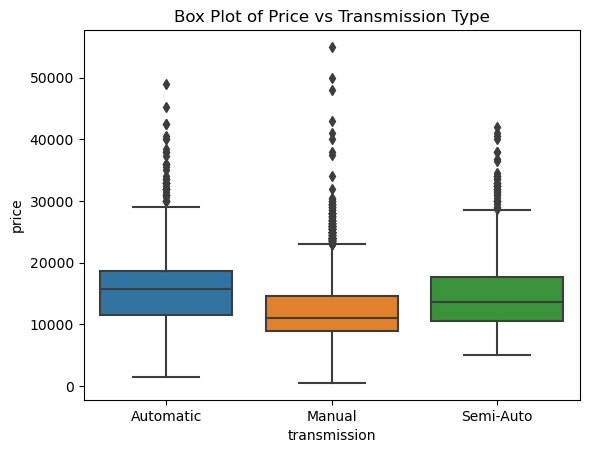

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to compare price outliers across transmission types
sns.boxplot(x='transmission', y='price', data=df)

plt.title('Box Plot of Price vs Transmission Type')
plt.show()

Objective 4: Generate a regression plot between mpg and price.

### Original Response

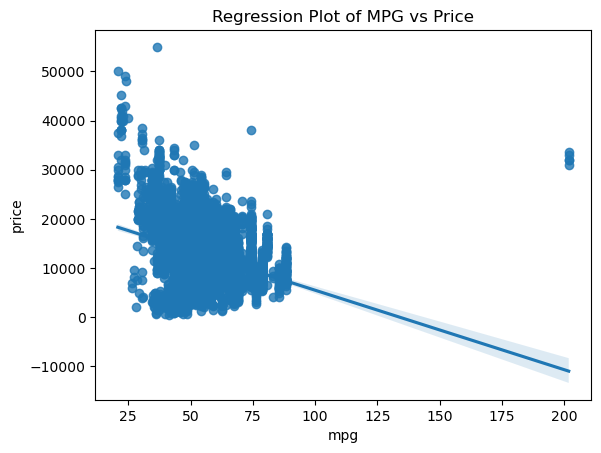

In [60]:
# Create a regression plot between 'mpg' and 'price'
sns.regplot(x='mpg', y='price', data=df)

plt.title('Regression Plot of MPG vs Price')
plt.show()

### Augmented Response

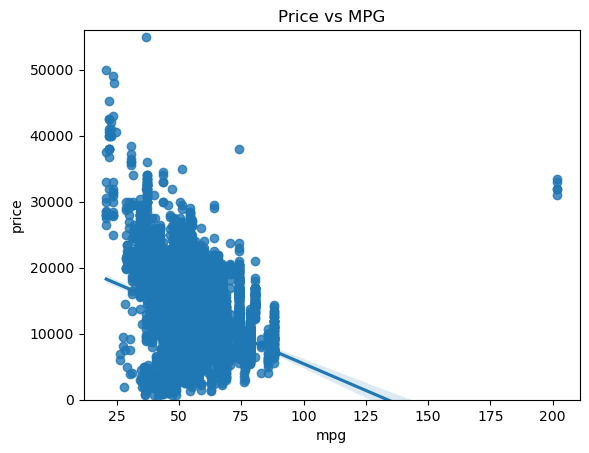

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot
sns.regplot(x='mpg', y='price', data=df)

# Set the y-axis limits to start from 0 to avoid negative values
plt.ylim(0, df['price'].max() + 1000)  # Adding some padding above the max price

# Set the title as 'Price vs MPG'
plt.title('Price vs MPG')

# Show the plot
plt.show()

## 4. Model Development and Evaluation

Objective 1: Fit a linear regression model to predict the price using mpg.

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature and target variable
X = df[['mpg']]
y = df['price']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict and evaluate the model
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

r2, mse

(0.1198980224962416, 19741690.809446193)

Objective 2: Fit a linear regression model using multiple features (year, mileage, tax, mpg, engineSize).

In [75]:
# Define multiple features
X_multi = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Fit the linear regression model
model_multi = LinearRegression()
model_multi.fit(X_multi, y)

# Predict and evaluate the model
y_pred_multi = model_multi.predict(X_multi)
r2_multi = r2_score(y, y_pred_multi)
mse_multi = mean_squared_error(y, y_pred_multi)

r2_multi, mse_multi

(0.7265379654022821, 6134065.225557537)

Objective 3: Create a pipeline model with polynomial features and linear regression.

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Create a pipeline with standard scaling, polynomial features, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

pipeline.fit(X_multi, y)

# Predict and evaluate the model
y_pred_pipeline = pipeline.predict(X_multi)
r2_pipeline = r2_score(y, y_pred_pipeline)
mse_pipeline = mean_squared_error(y, y_pred_pipeline)

r2_pipeline, mse_pipeline

(0.766661971023078, 5234038.031835146)

Objective 4 & 5: Fit a Ridge regression model and perform polynomial transformation.

### Original Response

In [90]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Fit a Ridge regression model with a regularization parameter of 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict and evaluate the model on the test set
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

r2_ridge

0.6917134445795172

### Augmented Response

Objective 4: Ridge Regression

In [100]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict using the Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)

print(f"R²: {r2}")
print(f"MSE: {mse}")

R²: 0.6917134445795172
MSE: 6912725.8017679


Objective 5: Ridge Regression with Polynomial Features

In [113]:
# Transform the data with second-degree polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the Ridge regression model with transformed data
ridge_model.fit(X_train_poly, y_train)

# Predict using the transformed Ridge model
y_pred = ridge_model.predict(X_test_poly)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"MSE: {mse}")

R²: 0.7215577844297509
MSE: 6243524.58461442


C:\Users\Duh1218.000\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Objective 6: Perform Grid Search on the Ridge regression model.

### Original Response

In [117]:
from sklearn.model_selection import GridSearchCV

# Define the Ridge model and parameter grid
ridge_model = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search with 4-fold cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Best parameter
best_alpha = grid_search.best_params_

best_alpha

{'alpha': 0.01}

### Augmented Response

In [126]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Step 2: Create a pipeline with standard scaling, second-degree polynomial features, and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge())
])

# Step 3: Define the parameter grid for alpha and perform a grid search with cross-validation
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='neg_mean_squared_error')

# Fit the model using the training data
grid_search.fit(X_train, y_train)

# Best alpha found by grid search
best_alpha = grid_search.best_params_['ridge__alpha']
print(f"Best alpha: {best_alpha}")

# Step 4: Predict using the best model and calculate R² and MSE
y_pred_poly_ridge = grid_search.predict(X_test)
r2_poly_ridge = r2_score(y_test, y_pred_poly_ridge)
mse_poly_ridge = mean_squared_error(y_test, y_pred_poly_ridge)

print(f"R² (Ridge with Polynomial Features and Grid Search): {r2_poly_ridge}")
print(f"MSE (Ridge with Polynomial Features and Grid Search): {mse_poly_ridge}")

Best alpha: 10
R² (Ridge with Polynomial Features and Grid Search): 0.12573432624899972
MSE (Ridge with Polynomial Features and Grid Search): 19603705.62477341


## 5. Model Validation: I

Revise Regression model using AI seggestions.

### 1. Ensure Proper Feature Scaling

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge

# Create a pipeline that includes scaling, polynomial features, and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('ridge_regression', Ridge())
])

# Define the parameter grid
param_grid = {'ridge_regression__alpha': [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Best alpha found by grid search
best_alpha = grid_search.best_params_
print(f"Best alpha: {best_alpha}")

# Predict using the best model
y_pred_poly_ridge = grid_search.predict(X_test)
r2_poly_ridge = r2_score(y_test, y_pred_poly_ridge)
mse_poly_ridge = mean_squared_error(y_test, y_pred_poly_ridge)

print(f"R² (Ridge with Polynomial Features and Grid Search): {r2_poly_ridge}")
print(f"MSE (Ridge with Polynomial Features and Grid Search): {mse_poly_ridge}")

Best alpha: {'ridge_regression__alpha': 10}
R² (Ridge with Polynomial Features and Grid Search): 0.12573432624899972
MSE (Ridge with Polynomial Features and Grid Search): 19603705.62477341


### 2. Optimize the Polynomial Degree

In [136]:
from sklearn.preprocessing import PolynomialFeatures

# Test with different degrees
degrees = [1, 2, 3]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit and evaluate the Ridge regression model
    ridge_model.fit(X_train_poly, y_train)
    y_pred = ridge_model.predict(X_test_poly)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Degree: {degree} -> R²: {r2}, MSE: {mse}")

Degree: 1 -> R²: 0.6917210734155089, MSE: 6912554.739973378
Degree: 2 -> R²: 0.7215577844297509, MSE: 6243524.58461442
Degree: 3 -> R²: 0.3834172012577173, MSE: 13825668.83586145


C:\Users\Duh1218.000\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Duh1218.000\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.81898e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### 3. Review Feature Selection

Top 5 attributes correlated to 'price':
|Attribute     |Pearson |
|--------------|--------|
|year          |0.635715|
|mileage       |0.530483|
|engineSize    |0.411451|
|tax           |0.405970|
|mpg           |0.346263|

Restrict features to pearson coefficient values over 0.4

### 4. Adjust Regularization Parameters

In [143]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define a pipeline including scaling, polynomial features, and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('ridge_regression', Ridge())
])

# Define a wider range of alpha values for the grid search
param_grid = {'ridge_regression__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Best alpha found by grid search
best_alpha = grid_search.best_params_
print(f"Best alpha: {best_alpha}")

# Predict using the best model
y_pred_poly_ridge = grid_search.predict(X_test)
r2_poly_ridge = r2_score(y_test, y_pred_poly_ridge)
mse_poly_ridge = mean_squared_error(y_test, y_pred_poly_ridge)

print(f"R² (Ridge with Polynomial Features and Grid Search): {r2_poly_ridge}")
print(f"MSE (Ridge with Polynomial Features and Grid Search): {mse_poly_ridge}")

Best alpha: {'ridge_regression__alpha': 10}
R² (Ridge with Polynomial Features and Grid Search): 0.12573432624899972
MSE (Ridge with Polynomial Features and Grid Search): 19603705.62477341


### 5: Cross-Validation with More Folds

In [146]:
# Perform Grid Search with more cross-validation folds
grid_search = GridSearchCV(pipeline, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Best alpha found by grid search
best_alpha = grid_search.best_params_
print(f"Best alpha: {best_alpha}")

# Predict using the best model
y_pred_poly_ridge = grid_search.predict(X_test)
r2_poly_ridge = r2_score(y_test, y_pred_poly_ridge)
mse_poly_ridge = mean_squared_error(y_test, y_pred_poly_ridge)

print(f"R² (Ridge with Polynomial Features and Grid Search): {r2_poly_ridge}")
print(f"MSE (Ridge with Polynomial Features and Grid Search): {mse_poly_ridge}")

Best alpha: {'ridge_regression__alpha': 10}
R² (Ridge with Polynomial Features and Grid Search): 0.12573432624899972
MSE (Ridge with Polynomial Features and Grid Search): 19603705.62477341


### 6: Visualize Residuals

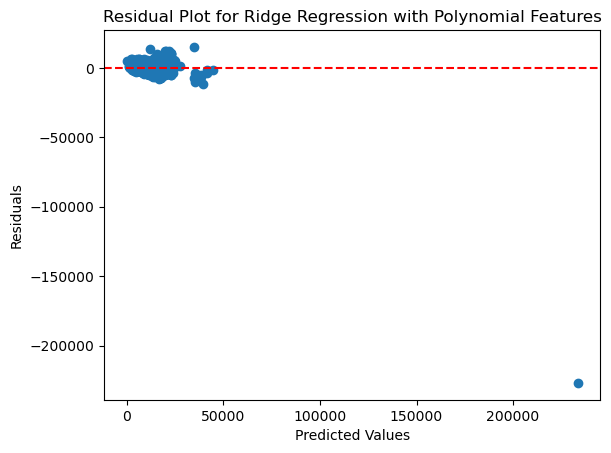

In [151]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_poly_ridge

# Plot residuals
plt.scatter(y_pred_poly_ridge, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Ridge Regression with Polynomial Features')
plt.savefig('residuals.png')
plt.show()

## 6. Model Validation: II

### 1. Replacing StandardScaler() with RobustScaler()

In [156]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Step 2: Create a pipeline with PolynomialFeatures and RobustScaler
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', RobustScaler()),  # Replacing StandardScaler with RobustScaler
    ('ridge_regression', Ridge())
])

# Step 3: Define the parameter grid for alpha and perform a grid search with cross-validation
param_grid = {'ridge_regression__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid_search = GridSearchCV(pipeline, param_grid, cv=10)

# Fit the model using the training data
grid_search.fit(X_train, y_train)

# Best alpha found by grid search
best_alpha = grid_search.best_params_
print(f"Best alpha: {best_alpha}")

# Step 4: Predict using the best model and calculate R² and MSE
y_pred_poly_ridge = grid_search.predict(X_test)
r2_poly_ridge = r2_score(y_test, y_pred_poly_ridge)
mse_poly_ridge = mean_squared_error(y_test, y_pred_poly_ridge)

print(f"R² (Ridge with Polynomial Features and Grid Search): {r2_poly_ridge}")
print(f"MSE (Ridge with Polynomial Features and Grid Search): {mse_poly_ridge}")

Best alpha: {'ridge_regression__alpha': 0.001}
R² (Ridge with Polynomial Features and Grid Search): 0.33426650765329735
MSE (Ridge with Polynomial Features and Grid Search): 14927777.448384771


### 2. Outlier Analysis

In [175]:
import numpy as np

# Identify outliers
outlier_threshold = -50000  # Define your threshold based on the residuals
outliers = np.where(residuals < outlier_threshold)[0]

# Display outlier data points with improved readability
print('--- Outlier Analysis ---')
print('')

# Index of outliers
print(f'Indices of outliers meeting condition: {outliers}')
print('')

# Features of outliers
print('--- Features of Outliers ---')
for index in outliers:
    print(f'Outlier Index: {index}')
    print(X_test.iloc[index])
    print('')

# Actual car prices of outliers
print('--- Actual Car Prices of Outliers ---')
for index in outliers:
    print(f'Outlier Index: {index}, Actual Price: ${y_test.iloc[index]:,.2f}')
print('')

# Model predictions for outliers
print('--- Model Predictions for Outliers ---')
for index in outliers:
    print(f'Outlier Index: {index}, Predicted Price: ${y_pred_poly_ridge[index]:,.2f}')
print('')

--- Outlier Analysis ---

Indices of outliers meeting condition: [3261]

--- Features of Outliers ---
Outlier Index: 3261
year           2060.0
mileage       54807.0
tax             205.0
mpg              42.8
engineSize        1.4
Name: 17726, dtype: float64

--- Actual Car Prices of Outliers ---
Outlier Index: 3261, Actual Price: $6,495.00

--- Model Predictions for Outliers ---
Outlier Index: 3261, Predicted Price: $192,983.92



### 3. Remove the Outlier(s)

In [185]:
# Remove the outlier from X_test and y_test only
X_test_cleaned = X_test.drop(index=X_test.iloc[outliers].index)
y_test_cleaned = y_test.drop(index=y_test.iloc[outliers].index)

### 3. Re-train the Model

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a pipeline including scaling, polynomial features, and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('ridge_regression', Ridge())
])

# Define a wider range of alpha values for the grid search
param_grid = {'ridge_regression__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=4)
grid_search.fit(X_train, y_train)  # No need to clean the training data

# Best alpha found by grid search
best_alpha = grid_search.best_params_
print(f"Best alpha: {best_alpha}")

# Predict using the best model
y_pred_poly_ridge_cleaned = grid_search.predict(X_test_cleaned)
r2_poly_ridge_cleaned = r2_score(y_test_cleaned, y_pred_poly_ridge_cleaned)
mse_poly_ridge_cleaned = mean_squared_error(y_test_cleaned, y_pred_poly_ridge_cleaned)

print(f"R² (Ridge with Polynomial Features and Grid Search): {r2_poly_ridge_cleaned}")
print(f"MSE (Ridge with Polynomial Features and Grid Search): {mse_poly_ridge_cleaned}")

Best alpha: {'ridge_regression__alpha': 10}
R² (Ridge with Polynomial Features and Grid Search): 0.7700430616573253
MSE (Ridge with Polynomial Features and Grid Search): 5155627.912486303


### 4. Re-evaluate the Model

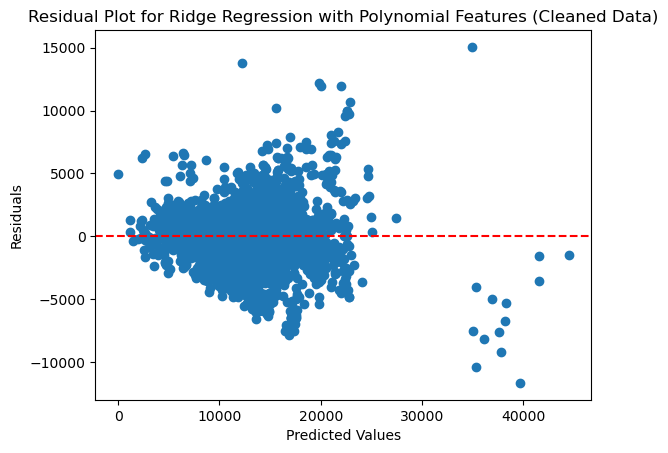

In [199]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals_cleaned = y_test_cleaned - y_pred_poly_ridge_cleaned

# Plot residuals
plt.scatter(y_pred_poly_ridge_cleaned, residuals_cleaned)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Ridge Regression with Polynomial Features (Cleaned Data)')
plt.savefig('residual_cleaned.png')
plt.show()

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
